In this notebook, I will preprocess the Mannens et al. dataset for the application\
of Epiregulon package to infer eGRNs using all of the genes.

In [1]:
getwd()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2024_C_A_Mannens_C_et_al/04_02_25"

In [2]:
.libPaths()

[1] "/fast/home/y/ykazci/R/x86_64-unknown-linux-gnu-library/4.3"               
[2] "/gnu/store/mj2kqa65bbqr3155zccvm01hq7wi7fng-profile/site-library"         
[3] "/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/library"

In [3]:
# load the R environment with the necessary packages:

renv::load()

- The project is out-of-sync -- use `renv::status()` for details.


In [4]:
renv::status()

The following package(s) are out of sync [lockfile != library]:

# Bioconductor 3.19 ----------------------------------------------------------
- GenomicRanges   [1.56.1 != 1.56.2]

# CRAN -----------------------------------------------------------------------
- R.oo            [1.26.0 != 1.27.0]
- RSQLite         [2.3.7 != 2.3.9]
- poweRlaw        [0.80.0 != 1.0.0]
- rjson           [0.2.22 != 0.2.23]

See ?renv::status() for advice on resolving these issues.


In [5]:
here::here()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2024_C_A_Mannens_C_et_al/04_02_25"

In [6]:
GeneExpressionMatrix <- readRDS(here::here('r_objects', 'GeneExpressionMatrix.RDS'))

In [7]:
PeakMatrix <- readRDS(here::here('r_objects', 'PeakMatrix.RDS'))

In [8]:
GeneExpressionMatrix

class: SingleCellExperiment 
dim: 20667 49470 
metadata(0):
assays(3): counts logcounts scaledata
rownames(20667): ENSG00000279457 ENSG00000237491 ... ENSG00000188120
  ENSG00000205944
rowData names(2): gene_id gene_name
colnames(49470): 10X280_1:CAGATTCAGCAGCTCA 10X365_2:ACCAATATCAATGACC
  ... 10X346_4:CGCTGTGCACGTAATT 10X406_4:GAGAAACGTGGTGAGA
colData names(89): orig.ident nCount_RNA ... main_cell_types ident
reducedDimNames(0):
mainExpName: RNA
altExpNames(0):

In [11]:
GeneExpressionMatrix |> colData() |> colnames()

[1] "orig.ident"                    "nCount_RNA"                   
 [3] "nFeature_RNA"                  "before_filtering_orig.ident"  
 [5] "before_filtering_nCount_RNA"   "before_filtering_nFeature_RNA"
 [7] "X_index"                       "Age"                          
 [9] "Agetext"                       "Ageunit"                      
[11] "All_fc_analysis_id"            "Analysis"                     
[13] "CellCycle"                     "CellCycle_G1"                 
[15] "CellCycle_G2M"                 "CellCycle_S"                  
[17] "CellID"                        "Chemistry"                    
[19] "Class"                         "ClusterName"                  
[21] "Clusters"                      "Clusters_main"                
[23] "Clusters_peaks"                "Clusters_renumbered"          
[25] "Cmobarcodes"                   "Comment"                      
[27] "Datecaptured"                  "Donor"                        
[29] "DoubletFinderFlag"             "DoubletFinderScore"           
[31] "Editat"                        "Editby"                       
[33] "FRIP"                          "FRtss"                        
[35] "GA_colsum"                     "GA_pooled_colsum"             
[37] "Id"                            "IsCycling"                    
[39] "Label"                         "Method"                       
[41] "NBins"                         "NGenes"                       
[43] "NPeaks"                        "Name"                         
[45] "Neuronprop"                    "Numpooledanimals"             
[47] "Outliers"                      "Plugdate"                     
[49] "Project"                       "PseudoAge"                    
[51] "Roi"                           "SEX"                          
[53] "Sampleok"                      "Sex"                          
[55] "Shortname"                     "Species"                      
[57] "Split"                         "Splits"                       
[59] "Strain"                        "SubClusters"                  
[61] "TSS_fragments"                 "Tissue"                       
[63] "TotalUMI"                      "Transcriptome"                
[65] "Y"                             "barcode"                      
[67] "chimeric"                      "duplicate"                    
[69] "excluded_reason"               "is__cell_barcode"             
[71] "lowmapq"                       "mitochondrial"                
[73] "passed_filters"                "peak_region_cutsites"         
[75] "peak_region_fragments"         "preClusters"                  
[77] "regions"                       "subregions"                   
[79] "total"                         "unmapped"                     
[81] "before_filtering_percent.mt"   "UMAP_1"                       
[83] "UMAP_2"                        "PC_1"                         
[85] "PC_2"                          "PC_3"                         
[87] "PC_4"                          "main_cell_types"              
[89] "ident"

In [13]:
reducedDim(GeneExpressionMatrix, "UMAP_RNA") <- GeneExpressionMatrix |> colData() |> as.data.frame() |> dplyr::select('UMAP_1','UMAP_2') 

In [14]:
GeneExpressionMatrix

class: SingleCellExperiment 
dim: 20667 49470 
metadata(0):
assays(3): counts logcounts scaledata
rownames(20667): ENSG00000279457 ENSG00000237491 ... ENSG00000188120
  ENSG00000205944
rowData names(2): gene_id gene_name
colnames(49470): 10X280_1:CAGATTCAGCAGCTCA 10X365_2:ACCAATATCAATGACC
  ... 10X346_4:CGCTGTGCACGTAATT 10X406_4:GAGAAACGTGGTGAGA
colData names(89): orig.ident nCount_RNA ... main_cell_types ident
reducedDimNames(1): UMAP_RNA
mainExpName: RNA
altExpNames(0):

In [16]:
options(repr.plot.width = 15, repr.plot.height = 7)

In [18]:
my_colours = c(
    "#5A5156FF", "#F6222EFF", "#FE00FAFF", "#16FF32FF",
    "#3283FEFF", "#FEAF16FF", "#B00068FF", "#1CFFCEFF", "#90AD1CFF",
    "#2ED9FFFF", "#DEA0FDFF", "#AA0DFEFF", "#F8A19FFF", "#325A9BFF",
    "#C4451CFF", "#1C8356FF", "#85660DFF", "#B10DA1FF", "#FBE426FF",
    "#1CBE4FFF", "#FA0087FF", "#FC1CBFFF", "#F7E1A0FF", "#C075A6FF",
    "#782AB6FF", "#AAF400FF", "#BDCDFFFF", "#822E1CFF", "#B5EFB5FF",
    "#7ED7D1FF", "#1C7F93FF", "#D85FF7FF", "#683B79FF", "#66B0FFFF",
    "#3B00FBFF"
)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


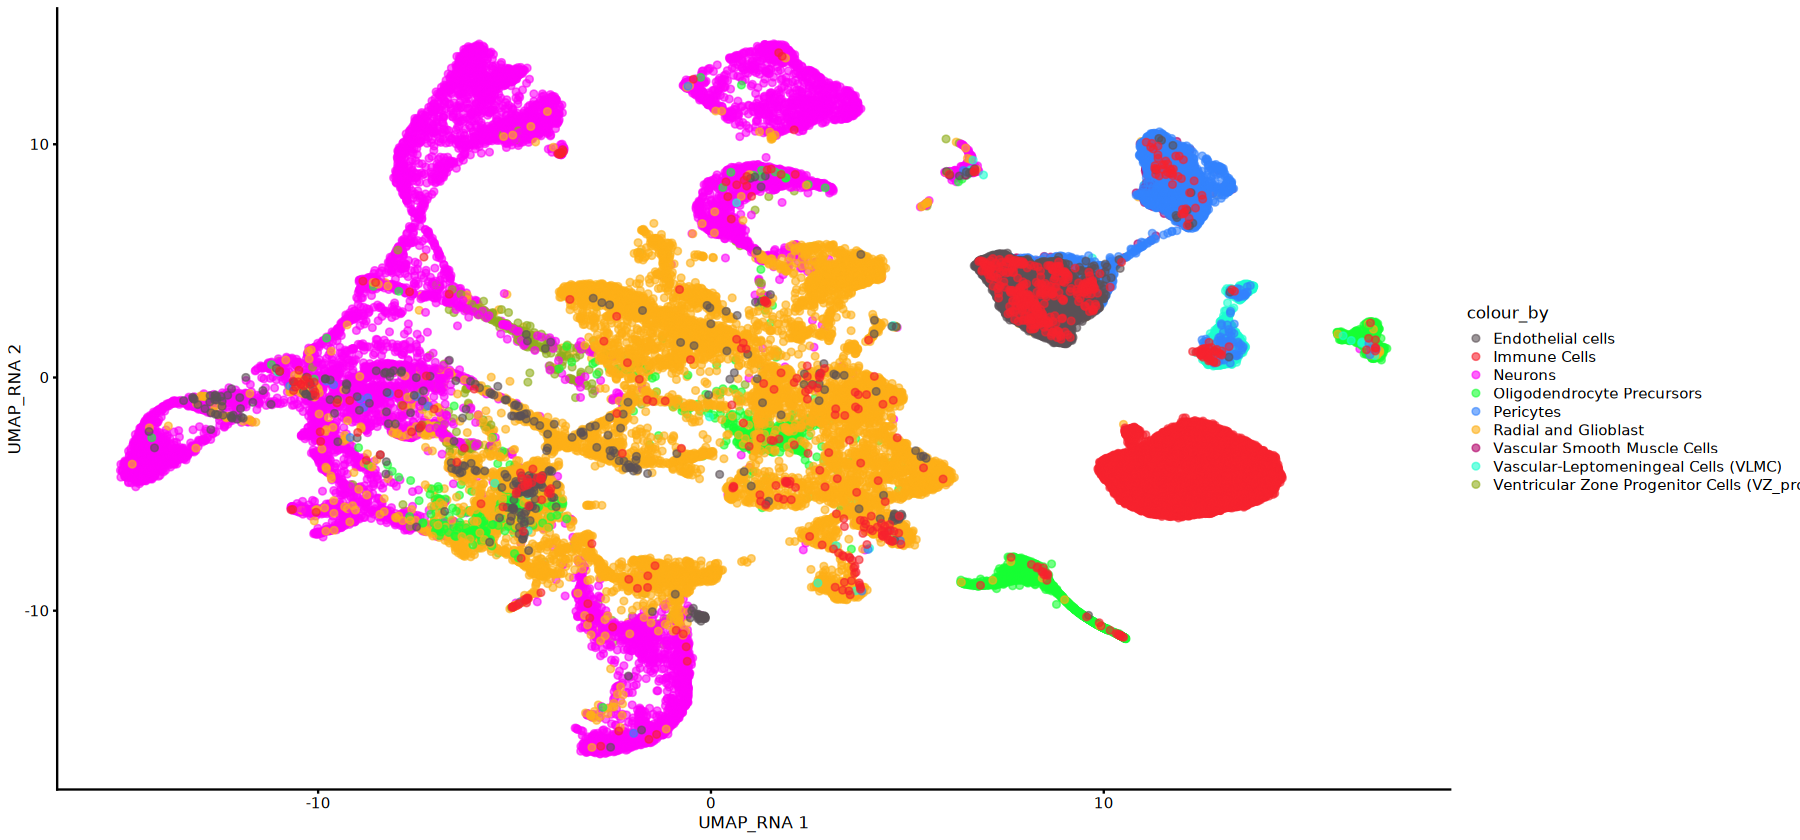

In [19]:
scater::plotReducedDim(GeneExpressionMatrix, 
                       dimred = "UMAP_RNA", 
                       # text_by = "Clusters", 
                       colour_by = "main_cell_types") + ggplot2::scale_color_manual(values = my_colours)

In [22]:
library(epiregulon)

In [23]:
grl <- getTFMotifInfo(genome = "hg38")

see ?scMultiome and browseVignettes('scMultiome') for documentation

downloading 1 resources

retrieving 1 resource

loading from cache



In [24]:
grl

GRangesList object of length 1558:
$AEBP2
GRanges object with 2700 ranges and 0 metadata columns:
         seqnames            ranges strand
            <Rle>         <IRanges>  <Rle>
     [1]     chr1        9792-10446      *
     [2]     chr1     942105-942400      *
     [3]     chr1     984486-984781      *
     [4]     chr1   3068932-3069282      *
     [5]     chr1   3069411-3069950      *
     ...      ...               ...    ...
  [2696]     chrY   8465261-8465730      *
  [2697]     chrY 11721744-11722260      *
  [2698]     chrY 11747448-11747964      *
  [2699]     chrY 19302661-19303134      *
  [2700]     chrY 19985662-19985982      *
  -------
  seqinfo: 25 sequences from an unspecified genome; no seqlengths

...
<1557 more elements>

In [25]:
# Run PCA:

library(scran)

Loading required package: scuttle


Attaching package: ‘scuttle’


The following object is masked from ‘package:epiregulon’:

    aggregateAcrossCells




In [26]:
top.genes <- getTopHVGs(GeneExpressionMatrix, n=2000)

In [27]:
top.genes |> head()

[1] "ENSG00000179915" "ENSG00000152208" "ENSG00000115414" "ENSG00000151322"
[5] "ENSG00000118785" "ENSG00000178568"

In [32]:
GeneExpressionMatrix |> logcounts() |> head()

  [[ suppressing 34 column names ‘10X280_1:CAGATTCAGCAGCTCA’, ‘10X365_2:ACCAATATCAATGACC’, ‘10X365_2:ATGGTGCGTCACCTAT’ ... ]]



6 x 49470 sparse Matrix of class "dgCMatrix"
                                                                              
ENSG00000279457 . . . . . . . . . . . . . . . . . . .        . . . . . . . . .
ENSG00000237491 . . . . . . . . . . . . . . . . . . 1.172991 . . . . . . . . .
ENSG00000177757 . . . . . . . . . . . . . . . . . . .        . . . . . . . . .
ENSG00000230368 . . . . . . . . . . . . . . . . . . 1.172991 . . . . . . . . .
ENSG00000223764 . . . . . . . . . . . . . . . . . . .        . . . . . . . . .
ENSG00000187634 . . . . . . . . . . . . . . . . . . 1.172991 . . . . . . . . .
                                  
ENSG00000279457 . . . . . . ......
ENSG00000237491 . . . . . . ......
ENSG00000177757 . . . . . . ......
ENSG00000230368 . . . . . . ......
ENSG00000223764 . . . . . . ......
ENSG00000187634 . . . . . . ......

 .....suppressing 49436 columns in show(); maybe adjust options(max.print=, width=)
 ..............................

In [33]:
top.genes |> length()

[1] 2000

In [34]:
set.seed(100) # See below.

GeneExpressionMatrix <- fixedPCA(GeneExpressionMatrix, subset.row=top.genes) 

In [35]:
reducedDimNames(GeneExpressionMatrix)

[1] "UMAP_RNA" "PCA"

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


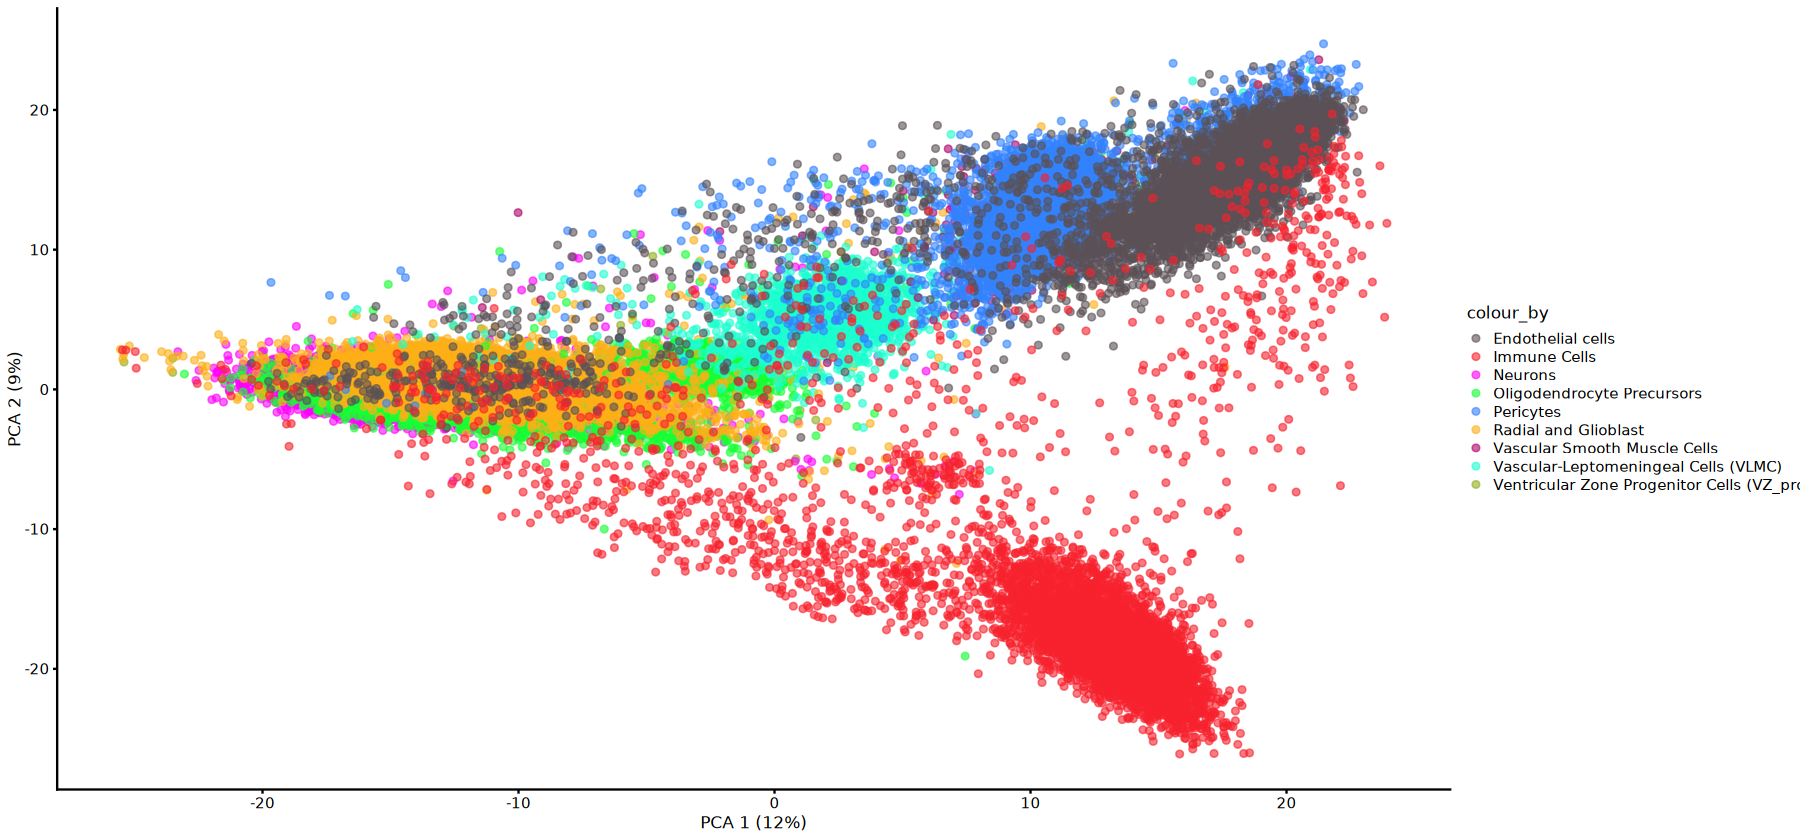

In [36]:
scater::plotReducedDim(GeneExpressionMatrix, 
                       dimred = "PCA", 
                       # text_by = "Clusters", 
                       colour_by = "main_cell_types") + ggplot2::scale_color_manual(values = my_colours)

In [37]:
reducedDimMatrix <- reducedDim(x = GeneExpressionMatrix, type = 'PCA')

In [38]:
reducedDimMatrix |> head()

PC1       PC2         PC3       PC4      PC5     
10X280_1:CAGATTCAGCAGCTCA -16.38974 -1.36169971 -3.468380 14.07340 2.845915
10X365_2:ACCAATATCAATGACC -16.55489 -0.38894738 -2.543790 14.58457 4.243419
10X365_2:ATGGTGCGTCACCTAT -13.87004 -2.53099435 -2.680395 12.50998 4.333790
10X280_1:ACACCTTGTCATTAGG -16.69623 -0.07913583 -2.701377 13.97800 3.786737
10X406_1:TATCGCGAGGCTTAAC -17.25674  1.28682529 -1.484776 14.31743 6.077179
10X280_1:ACCTTGCTCCGTAAAC -16.75243 -0.38573888 -3.547440 12.59840 2.122146
                          PC6      PC7      PC8       PC9       PC10      ⋯
10X280_1:CAGATTCAGCAGCTCA 2.346202 6.019965 -5.816303 -2.611741 -5.987628 ⋯
10X365_2:ACCAATATCAATGACC 3.516743 8.121665 -5.111954 -2.702149 -6.301934 ⋯
10X365_2:ATGGTGCGTCACCTAT 3.893426 4.263302 -5.411641 -2.930709 -7.480931 ⋯
10X280_1:ACACCTTGTCATTAGG 5.125703 6.751586 -6.269103 -3.875373 -6.744303 ⋯
10X406_1:TATCGCGAGGCTTAAC 4.128017 7.863595 -4.985667 -3.135394 -6.348170 ⋯
10X280_1:ACCTTGCTCCGTAAAC 3.855118 5.675078 -6.755741 -3.477063 -5.211663 ⋯
                          PC41       PC42        PC43        PC44       
10X280_1:CAGATTCAGCAGCTCA -0.3507298 -0.60685777 -1.04053443  0.35662241
10X365_2:ACCAATATCAATGACC  0.9030128  1.32439623 -2.08272523 -1.42241588
10X365_2:ATGGTGCGTCACCTAT  1.2558116 -0.74864538 -2.19760212 -1.21853890
10X280_1:ACACCTTGTCATTAGG  0.2730639 -0.01135917 -0.02184692 -0.08075235
10X406_1:TATCGCGAGGCTTAAC  1.5383090 -0.85246706 -1.63343477 -1.17140902
10X280_1:ACCTTGCTCCGTAAAC  0.8407081 -1.84058040 -0.49730924  0.31577288
                          PC45        PC46       PC47       PC48       
10X280_1:CAGATTCAGCAGCTCA -0.42247035  0.2652495 -0.3314272 -0.82615729
10X365_2:ACCAATATCAATGACC  0.42675057  0.9079819  1.5721578 -2.47099168
10X365_2:ATGGTGCGTCACCTAT -0.04982719  1.8463954  0.4111106 -2.93947369
10X280_1:ACACCTTGTCATTAGG -0.35284159  0.2311953 -2.3929842 -0.59555547
10X406_1:TATCGCGAGGCTTAAC  1.08123344 -0.6216004  0.3613464  0.06164822
10X280_1:ACCTTGCTCCGTAAAC  1.06364485  0.8657945 -1.1241679 -0.47219806
                          PC49        PC50     
10X280_1:CAGATTCAGCAGCTCA -0.50710789 0.2595000
10X365_2:ACCAATATCAATGACC  0.39641752 1.6011277
10X365_2:ATGGTGCGTCACCTAT  0.19439354 2.1854162
10X280_1:ACACCTTGTCATTAGG -0.12539700 0.3672390
10X406_1:TATCGCGAGGCTTAAC  0.07512254 2.4322910
10X280_1:ACCTTGCTCCGTAAAC -1.56561363 0.7577592

In [44]:
rowData(GeneExpressionMatrix)$name |> head()

NULL

In [43]:
GeneExpressionMatrix |> head()

class: SingleCellExperiment 
dim: 6 49470 
metadata(0):
assays(3): counts logcounts scaledata
rownames: NULL
rowData names(2): gene_id gene_name
colnames(49470): 10X280_1:CAGATTCAGCAGCTCA 10X365_2:ACCAATATCAATGACC
  ... 10X346_4:CGCTGTGCACGTAATT 10X406_4:GAGAAACGTGGTGAGA
colData names(89): orig.ident nCount_RNA ... main_cell_types ident
reducedDimNames(2): UMAP_RNA PCA
mainExpName: RNA
altExpNames(0):

In [45]:
rownames(GeneExpressionMatrix) <- rowData(GeneExpressionMatrix)$gene_name

In [46]:
rownames(GeneExpressionMatrix) |> head()

[1] "WASH9P"    "LINC01409" "FAM87B"    "FAM41C"    "LINC02593" "SAMD11"

In [47]:
GeneExpressionMatrix |> head()

class: SingleCellExperiment 
dim: 6 49470 
metadata(0):
assays(3): counts logcounts scaledata
rownames(6): WASH9P LINC01409 ... LINC02593 SAMD11
rowData names(2): gene_id gene_name
colnames(49470): 10X280_1:CAGATTCAGCAGCTCA 10X365_2:ACCAATATCAATGACC
  ... 10X346_4:CGCTGTGCACGTAATT 10X406_4:GAGAAACGTGGTGAGA
colData names(89): orig.ident nCount_RNA ... main_cell_types ident
reducedDimNames(2): UMAP_RNA PCA
mainExpName: RNA
altExpNames(0):

In [49]:
rowData(GeneExpressionMatrix) |> head()

DataFrame with 6 rows and 2 columns
                  gene_id   gene_name
              <character> <character>
WASH9P    ENSG00000279457      WASH9P
LINC01409 ENSG00000237491   LINC01409
FAM87B    ENSG00000177757      FAM87B
FAM41C    ENSG00000230368      FAM41C
LINC02593 ENSG00000223764   LINC02593
SAMD11    ENSG00000187634      SAMD11

In [50]:
rowData(GeneExpressionMatrix) |> colnames()

[1] "gene_id"   "gene_name"

In [51]:
colnames(rowData(GeneExpressionMatrix)) <- c('ID', 'name')

In [53]:
names(assays(GeneExpressionMatrix))

[1] "counts"    "logcounts" "scaledata"

In [54]:
normalizeCounts(GeneExpressionMatrix) |> head()

  [[ suppressing 34 column names ‘10X280_1:CAGATTCAGCAGCTCA’, ‘10X365_2:ACCAATATCAATGACC’, ‘10X365_2:ATGGTGCGTCACCTAT’ ... ]]



6 x 49470 sparse Matrix of class "dgCMatrix"
                                                                              
WASH9P    . . . . . . . . . . . . . . . . . . .        . . . . . . . . . . . .
LINC01409 . . . . . . . . . . . . . . . . . . 0.854001 . . . . . . . . . . . .
FAM87B    . . . . . . . . . . . . . . . . . . .        . . . . . . . . . . . .
FAM41C    . . . . . . . . . . . . . . . . . . 0.854001 . . . . . . . . . . . .
LINC02593 . . . . . . . . . . . . . . . . . . .        . . . . . . . . . . . .
SAMD11    . . . . . . . . . . . . . . . . . . 0.854001 . . . . . . . . . . . .
                      
WASH9P    . . . ......
LINC01409 . . . ......
FAM87B    . . . ......
FAM41C    . . . ......
LINC02593 . . . ......
SAMD11    . . . ......

 .....suppressing 49436 columns in show(); maybe adjust options(max.print=, width=)
 ..............................

In [55]:
logcounts(GeneExpressionMatrix) |> head()

  [[ suppressing 34 column names ‘10X280_1:CAGATTCAGCAGCTCA’, ‘10X365_2:ACCAATATCAATGACC’, ‘10X365_2:ATGGTGCGTCACCTAT’ ... ]]



6 x 49470 sparse Matrix of class "dgCMatrix"
                                                                              
WASH9P    . . . . . . . . . . . . . . . . . . .        . . . . . . . . . . . .
LINC01409 . . . . . . . . . . . . . . . . . . 1.172991 . . . . . . . . . . . .
FAM87B    . . . . . . . . . . . . . . . . . . .        . . . . . . . . . . . .
FAM41C    . . . . . . . . . . . . . . . . . . 1.172991 . . . . . . . . . . . .
LINC02593 . . . . . . . . . . . . . . . . . . .        . . . . . . . . . . . .
SAMD11    . . . . . . . . . . . . . . . . . . 1.172991 . . . . . . . . . . . .
                      
WASH9P    . . . ......
LINC01409 . . . ......
FAM87B    . . . ......
FAM41C    . . . ......
LINC02593 . . . ......
SAMD11    . . . ......

 .....suppressing 49436 columns in show(); maybe adjust options(max.print=, width=)
 ..............................

In [60]:
set.seed(1010)
p2g <- calculateP2G(peakMatrix = PeakMatrix, 
                    expMatrix = GeneExpressionMatrix, 
                    reducedDim = reducedDim(GeneExpressionMatrix, 'PCA'),
                    exp_assay = "logcounts",
                    peak_assay = "counts")

Using epiregulon to compute peak to gene links...


performing k means clustering to form metacells

Warning message in valid.GenomicRanges.seqinfo(x, suggest.trim = TRUE):
“GRanges object contains 34 out-of-bound ranges located on sequences 1,
  10, 12, 13, 16, 19, 2, 20, 21, 22, 3, 4, 5, 8, and 9. Note that ranges
  located on a sequence whose length is unknown (NA) or on a circular
  sequence are not considered out-of-bound (use seqlengths() and
  isCircular() to get the lengths and circularity flags of the underlying
  sequences). You can use trim() to trim these ranges. See
  ?`trim,GenomicRanges-method` for more information.”
Warning message in .merge_two_Seqinfo_objects(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”


Computing correlation


In [61]:
p2g |> head()

DataFrame with 0 rows and 8 columns

In [62]:
library(GenomicRanges)

In [63]:
PeakMatrix <- trim(PeakMatrix)

In [64]:
seqlevelsStyle(PeakMatrix) <- seqlevelsStyle(GeneExpressionMatrix)

In [66]:
seqinfo(PeakMatrix) <- seqinfo(GeneExpressionMatrix)

ERROR: Error in GenomeInfoDb:::makeNewSeqnames(x, new2old = new2old, seqlevels(value)): The seqlevels in the supplied Seqinfo object are not the same as the
  seqlevels in 'x'. To map them to the seqlevels of the same name in 'x',
  the easiest way is to propagate them to 'x' with:

    seqlevels(x) <- seqlevels(new_seqinfo)

  before calling the 'seqinfo()' setter.
  For any more complicated mapping, please use the 'new2old' argument.


In [68]:
seqlevels(PeakMatrix)

[1] "10" "11" "12" "13" "14" "15" "16" "17" "18" "19" "1"  "20" "21" "22" "2" 
[16] "3"  "4"  "5"  "6"  "7"  "8"  "9"  "X"  "Y"

In [69]:
seqlevels(GeneExpressionMatrix)

[1] "1"                                     
  [2] "10"                                    
  [3] "11"                                    
  [4] "12"                                    
  [5] "13"                                    
  [6] "14"                                    
  [7] "15"                                    
  [8] "16"                                    
  [9] "17"                                    
 [10] "18"                                    
 [11] "19"                                    
 [12] "2"                                     
 [13] "20"                                    
 [14] "21"                                    
 [15] "22"                                    
 [16] "3"                                     
 [17] "4"                                     
 [18] "5"                                     
 [19] "6"                                     
 [20] "7"                                     
 [21] "8"                                     
 [22] "9"                                     
 [23] "CHR_HG107_PATCH"                       
 [24] "CHR_HG109_PATCH"                       
 [25] "CHR_HG126_PATCH"                       
 [26] "CHR_HG1277_PATCH"                      
 [27] "CHR_HG1298_PATCH"                      
 [28] "CHR_HG1309_PATCH"                      
 [29] "CHR_HG1311_PATCH"                      
 [30] "CHR_HG1320_PATCH"                      
 [31] "CHR_HG1342_HG2282_PATCH"               
 [32] "CHR_HG1362_PATCH"                      
 [33] "CHR_HG1384_PATCH"                      
 [34] "CHR_HG1395_PATCH"                      
 [35] "CHR_HG1398_PATCH"                      
 [36] "CHR_HG142_HG150_NOVEL_TEST"            
 [37] "CHR_HG1445_PATCH"                      
 [38] "CHR_HG1485_PATCH"                      
 [39] "CHR_HG151_NOVEL_TEST"                  
 [40] "CHR_HG1524_PATCH"                      
 [41] "CHR_HG1531_PATCH"                      
 [42] "CHR_HG1535_PATCH"                      
 [43] "CHR_HG1651_PATCH"                      
 [44] "CHR_HG1708_PATCH"                      
 [45] "CHR_HG1815_PATCH"                      
 [46] "CHR_HG1832_PATCH"                      
 [47] "CHR_HG1_PATCH"                         
 [48] "CHR_HG2002_PATCH"                      
 [49] "CHR_HG2021_PATCH"                      
 [50] "CHR_HG2022_PATCH"                      
 [51] "CHR_HG2023_PATCH"                      
 [52] "CHR_HG2030_PATCH"                      
 [53] "CHR_HG2046_PATCH"                      
 [54] "CHR_HG2047_PATCH"                      
 [55] "CHR_HG2057_PATCH"                      
 [56] "CHR_HG2058_PATCH"                      
 [57] "CHR_HG2060_PATCH"                      
 [58] "CHR_HG2062_PATCH"                      
 [59] "CHR_HG2063_PATCH"                      
 [60] "CHR_HG2066_PATCH"                      
 [61] "CHR_HG2067_PATCH"                      
 [62] "CHR_HG2072_PATCH"                      
 [63] "CHR_HG2087_PATCH"                      
 [64] "CHR_HG2088_PATCH"                      
 [65] "CHR_HG2095_PATCH"                      
 [66] "CHR_HG2104_PATCH"                      
 [67] "CHR_HG2111_PATCH"                      
 [68] "CHR_HG2114_PATCH"                      
 [69] "CHR_HG2115_PATCH"                      
 [70] "CHR_HG2116_PATCH"                      
 [71] "CHR_HG2121_PATCH"                      
 [72] "CHR_HG2128_PATCH"                      
 [73] "CHR_HG2133_PATCH"                      
 [74] "CHR_HG2191_PATCH"                      
 [75] "CHR_HG2198_PATCH"                      
 [76] "CHR_HG2213_PATCH"                      
 [77] "CHR_HG2217_PATCH"                      
 [78] "CHR_HG2232_PATCH"                      
 [79] "CHR_HG2233_PATCH"                      
 [80] "CHR_HG2235_PATCH"                      
 [81] "CHR_HG2236_PATCH"                      
 [82] "CHR_HG2239_PATCH"                      
 [83] "CHR_HG2246_HG2248_HG2276_PATCH"        
 [84] "CHR_HG2247_PATCH"                      
 [85] "CHR_HG2249_PATCH"                      
 [86] "

In [70]:
common_seqlevels <- intersect(seqlevels(PeakMatrix), seqlevels(GeneExpressionMatrix))
seqlevels(PeakMatrix) <- common_seqlevels
seqlevels(GeneExpressionMatrix) <- common_seqlevels


ERROR: Error in GenomeInfoDb:::getDanglingSeqlevels(x@rowRanges, new2old = new2old, : The following seqlevels are to be dropped but are currently in use
  (i.e. have ranges on them): CHR_HG1535_PATCH, CHR_HG439_PATCH,
  CHR_HSCHRX_2_CTG12. Please use the 'pruning.mode' argument to control
  how to prune 'x', that is, how to remove the ranges in 'x' that are on
  these sequences. For example, do something like:
    seqlevels(x, pruning.mode="coarse") <- new_seqlevels
  or:
    keepSeqlevels(x, new_seqlevels, pruning.mode="coarse")
  See ?seqinfo for a description of the pruning modes.


In [71]:
library(GenomeInfoDb)

PeakMatrix <- keepStandardChromosomes(PeakMatrix, pruning.mode = "coarse")
GeneExpressionMatrix <- keepStandardChromosomes(GeneExpressionMatrix, pruning.mode = "coarse")


In [72]:
seqlevels(PeakMatrix)
seqlevels(GeneExpressionMatrix)


[1] "10" "11" "12" "13" "14" "15" "16" "17" "18" "19" "1"  "20" "21" "22" "2" 
[16] "3"  "4"  "5"  "6"  "7"  "8"  "9"  "X"  "Y"

[1] "1"  "10" "11" "12" "13" "14" "15" "16" "17" "18" "19" "2"  "20" "21" "22"
[16] "3"  "4"  "5"  "6"  "7"  "8"  "9"  "MT" "X"  "Y"

In [73]:
common_chromosomes <- intersect(seqlevels(PeakMatrix), seqlevels(GeneExpressionMatrix))

PeakMatrix <- keepSeqlevels(PeakMatrix, common_chromosomes, pruning.mode = "coarse")
GeneExpressionMatrix <- keepSeqlevels(GeneExpressionMatrix, common_chromosomes, pruning.mode = "coarse")


In [74]:
seqlevels(PeakMatrix)
seqlevels(GeneExpressionMatrix)

[1] "10" "11" "12" "13" "14" "15" "16" "17" "18" "19" "1"  "20" "21" "22" "2" 
[16] "3"  "4"  "5"  "6"  "7"  "8"  "9"  "X"  "Y"

[1] "10" "11" "12" "13" "14" "15" "16" "17" "18" "19" "1"  "20" "21" "22" "2" 
[16] "3"  "4"  "5"  "6"  "7"  "8"  "9"  "X"  "Y"

===============================================================================

IMPORTANT !!!!

As argument to "exp_assay" parameter, the workflow uses "normalizedCounts"\ 
however my RNA object does not have it. So I used logcounts assay.

In [75]:
p2g <- calculateP2G(peakMatrix = PeakMatrix, 
                    expMatrix = GeneExpressionMatrix, 
                    reducedDim = reducedDim(GeneExpressionMatrix, 'PCA'),
                    exp_assay = "logcounts",
                    peak_assay = "counts")


Using epiregulon to compute peak to gene links...


performing k means clustering to form metacells

Warning message in valid.GenomicRanges.seqinfo(x, suggest.trim = TRUE):
“GRanges object contains 34 out-of-bound ranges located on sequences 1,
  10, 12, 13, 16, 19, 2, 20, 21, 22, 3, 4, 5, 8, and 9. Note that ranges
  located on a sequence whose length is unknown (NA) or on a circular
  sequence are not considered out-of-bound (use seqlengths() and
  isCircular() to get the lengths and circularity flags of the underlying
  sequences). You can use trim() to trim these ranges. See
  ?`trim,GenomicRanges-method` for more information.”


Computing correlation


In [76]:
p2g |> head()

DataFrame with 6 rows and 8 columns
    idxATAC         chr     start       end    idxRNA      target Correlation
  <integer> <character> <integer> <integer> <integer> <character>    <matrix>
1        34          10 100256943 100257344      2700      PKD2L1    0.529368
2        37          10 100291351 100291752      2700      PKD2L1    0.550435
3        38          10 100292380 100292781      2700      PKD2L1    0.531751
4        43          10 100326938 100327339      2700      PKD2L1    0.545973
5        56          10 100371197 100371598      2702    OLMALINC    0.546753
6        67          10 100462764 100463165      2703       WNT8B    0.503879
   distance
  <integer>
1     72919
2     38511
3     37482
4      2924
5      1500
6         0

In [77]:
p2g  |> dim()

[1] 24204     8

In [78]:
sum(width(PeakMatrix) < 1)  # Should be 0 if all ranges are valid

[1] 0

In [79]:
overlap <- addTFMotifInfo(grl = grl, p2g = p2g, peakMatrix = PeakMatrix)

Computing overlap...

Warning message in .merge_two_Seqinfo_objects(x, y):
“The 2 combined objects have no sequence levels in common. (Use
  suppressWarnings() to suppress this warning.)”
Success!



In [80]:
overlap |> dim()

[1] 0 3

In [81]:
overlap

idxATAC idxTF tf

In [82]:
seqlevels(grl)
seqlevels(p2g)
seqlevels(PeakMatrix)


[1] "chr1"  "chr2"  "chr3"  "chr4"  "chr5"  "chr6"  "chr7"  "chr8"  "chr9" 
[10] "chr10" "chr11" "chr12" "chr13" "chr14" "chr15" "chr16" "chr17" "chr18"
[19] "chr19" "chr20" "chr21" "chr22" "chrX"  "chrY"  "chrM"

[1] "idxATAC"     "chr"         "start"       "end"         "idxRNA"     
[6] "target"      "Correlation" "distance"

[1] "10" "11" "12" "13" "14" "15" "16" "17" "18" "19" "1"  "20" "21" "22" "2" 
[16] "3"  "4"  "5"  "6"  "7"  "8"  "9"  "X"  "Y"

In [83]:
seqlevelsStyle(PeakMatrix) <- "UCSC"  # Converts '1' → 'chr1'
seqlevelsStyle(grl) <- "UCSC"
seqlevelsStyle(p2g) <- "UCSC"


ERROR: Error in .replace_seqlevels_style(x_seqlevels, value): found no sequence renaming map compatible with seqname style "UCSC" for this object


In [84]:
seqlevelsStyle(PeakMatrix) <- "NCBI"  # Converts 'chr1' → '1'
seqlevelsStyle(grl) <- "NCBI"
seqlevelsStyle(p2g) <- "NCBI"

ERROR: Error in .replace_seqlevels_style(x_seqlevels, value): found no sequence renaming map compatible with seqname style "NCBI" for this object


In [85]:
library(GenomeInfoDb)

# Check current sequence level styles
seqlevelsStyle(PeakMatrix)
seqlevelsStyle(grl)
seqlevelsStyle(p2g)

# Check assigned genome
genome(PeakMatrix)
genome(grl)
genome(p2g)


[1] "NCBI"    "Ensembl"

[1] "NCBI"    "Ensembl"

ERROR: Error in seqlevelsStyle(seqlevels): The style does not have a compatible entry for the species supported by
  Seqname. Please see genomeStyles() for supported species/style


In [86]:
genome(p2g)
genome(PeakMatrix)
genome(grl)

idxATAC         chr       start         end      idxRNA      target 
         NA          NA          NA          NA          NA          NA 
Correlation    distance 
         NA          NA

10 11 12 13 14 15 16 17 18 19  1 20 21 22  2  3  4  5  6  7  8  9  X  Y 
NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22  X  Y MT 
NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA

In [87]:
seqlevelsStyle(p2g)
seqlevelsStyle(PeakMatrix)
seqlevelsStyle(grl)

ERROR: Error in seqlevelsStyle(seqlevels): The style does not have a compatible entry for the species supported by
  Seqname. Please see genomeStyles() for supported species/style


In [88]:
genome(p2g) <- "hg38"
genome(PeakMatrix) <- "hg38"
genome(grl) <- "hg38"


In [89]:
seqlevelsStyle(p2g) <- "UCSC"
seqlevelsStyle(PeakMatrix) <- "UCSC"
seqlevelsStyle(grl) <- "UCSC"

In [90]:
seqlevels(PeakMatrix)
seqlevels(grl)
seqlevels(p2g)

[1] "10" "11" "12" "13" "14" "15" "16" "17" "18" "19" "1"  "20" "21" "22" "2" 
[16] "3"  "4"  "5"  "6"  "7"  "8"  "9"  "X"  "Y"

[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "X"  "Y"  "MT"

[1] "idxATAC"     "chr"         "start"       "end"         "idxRNA"     
[6] "target"      "Correlation" "distance"

In [91]:
overlap <- addTFMotifInfo(grl = grl, p2g = p2g, peakMatrix = PeakMatrix)

Computing overlap...

Success!



In [92]:
head(overlap)

idxATAC idxTF tf    
3095 34      14    ARNTL 
3096 34      36    BRD4  
3097 34      37    BRD9  
3098 34      50    CEBPA 
3099 34      51    CEBPB 
3100 34      62    CREBBP

In [93]:
overlap |> dim()

[1] 1761253       3

In [94]:
regulon <- getRegulon(p2g, overlap, aggregate=FALSE)

In [95]:
regulon

DataFrame with 2066139 rows and 10 columns
          idxATAC         chr     start       end    idxRNA      target
        <integer> <character> <integer> <integer> <integer> <character>
1              34          10 100256943 100257344      2700      PKD2L1
2              34          10 100256943 100257344      2700      PKD2L1
3              34          10 100256943 100257344      2700      PKD2L1
4              34          10 100256943 100257344      2700      PKD2L1
5              34          10 100256943 100257344      2700      PKD2L1
...           ...         ...       ...       ...       ...         ...
2066135    405101           Y   6911371   6911772     20646       TBL1Y
2066136    405101           Y   6911371   6911772     20646       TBL1Y
2066137    405101           Y   6911371   6911772     20646       TBL1Y
2066138    405101           Y   6911371   6911772     20646       TBL1Y
2066139    405101           Y   6911371   6911772     20646       TBL1Y
         distance    

In [96]:
pruned.regulon <- pruneRegulon(expMatrix = GeneExpressionMatrix,
                               exp_assay = "logcounts",
                               peakMatrix = PeakMatrix,
                               peak_assay = "counts",
                               regulon = regulon,
                               prune_value = "pval",
                               regulon_cutoff = 0.05,
                               clusters = GeneExpressionMatrix$main_cell_types)

pruning network with chi.sq tests using a regulon cutoff of pval<0.05

pruning regulons



In [97]:
set.seed(1010)
regulon.w <- addWeights(regulon = pruned.regulon,
                        expMatrix  = GeneExpressionMatrix,
                        exp_assay  = "logcounts",
                        peakMatrix = PeakMatrix,
                        peak_assay = "counts",
                        clusters = GeneExpressionMatrix$main_cell_types,
                        aggregateCells = TRUE,
                        method = "wilcox",
                        useDim = "PCA")

adding weights using wilcoxon...

performing pseudobulk using an average of 10 cells



The above command takes a bit longer.

In [99]:
regulon.w

DataFrame with 1597324 rows and 14 columns
          idxATAC         chr     start       end    idxRNA      target
        <integer> <character> <integer> <integer> <integer> <character>
1            3296          10  11685819  11686220      2195      USP6NL
2            8072          10  16811761  16812162      2229        RSU1
3            8249          10  17578642  17579043      2233     ST8SIA6
4            9035          10  22615883  22616284      2254     PIP4K2A
5           11842          10   3852277   3852678      2145        KLF6
...           ...         ...       ...       ...       ...         ...
1597320    389356           9  62801072  62801473     19314   LINC01410
1597321    390340           9  73152451  73152852     19352       ANXA1
1597322    396276           X 115615099 115615500     20412        PLS3
1597323    396458           X 118839301 118839702     20419     IL13RA1
1597324    402458           X  47582133  47582534     20071       TIMP1
         distance    

In [101]:
score.combine <- calculateActivity(expMatrix = GeneExpressionMatrix, 
                                   regulon = regulon.w, 
                                   mode = "weight", 
                                   method = "weightedMean", 
                                   exp_assay = "logcounts")

calculating TF activity from regulon using weightedmean

Warning message in calculateActivity(expMatrix = GeneExpressionMatrix, regulon = regulon.w, :
“The weight column contains multiple subcolumns but no cluster information was provided. Using first column to compute activity...”
aggregating regulons...

creating weight matrix...

calculating activity scores...

normalize by the number of targets...



In [102]:
head(score.combine[1:5,1:5])

5 x 5 sparse Matrix of class "dgCMatrix"
      10X280_1:CAGATTCAGCAGCTCA 10X365_2:ACCAATATCAATGACC
ADNP                 0.04551656                0.03754170
AEBP2                0.09848525                0.11018574
AFF1                 0.07063949                0.06060685
AFF4                 0.05559240                0.05380906
AGO1                 0.04647418                0.03500706
      10X365_2:ATGGTGCGTCACCTAT 10X280_1:ACACCTTGTCATTAGG
ADNP                 0.04013568                0.03602766
AEBP2                0.07423162                0.10469764
AFF1                 0.05904672                0.06691250
AFF4                 0.04361125                0.05659002
AGO1                 0.03685094                0.04302058
      10X406_1:TATCGCGAGGCTTAAC
ADNP                 0.03718401
AEBP2                0.10520098
AFF1                 0.06398606
AFF4                 0.04370048
AGO1                 0.04443444

In [105]:
library(epiregulon.extra)

In [106]:
markers  <- findDifferentialActivity(activity_matrix = score.combine, 
                                    clusters = GeneExpressionMatrix$main_cell_types, 
                                    pval.type = "some", 
                                    direction = "up", 
                                    logvalues = FALSE)

ERROR: Error in .local(x, ...): unused argument (logvalues = FALSE)


In [107]:
args(findDifferentialActivity)

function (activity_matrix, clusters, test.type = "t", pval.type = "some", 
    direction = c("any", "up", "down"), groups = deprecated(), 
    ...) 
NULL

In [108]:
markers  <- findDifferentialActivity(activity_matrix = score.combine, 
                                    clusters = GeneExpressionMatrix$main_cell_types, 
                                    pval.type = "some", 
                                    direction = "up", 
                                    #logvalues = FALSE
                                    )

In [109]:
markers

List of length 9
names(9): Endothelial cells ... Ventricular Zone Progenitor Cells (VZ_prog)

In [110]:
markers.sig <- getSigGenes(markers, topgenes = 3 )

Using a logFC cutoff of 0.1 for class Endothelial cells for direction equal to any

Using a logFC cutoff of 0.1 for class Immune Cells for direction equal to any

Using a logFC cutoff of 0.1 for class Neurons for direction equal to any

Using a logFC cutoff of 0.1 for class Oligodendrocyte Precursors for direction equal to any

Using a logFC cutoff of 0 for class Pericytes for direction equal to any

Using a logFC cutoff of 0.1 for class Radial and Glioblast for direction equal to any

Using a logFC cutoff of 0.1 for class Vascular Smooth Muscle Cells for direction equal to any

Using a logFC cutoff of 0 for class Vascular-Leptomeningeal Cells (VLMC) for direction equal to any

Using a logFC cutoff of 0 for class Ventricular Zone Progenitor Cells (VZ_prog) for direction equal to any



In [111]:
markers.sig 

p.value       FDR           summary.logFC
2   0.000000e+00  0.000000e+00 0.19214732   
6   0.000000e+00  0.000000e+00 0.17418946   
3   0.000000e+00  0.000000e+00 0.16311265   
22  0.000000e+00  0.000000e+00 0.19172160   
21  0.000000e+00  0.000000e+00 0.19111793   
10  0.000000e+00  0.000000e+00 0.16403611   
23  0.000000e+00  0.000000e+00 0.14788252   
1   0.000000e+00  0.000000e+00 0.10773519   
31  0.000000e+00  0.000000e+00 0.10211190   
24  0.000000e+00  0.000000e+00 0.12157030   
32  0.000000e+00  0.000000e+00 0.10263886   
11  0.000000e+00  0.000000e+00 0.10213129   
9   0.000000e+00  0.000000e+00 0.18008719   
69  0.000000e+00  0.000000e+00 0.15705646   
12  0.000000e+00  0.000000e+00 0.13631653   
26  0.000000e+00  0.000000e+00 0.15117882   
13  0.000000e+00  0.000000e+00 0.14091269   
33  0.000000e+00  0.000000e+00 0.10151375   
34  0.000000e+00  0.000000e+00 0.18081077   
14  0.000000e+00  0.000000e+00 0.13865332   
4   0.000000e+00  0.000000e+00 0.13599505   
27  0.000000e+00  0.000000e+00 0.07362538   
15  0.000000e+00  0.000000e+00 0.04760172   
25  0.000000e+00  0.000000e+00 0.04647785   
16 3.493981e-217 4.370970e-214 0.05841270   
28 8.777477e-216 5.490312e-213 0.04600246   
35 3.253223e-212 1.356594e-209 0.01778585   
   class                                       tf    
2  Endothelial cells                           BCL6B 
6  Endothelial cells                           FOXF2 
3  Endothelial cells                           SOX17 
22 Immune Cells                                IRF8  
21 Immune Cells                                XPO1  
10 Immune Cells                                CD74  
23 Neurons                                     TAF2  
1  Neurons                                     LMO1  
31 Neurons                                     TET1  
24 Oligodendrocyte Precursors                  TAF2  
32 Oligodendrocyte Precursors                  TET1  
11 Oligodendrocyte Precursors                  PHF19 
9  Pericytes                                   FOXF2 
69 Pericytes                                   BRAF  
12 Pericytes                                   TWIST1
26 Radial and Glioblast                        TAF2  
13 Radial and Glioblast                        PHF19 
33 Radial and Glioblast                        TET1  
34 Vascular Smooth Muscle Cells                FOXF2 
14 Vascular Smooth Muscle Cells                TWIST1
4  Vascular Smooth Muscle Cells                FOXS1 
27 Vascular-Leptomeningeal Cells (VLMC)        TWIST1
15 Vascular-Leptomeningeal Cells (VLMC)        RORA  
25 Vascular-Leptomeningeal Cells (VLMC)        FOXF2 
16 Ventricular Zone Progenitor Cells (VZ_prog) BCL11B
28 Ventricular Zone Progenitor Cells (VZ_prog) SCRT2 
35 Ventricular Zone Progenitor Cells (VZ_prog) DLX6

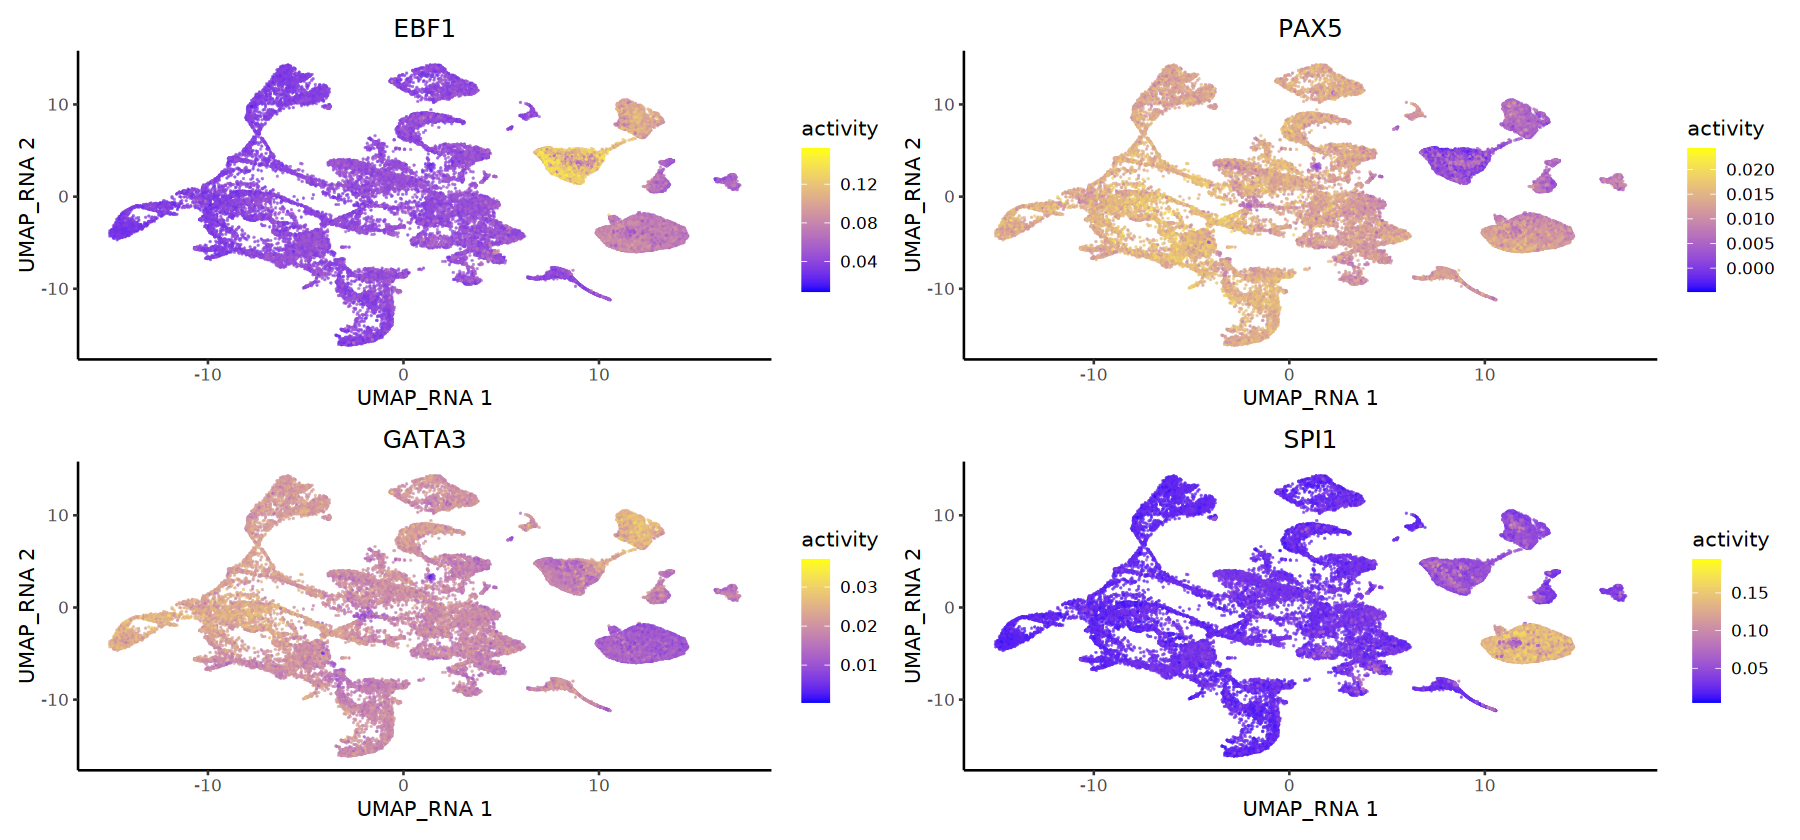

In [113]:
options(ggrastr.default.dpi=300)

tfs_interest <- c("EBF1","PAX5", "GATA3","SPI1")
plotActivityDim(sce = GeneExpressionMatrix,
                activity_matrix = score.combine[tfs_interest,], 
                tf = tfs_interest, 
                dimtype = "UMAP_RNA",
                nrow=2,
                ncol=2,
                point_size=0.1,
                rasterise = TRUE)

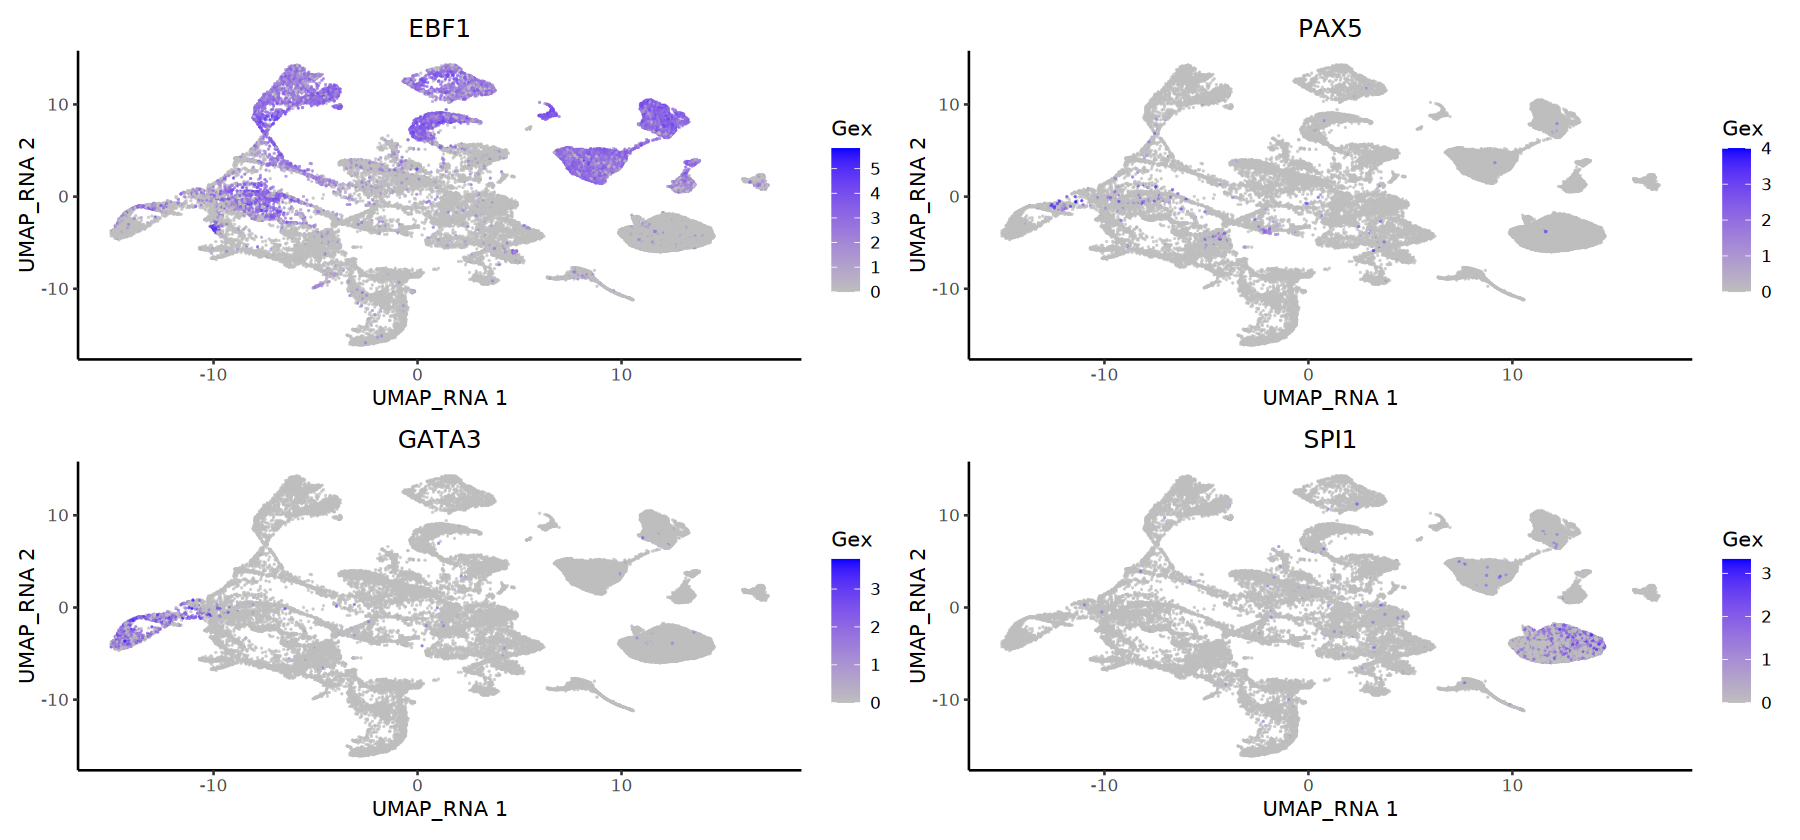

In [115]:
plotActivityDim(sce = GeneExpressionMatrix, 
                activity_matrix = assay(GeneExpressionMatrix, "logcounts")[tfs_interest,], 
                tf = tfs_interest, 
                dimtype = "UMAP_RNA",
                nrow=2,
                ncol=2,
                legend.label = "Gex",
                colors = c("grey","blue"),
                point_size=0.1,
                rasterise = TRUE)

In [117]:
options(repr.plot.width = 15, repr.plot.height = 10)

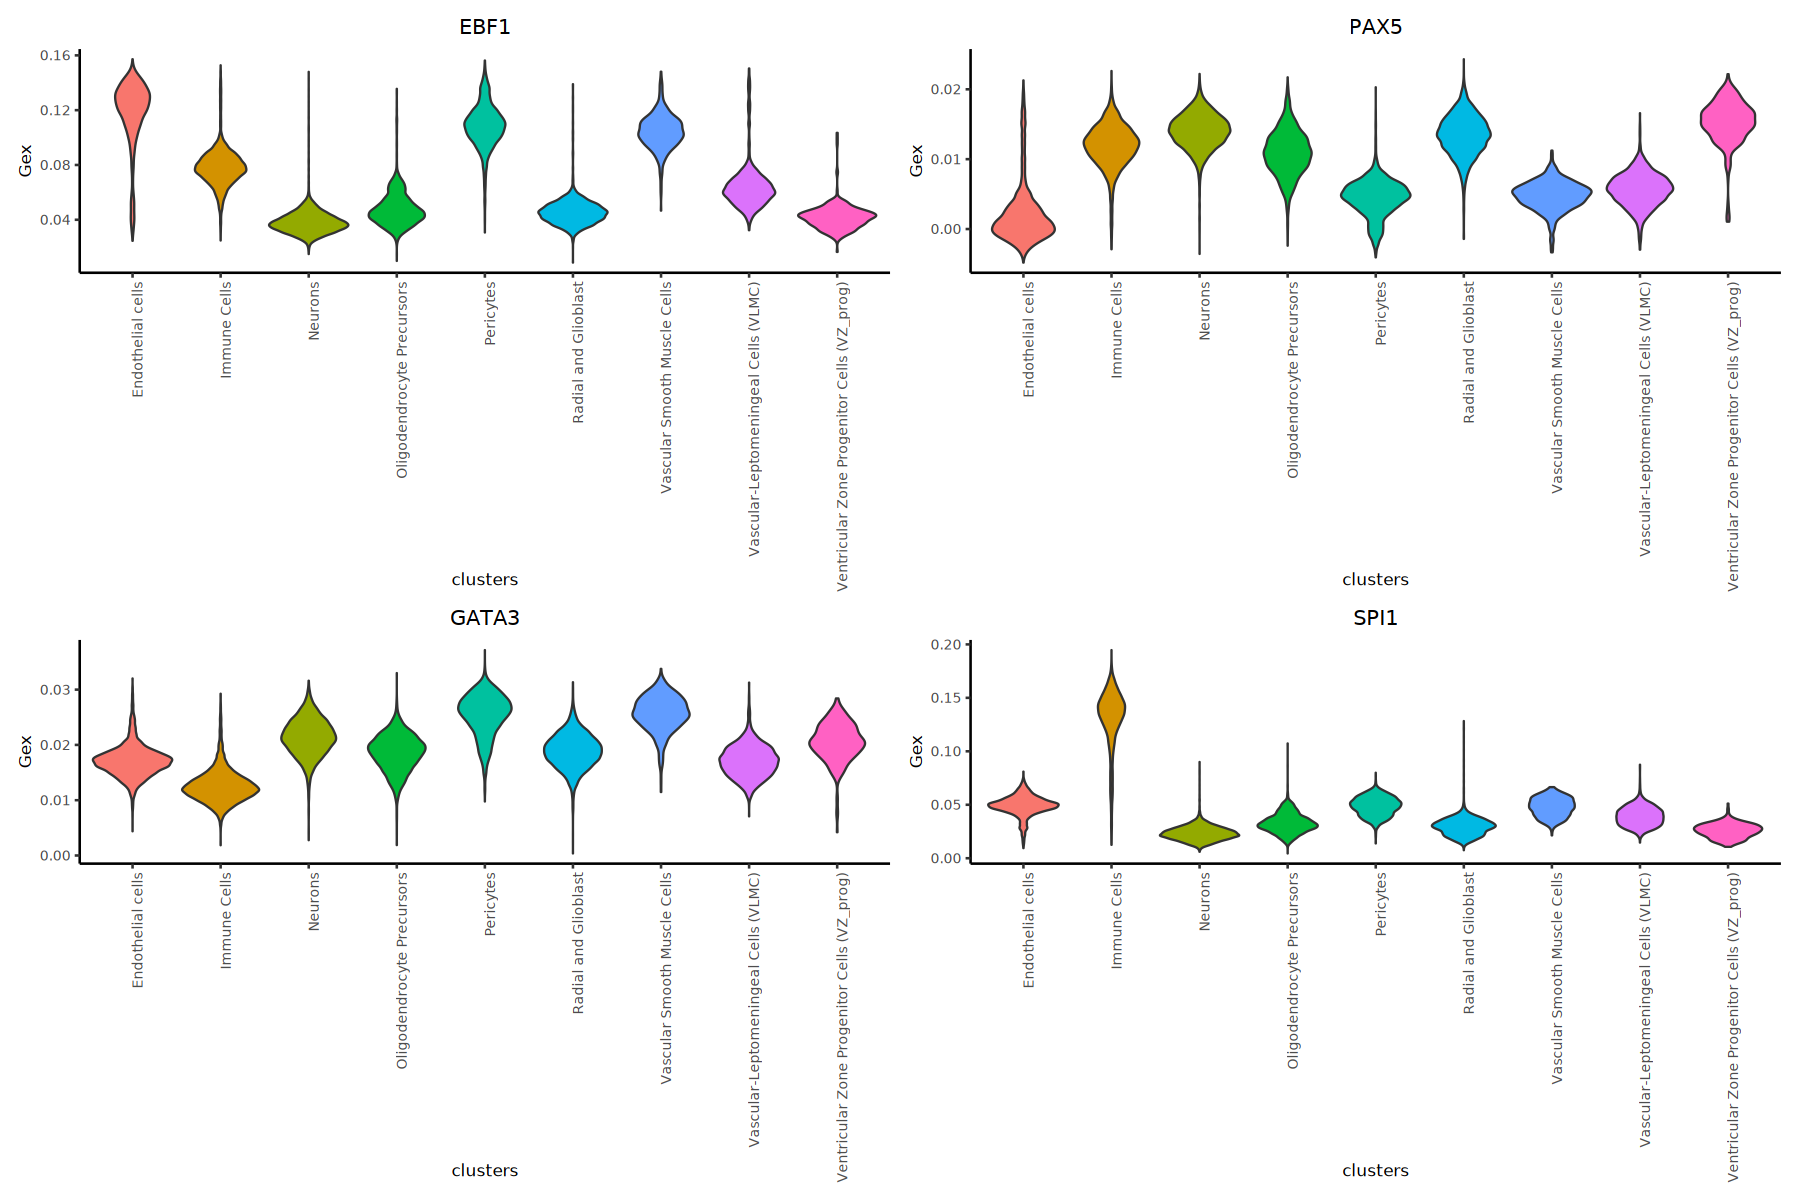

In [118]:
plotActivityViolin(activity_matrix = score.combine, 
                   tf = tfs_interest, 
                   clusters = GeneExpressionMatrix$main_cell_types,
                   legend.label = "Gex",
                   nrow=2,
                   ncol=2)

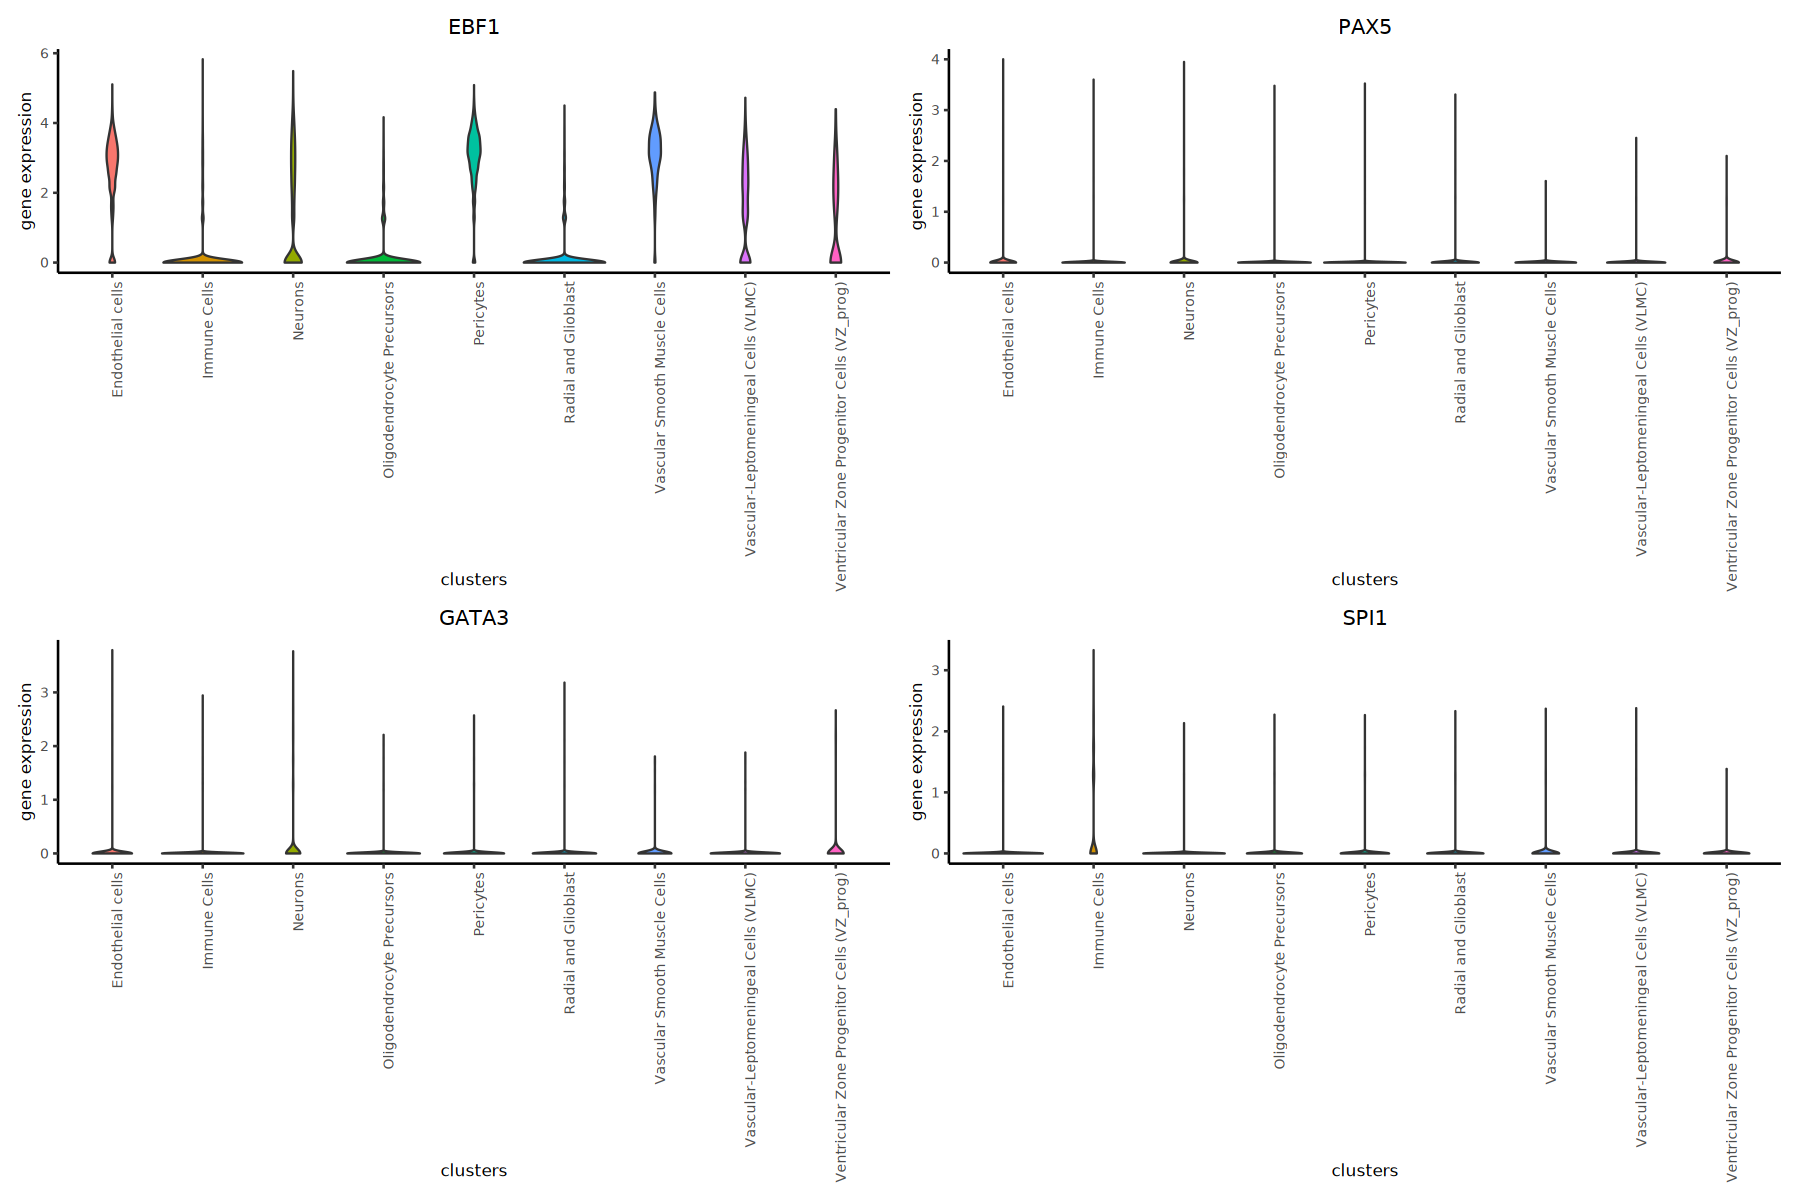

In [119]:
plotActivityViolin(activity_matrix = assay(GeneExpressionMatrix, "logcounts")[tfs_interest,],  
                   tf = tfs_interest, 
                   clusters = GeneExpressionMatrix$main_cell_types,
                   nrow=2,
                   ncol=2,
                   legend.label = "gene expression")

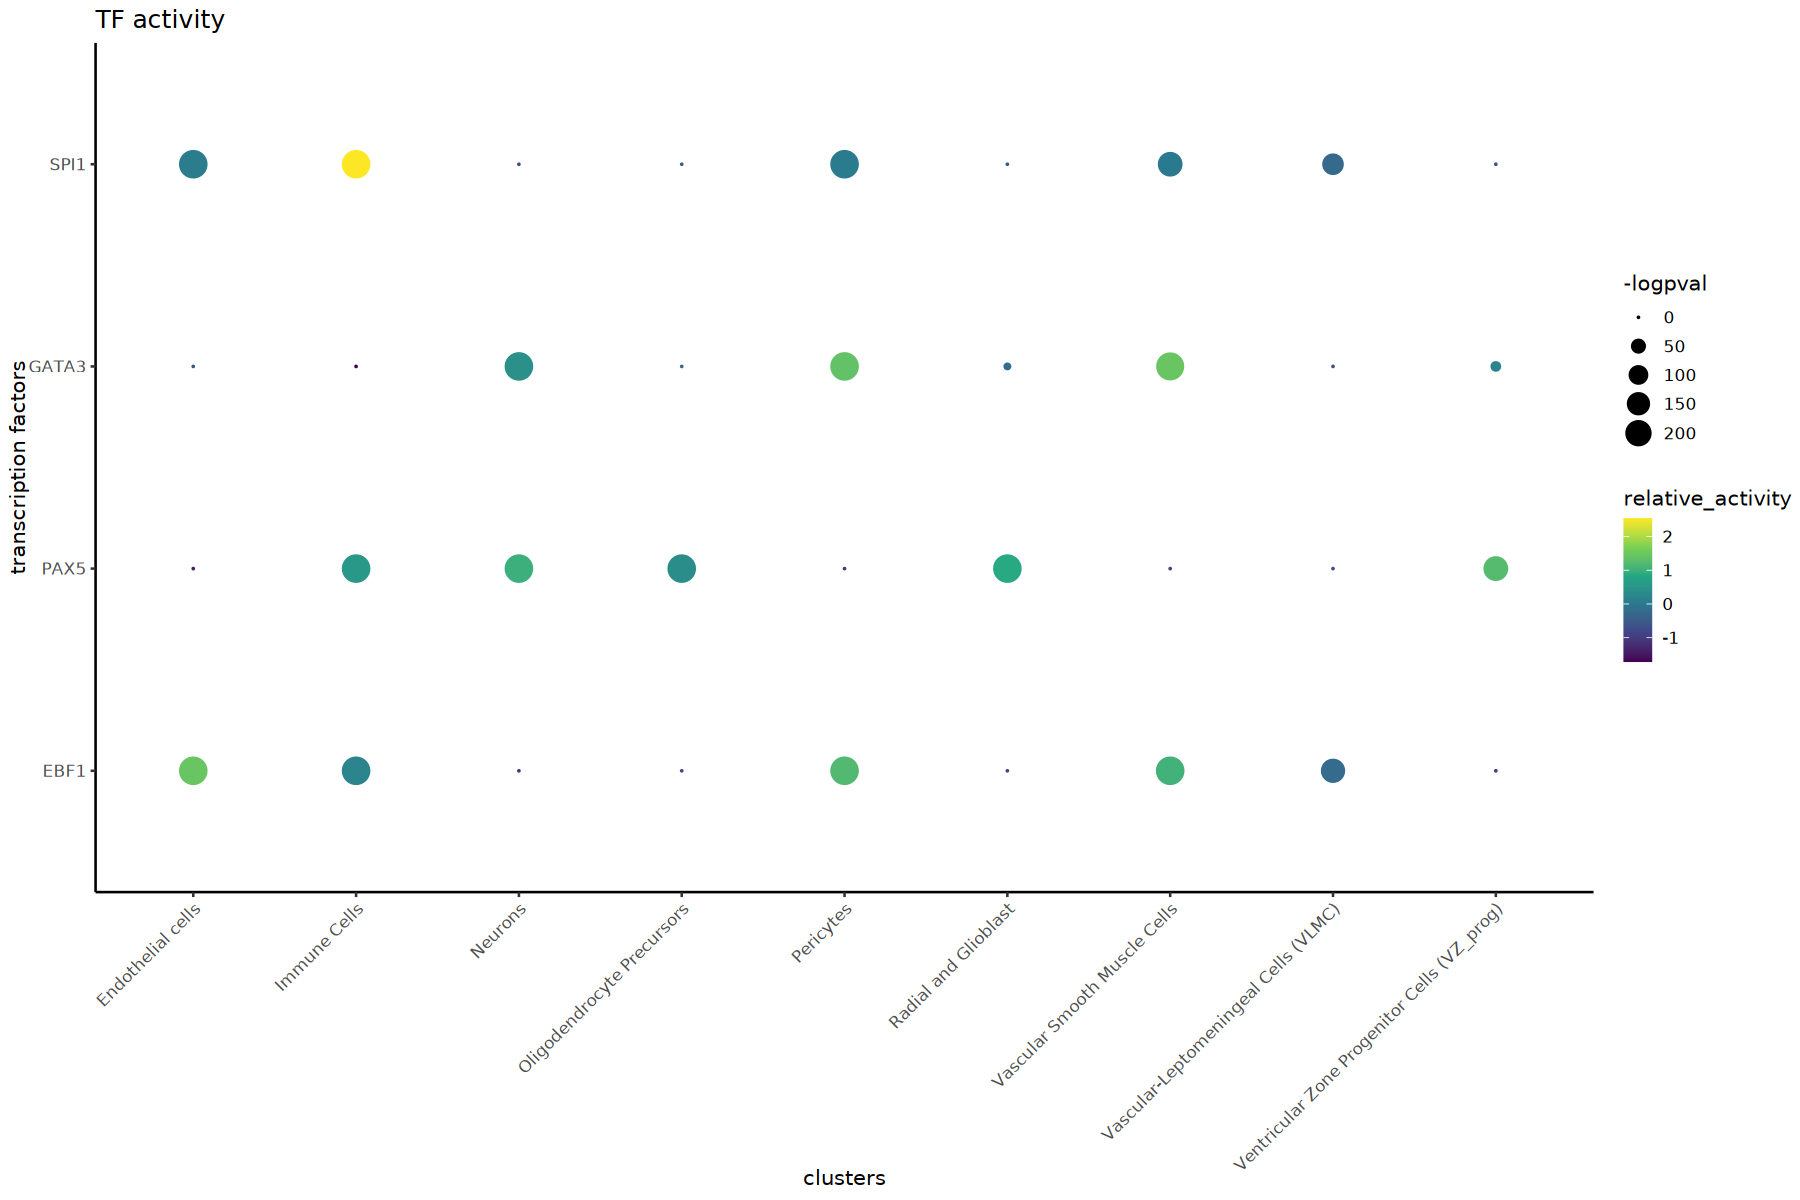

In [121]:
plotBubble(activity_matrix = score.combine, 
           tf = tfs_interest,
           GeneExpressionMatrix$main_cell_types,
           pval.type = "some", 
           direction = "up", 
           # logvalues = FALSE # this argument is giving error as being unused. maybe the function is updated. 
           )

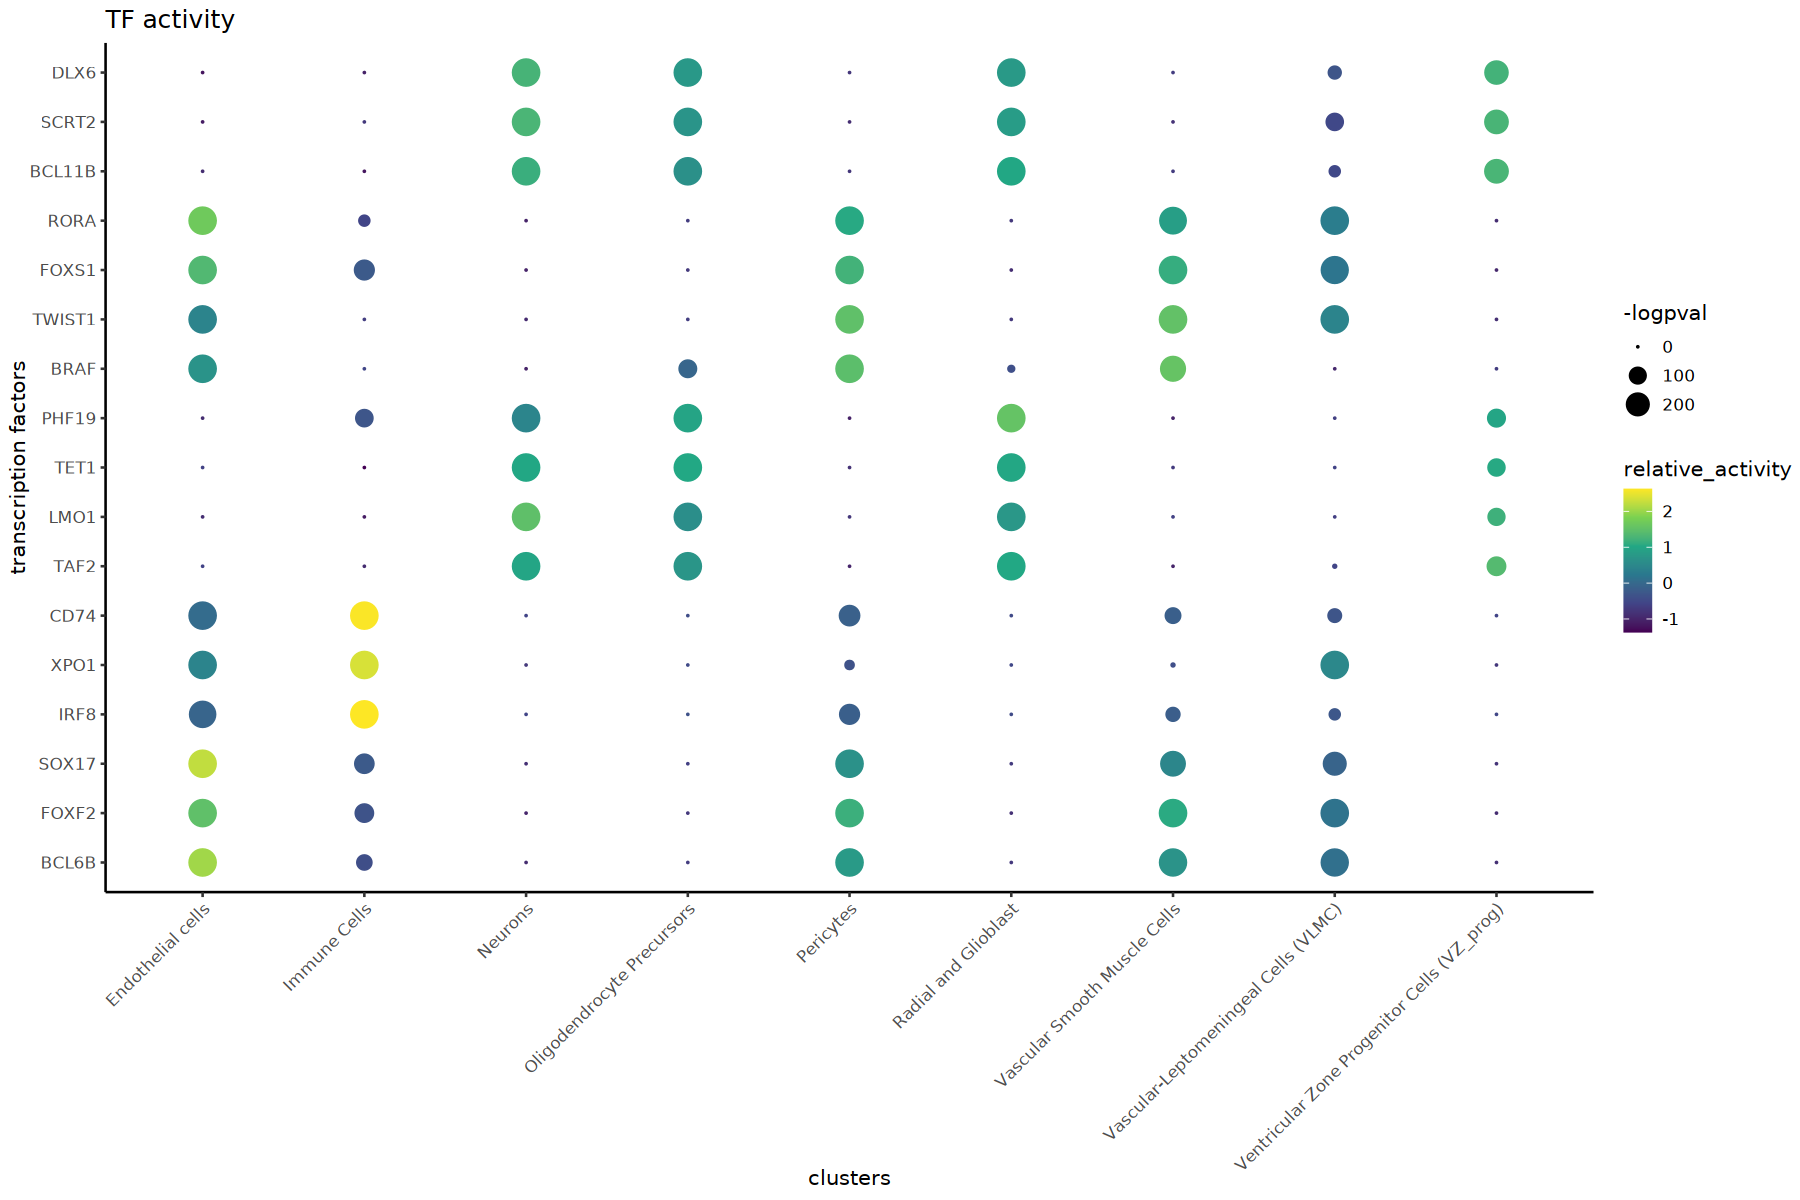

In [123]:
plotBubble(activity_matrix = score.combine, 
           tf = markers.sig$tf, 
           GeneExpressionMatrix$main_cell_types,
           pval.type = "some", 
           direction = "up", 
           # logvalues = FALSE # this argument is giving error as being unused. maybe the function is updated. 
           )

In [125]:
BiocManager::install("EnrichmentBrowser")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    BioCsoft: https://bioconductor.org/packages/3.19/bioc
    BioCann: https://bioconductor.org/packages/3.19/data/annotation
    BioCexp: https://bioconductor.org/packages/3.19/data/experiment
    BioCworkflows: https://bioconductor.org/packages/3.19/workflows
    BioCbooks: https://bioconductor.org/packages/3.19/books
    CRAN: https://cran.r-project.org

Bioconductor version 3.19 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'EnrichmentBrowser'

also installing the dependencies ‘org.Hs.eg.db’, ‘KEGGgraph’, ‘Rgraphviz’, ‘SPIA’, ‘graphite’, ‘hwriter’, ‘pathview’, ‘safe’


Warning message in download.file(url, destfile, method, mode = "wb", ...):
“downloaded length 25575424 != reported length 99485212”
Warning message in download.file(url, destfile, method, mode = "wb", ...):
“URL 'https://mghp.osn.xsede.org/bi

Error in download.file(url, destfile, method, mode = "wb", ...) : 
  download from 'https://bioconductor.org/packages/3.19/data/annotation/src/contrib/org.Hs.eg.db_3.19.1.tar.gz' failed


Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
“download of package ‘org.Hs.eg.db’ failed”
Warning message in install.packages(...):
“installation of package ‘Rgraphviz’ had non-zero exit status”
Warning message in install.packages(...):
“installation of package ‘KEGGgraph’ had non-zero exit status”
Warning message in install.packages(...):
“installation of package ‘SPIA’ had non-zero exit status”
Warning message in install.packages(...):
“installation of package ‘pathview’ had non-zero exit status”
Warning message in install.packages(...):
“installation of package ‘EnrichmentBrowser’ had non-zero exit status”
Old packages: 'DOSE', 'KernSmooth', 'MASS', 'Matrix', 'XML', 'ape', 'aplot',
  'bayestestR', 'broom.helpers', 'cards', 'caret', 'class', 'clock', 'cluster',
  'datawizard', 'e1071', 'ellmer', 'enrichplot', 'fastmatch', 'gdsfmt',
  'ggfun', 'ggstats', 'gower', 'graphlayouts', 'hardhat', 'hdf5r', 'insight',
  'janitor', 'lava', 'lubridate', 'map

In [126]:
my_libpaths <- c("/fast/home/y/ykazci/R/x86_64-unknown-linux-gnu-library/4.3",
"/gnu/store/mj2kqa65bbqr3155zccvm01hq7wi7fng-profile/site-library",
"/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/library"
)

In [127]:
# use my global library to install packages:

renv::hydrate(packages = 'org.Hs.eg.db', sources = my_libpaths)

The following packages were discovered:

# /fast/home/y/ykazci/R/x86_64-unknown-linux-gnu-library/4.3 -----------------
- org.Hs.eg.db   3.19.1

They will be linked into the project library.

The following packages are used in this project, but not available locally:
- AnnotationDbi
renv will attempt to download and install these packages.

Done!king packages into the project library ... 
- Hydrated 1 packages in 23 seconds.
- Resolving missing dependencies ... 
# Installing packages --------------------------------------------------------
- Installing AnnotationDbi ...                  OK [linked from cache]


In [128]:
renv::hydrate(packages = 'KEGGgraph', sources = my_libpaths)

The following packages are used in this project, but not available locally:
- KEGGgraph
renv will attempt to download and install these packages.

- Hydrated 0 packages in 0.006 milliseconds.
- Resolving missing dependencies ... 
# Downloading packages -------------------------------------------------------
- Downloading KEGGgraph from BioCsoft ...       OK [1.3 Mb in 18s]
- Downloading Rgraphviz from BioCsoft ...       OK [7.1 Mb in 59s]
Successfully downloaded 2 packages in 100 seconds.

# Installing packages --------------------------------------------------------
- Installing Rgraphviz ...                      FAILED
- Installing KEGGgraph ...                      FAILED
The following package(s) were not installed successfully:
- [Rgraphviz]: Error installing package 'Rgraphviz':
================ <...>
- [KEGGgraph]: Error installing package 'KEGGgraph':
================ <...>
You may need to manually download and install these packages.



In [129]:
renv::install(packages = 'KEGGgraph')

# Downloading packages -------------------------------------------------------
- Downloading KEGGgraph from BioCsoft ...       OK [file is up to date]
- Downloading Rgraphviz from BioCsoft ...       OK [file is up to date]
Successfully downloaded 2 packages in 1.9 seconds.

The following package(s) will be installed:
- KEGGgraph [1.64.0]
- Rgraphviz [2.48.0]
These packages will be installed into "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2024_C_A_Mannens_C_et_al/04_02_25/renv/library/linux-rhel-9.4/R-4.4/x86_64-unknown-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing Rgraphviz ...                      FAILED


ERROR: Error: Error installing package 'Rgraphviz':
=====================================

During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
4: Setting LC_PAPER failed, using "C" 
5: Setting LC_MEASUREMENT failed, using "C" 
* installing *source* package ‘Rgraphviz’ ...
** using staged installation
configure: Using bundled Graphviz.
configure: Searching for the compilers specified by R.
checking for gcc... gcc
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether the compiler supports GNU C... yes
checking whether gcc accepts -g... yes
checking for gcc option to enable C11 features... none needed
checking how to run the C preprocessor... gcc -E
checking whether the compiler supports GNU C++... yes
checking whether g++ -std=gnu++17 accepts -g... yes
checking for g++ -std=gnu++17 option to enable C++11 features... none needed
configure: Preparing to compile Graphviz.
configure: Configuring bundled Graphviz.
checking build system type... x86_64-pc-linux-gnu
checking host system type... x86_64-pc-linux-gnu
checking for a BSD-compatible install... /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c
checking whether build environment is sane... yes
checking for a race-free mkdir -p... /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p
checking for gawk... gawk
checking whether make sets $(MAKE)... yes
checking whether make supports nested variables... yes
./configure: line 4721: cmp: command not found
checking for style of include used by make... GNU
checking for gcc... gcc
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether the compiler supports GNU C... yes
checking whether gcc accepts -g... yes
checking for gcc option to enable C11 features... none needed
checking dependency style of gcc... gcc3
checking for library containing strerror... none required
checking for flex... no
checking for lex... no
checking for bison... no
checking for byacc... no
checking for gawk... (cached) gawk
checking whether ln -s works... yes
checking for sed... /gnu/store/wkq0r870il8msgq2hdxahm5hi9yzrd8y-sed-4.8/bin/sed
checking for grep... grep
checking for sort... sort
checking for groff... false
checking for ps2pdf... false
checking for pstopdf... (cached) false
checking for pkg-config... /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/pkg-config
checking pkg-config is at least version 0.9.0... yes
checking for tclsh8.6... no
checking for tclsh8.5... no
checking for tclsh8.4... no
checking for tclsh8.3... no
checking for tclsh... no
checking whether gcc and cc understand -c and -o together... yes
checking whether the compiler supports GNU C++... yes
checking whether g++ -std=gnu++17 accepts -g... yes
checking for g++ -std=gnu++17 option to enable C++11 features... none needed
checking dependency style of g++ -std=gnu++17... gcc3
checking for gcc... gcc
checking whether the compiler supports GNU Objective C... no
checking whether gcc accepts -g... no
checking dependency style of gcc... gcc3
checking for inline... inline
checking for windres... no
checking for an ANSI C-conforming const... yes
checking for stdio.h... yes
checking for stdlib.h... yes
checking for string.h... yes
checking for inttypes.h... yes
checking for stdint.h... yes
checking for strings.h... yes
checking for sys/stat.h... yes
checking for sys/types.h... yes
checking for unistd.h... yes
checking for sys/time.h... yes
checking for mode_t... yes
checking for pid_t... yes
checking for size_t... yes
checking for ssize_t... yes
checking how to run the C preprocessor... gcc -E
checking for grep that handles long lines and -e... grep
checking for egrep... grep -E
checking for uid_t in sys/types.h... yes
checking for stdarg.h... yes
checking for stddef.h... yes
checking for stddef.h... (cached) yes
checking for stdlib.h... (cached) yes
checking for stdint.h... (cached) yes
checking for malloc.h... yes
checking for fcntl.h... yes
checking for search.h... yes
checking for getopt.h... yes
checking for pthread.h... yes
checking for values.h... yes
checking for float.h... yes
checking for limits.h... yes
checking for termios.h... yes
checking for errno.h... yes
checking for time.h... yes
checking for unistd.h... (cached) yes
checking for fenv.h... yes
checking for string.h... (cached) yes
checking for strings.h... (cached) yes
checking for inttypes.h... (cached) yes
checking for setjmp.h... yes
checking for sys/time.h... (cached) yes
checking for sys/times.h... yes
checking for sys/types.h... (cached) yes
checking for sys/select.h... yes
checking for fpu_control.h... yes
checking for sys/fpu.h... no
checking for sys/socket.h... yes
checking for sys/stat.h... (cached) yes
checking for sys/mman.h... yes
checking for sys/ioctl.h... yes
checking for sys/inotify.h... yes
checking for langinfo.h... yes
checking for libintl.h... yes
checking for crt_externs.h... no
checking for dirent.h that defines DIR... yes
checking for library containing opendir... none required
checking for _Bool... yes
checking for stdbool.h that conforms to C99... yes
checking for socklen_t... yes
checking for bool... yes
checking for struct dioattr... no
checking for main in -lm... yes
checking for feenableexcept... yes
checking for fesetenv... yes
checking for libgen.h... yes
checking for basename in -lgen... no
checking for working alloca.h... yes
checking for alloca... yes
checking for lrand48... yes
checking for drand48... yes
checking for srand48... yes
checking for setmode... no
checking for setenv... yes
checking for getenv... yes
checking for __freadable... yes
checking for _sysconf... no
checking for getrusage... yes
checking for strerror... yes
checking for cbrt... no
checking for lsqrt... no
checking for vsnprintf... yes
checking for strtoul... yes
checking for strtoll... yes
checking for strtoull... yes
checking for uname... yes
checking for memset... yes
checking for nl_langinfo... yes
checking for pow... no
checking for sqrt... no
checking for strchr... yes
checking for strdup... yes
checking for strerror... (cached) yes
checking for strstr... yes
checking for _NSGetEnviron... no
checking for strcasecmp... yes
checking for strncasecmp... yes
checking for strcasestr... yes
checking for a sed that does not truncate output... /gnu/store/wkq0r870il8msgq2hdxahm5hi9yzrd8y-sed-4.8/bin/sed
checking for fgrep... grep -F
checking for ld used by gcc... /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/ld
checking if the linker (/gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/ld) is GNU ld... yes
checking for BSD- or MS-compatible name lister (nm)... /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/nm -B
checking the name lister (/gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/nm -B) interface... BSD nm
checking the maximum length of command line arguments... 1572864
checking whether the shell understands some XSI constructs... yes
checking whether the shell understands "+="... yes
checking for /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/ld option to reload object files... -r
checking for objdump... objdump
checking how to recognize dependent libraries... pass_all
checking for ar... ar
checking for strip... strip
checking for ranlib... ranlib
checking command to parse /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/nm -B output from gcc object... ok
checking for dlfcn.h... yes
checking whether the compiler supports GNU C++... (cached) yes
checking whether g++ -std=gnu++17 accepts -g... (cached) yes
checking for g++ -std=gnu++17 option to enable C++11 features... (cached) none needed
checking dependency style of g++ -std=gnu++17... (cached) gcc3
checking how to run the C++ preprocessor... g++ -std=gnu++17 -E
checking for objdir... .libs
checking if gcc supports -fno-rtti -fno-exceptions... ./configure: line 13518: diff: command not found
no
checking for gcc option to produce PIC... -fPIC -DPIC
checking if gcc PIC flag -fPIC -DPIC works... yes
checking if gcc static flag -static works... no
checking if gcc supports -c -o file.o... yes
checking if gcc supports -c -o file.o... (cached) yes
checking whether the gcc linker (/gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/ld -m elf_x86_64) supports shared libraries... yes
checking dynamic linker characteristics... GNU/Linux ld.so
checking how to hardcode library paths into programs... immediate
checking for shl_load... no
checking for shl_load in -ldld... no
checking for dlopen... yes
checking whether a program can dlopen itself... yes
checking whether a statically linked program can dlopen itself... yes
checking whether stripping libraries is possible... yes
checking if libtool supports shared libraries... yes
checking whether to build shared libraries... no
checking whether to build static libraries... yes
checking for ld used by g++ -std=gnu++17... /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/ld -m elf_x86_64
checking if the linker (/gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/ld -m elf_x86_64) is GNU ld... yes
checking whether the g++ -std=gnu++17 linker (/gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/ld -m elf_x86_64) supports shared libraries... yes
checking for g++ -std=gnu++17 option to produce PIC... -fPIC -DPIC
checking if g++ -std=gnu++17 PIC flag -fPIC -DPIC works... yes
checking if g++ -std=gnu++17 static flag -static works... no
checking if g++ -std=gnu++17 supports -c -o file.o... yes
checking if g++ -std=gnu++17 supports -c -o file.o... (cached) yes
checking whether the g++ -std=gnu++17 linker (/gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/ld -m elf_x86_64) supports shared libraries... yes
checking dynamic linker characteristics... GNU/Linux ld.so
checking how to hardcode library paths into programs... immediate
checking for gcc options needed to detect all undeclared functions... none needed
checking which extension is used for runtime loadable modules... .so
checking which variable specifies run-time module search path... LD_LIBRARY_PATH
checking for the default library search path... /lib64 /usr/lib64 /lib /usr/lib /usr/lib64/R/lib /usr/lib64/dyninst /usr/lib64/mysql /usr/lib64/octave/7.3.0 /usr/lib64/pipewire-0.3/jack/ /opt/dell/srvadmin/lib64 /opt/dell/srvadmin/lib64/openmanage /opt/dell/srvadmin/lib64 /opt/dell/srvadmin/lib64 /opt/dell/srvadmin/lib64/srvadmin-idrac7 /opt/dell/srvadmin/lib64 /opt/dell/srvadmin/lib64/srvadmin-isvc /opt/dell/srvadmin/lib64 /opt/dell/srvadmin/lib64 /opt/dell/srvadmin/lib64 /opt/dell/srvadmin/lib64/openmanage /opt/dell/srvadmin/lib64 /opt/dell/srvadmin/lib64/openmanage /opt/dell/srvadmin/lib64 /opt/dell/srvadmin/lib64 /opt/dell/srvadmin/lib64/openmanage /opt/dell/srvadmin/lib64/openmanage/smpop /opt/dell/srvadmin/lib64 
checking for library containing dlopen... none required
checking for dlerror... yes
checking for shl_load... (cached) no
checking for shl_load in -ldld... (cached) no
checking for dld_link in -ldld... no
checking for _ prefix in compiled symbols... no
checking whether deplibs are loaded by dlopen... yes
checking for argz.h... yes
checking for error_t... yes
checking for argz_add... yes
checking for argz_append... yes
checking for argz_count... yes
checking for argz_create_sep... yes
checking for argz_insert... yes
checking for argz_next... yes
checking for argz_stringify... yes
checking if argz actually works... yes
checking whether libtool supports -dlopen/-dlpreopen... yes
checking for ltdl.h... no
checking where to find libltdl headers... -I${top_srcdir}/libltdl
checking where to find libltdl library... ${top_build_prefix}libltdl/libltdlc.la
checking for unistd.h... (cached) yes
checking for dl.h... no
checking for sys/dl.h... no
checking for dld.h... no
checking for mach-o/dyld.h... no
checking for dirent.h... yes
checking for closedir... yes
checking for opendir... yes
checking for readdir... yes
checking for strlcat... no
checking for strlcpy... no
checking for X... disabled
configure: WARNING: X11 not available.
checking for tcl.h... no
configure: WARNING: Unable to find header tcl.h. The Tcl packages will not be built
configure: WARNING: No Tcl. The Tk packages will not be built either
checking for connect... yes
checking for gethostbyname... yes
checking for main in -lXpm... no
configure: WARNING: Optional Xpm library not available
checking for X11/Intrinsic.h... yes
checking for X11/Xaw/Text.h... no
configure: WARNING: Optional Xaw library not available - missing headers
checking for zlib.h... yes
checking for main in -lz... yes
checking for deflateBound... yes
checking for GDK_PIXBUF... no
checking for GTK... no
checking for GTKGL... no
checking for GTKGLEXT... no
checking for GLADE... no
checking for qmake-qt4... no
checking for qmake-qt3... no
checking for qmake... no
checking for sincos... yes
checking if FILE struct contains _cnt... no
checking if FILE struct contains _r... no
checking if FILE struct contains _next... no
checking if FILE struct contains _IO_read_end... yes
checking if errno externs are declared... no
checking if getopt externs are declared... yes
checking if intptr_t is declared... yes
checking if assert needs __eprintf... no
checking that generated files are newer than configure... done
configure: creating ./config.status
config.status: creating Makefile
config.status: creating lib/Makefile
config.status: creating lib/cdt/Makefile
config.status: creating lib/cdt/libcdt.pc
config.status: creating lib/graph/Makefile
config.status: creating lib/graph/libgraph.pc
config.status: creating lib/rbtree/Makefile
config.status: creating lib/pathplan/Makefile
config.status: creating lib/pathplan/libpathplan.pc
config.status: creating lib/dotgen/Makefile
config.status: creating lib/neatogen/Makefile
config.status: creating lib/fdpgen/Makefile
config.status: creating lib/sparse/Makefile
config.status: creating lib/sfdpgen/Makefile
config.status: creating lib/osage/Makefile
config.status: creating lib/circogen/Makefile
config.status: creating lib/twopigen/Makefile
config.status: creating lib/patchwork/Makefile
config.status: creating lib/pack/Makefile
config.status: creating lib/ortho/Makefile
config.status: creating lib/common/Makefile
config.status: creating lib/vpsc/Makefile
config.status: creating lib/gvc/Makefile
config.status: creating lib/gvc/libgvc.pc
config.status: creating lib/xdot/Makefile
config.status: creating lib/xdot/libxdot.pc
config.status: creating plugin/Makefile
config.status: creating plugin/core/Makefile
config.status: creating plugin/dot_layout/Makefile
config.status: creating plugin/neato_layout/Makefile
config.status: creating graphviz.spec
config.status: creating Doxyfile
config.status: creating config.h
config.status: executing depfiles commands
config.status: executing libtool commands
=== configuring in libltdl (/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/libltdl)
configure: running /bin/sh ./configure --disable-option-checking '--prefix=/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix'  'CC=gcc' 'CXX=g++ -std=gnu++17' 'CFLAGS=-g -O2' 'CXXFLAGS=-g -O2' 'LDFLAGS=-L/usr/local/lib' '--libdir=/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib' '--includedir=/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/include' '--with-cgraph=no' '--enable-swig=no' '--enable-static' '--disable-shared' '--with-pic' '--with-libgd=no' '--disable-ltdl' '--without-x' '--without-expat' '--without-devil' '--without-rsvg' '--without-ghostscript' '--without-visio' '--without-pangocairo' '--without-lasi' '--without-glitz' '--without-freetype2' '--without-fontconfig' '--without-rpat' '--without-glut' '--without-gts' '--without-png' '--without-tcl' '--without-jpeg' 'CPPFLAGS=-I/usr/local/include' 'PKG_CONFIG_PATH=/gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/lib/pkgconfig:/gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/share/pkgconfig' 'R_LIBS=/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2024_C_A_Mannens_C_et_al/04_02_25/renv/staging/1/00LOCK-Rgraphviz/00new:/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2024_C_A_Mannens_C_et_al/04_02_25/renv/staging/1:/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2024_C_A_Mannens_C_et_al/04_02_25/renv/staging/1:/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2024_C_A_Mannens_C_et_al/04_02_25/renv/library/linux-rhel-9.4/R-4.4/x86_64-unknown-linux-gnu:/fast/home/y/ykazci/.cache/R/renv/sandbox/linux-rhel-9.4/R-4.4/x86_64-unknown-linux-gnu/233218af' '--enable-ltdl-convenience' --cache-file=/dev/null --srcdir=.
checking for a BSD-compatible install... /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c
checking whether build environment is sane... yes
checking for a race-free mkdir -p... /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p
checking for gawk... gawk
checking whether make sets $(MAKE)... yes
checking build system type... x86_64-pc-linux-gnu
checking host system type... x86_64-pc-linux-gnu
checking for style of include used by make... GNU
checking for gcc... gcc
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether the compiler supports GNU C... yes
checking whether gcc accepts -g... yes
checking for gcc option to enable C11 features... none needed
checking dependency style of gcc... gcc3
checking for a sed that does not truncate output... /gnu/store/wkq0r870il8msgq2hdxahm5hi9yzrd8y-sed-4.8/bin/sed
checking for grep that handles long lines and -e... /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/grep
checking for egrep... /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/grep -E
checking for fgrep... /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/grep -F
checking for ld used by gcc... /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/ld
checking if the linker (/gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/ld) is GNU ld... yes
checking for BSD- or MS-compatible name lister (nm)... /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/nm -B
checking the name lister (/gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/nm -B) interface... BSD nm
checking whether ln -s works... yes
checking the maximum length of command line arguments... 1572864
checking whether the shell understands some XSI constructs... yes
checking whether the shell understands "+="... yes
checking for /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/ld option to reload object files... -r
checking for objdump... objdump
checking how to recognize dependent libraries... pass_all
checking for ar... ar
checking for strip... strip
checking for ranlib... ranlib
checking command to parse /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/nm -B output from gcc object... ok
checking for stdio.h... yes
checking for stdlib.h... yes
checking for string.h... yes
checking for inttypes.h... yes
checking for stdint.h... yes
checking for strings.h... yes
checking for sys/stat.h... yes
checking for sys/types.h... yes
checking for unistd.h... yes
checking for dlfcn.h... yes
checking for objdir... .libs
checking if gcc supports -fno-rtti -fno-exceptions... ./configure: line 8140: diff: command not found
no
checking for gcc option to produce PIC... -fPIC -DPIC
checking if gcc PIC flag -fPIC -DPIC works... yes
checking if gcc static flag -static works... no
checking if gcc supports -c -o file.o... yes
checking if gcc supports -c -o file.o... (cached) yes
checking whether the gcc linker (/gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/ld -m elf_x86_64) supports shared libraries... yes
checking dynamic linker characteristics... GNU/Linux ld.so
checking how to hardcode library paths into programs... immediate
checking for shl_load... no
checking for shl_load in -ldld... no
checking for dlopen... yes
checking whether a program can dlopen itself... yes
checking whether a statically linked program can dlopen itself... yes
checking whether stripping libraries is possible... yes
checking if libtool supports shared libraries... yes
checking whether to build shared libraries... no
checking whether to build static libraries... yes
checking which extension is used for runtime loadable modules... .so
checking which variable specifies run-time module search path... LD_LIBRARY_PATH
checking for the default library search path... /lib64 /usr/lib64 /lib /usr/lib /usr/lib64/R/lib /usr/lib64/dyninst /usr/lib64/mysql /usr/lib64/octave/7.3.0 /usr/lib64/pipewire-0.3/jack/ /opt/dell/srvadmin/lib64 /opt/dell/srvadmin/lib64/openmanage /opt/dell/srvadmin/lib64 /opt/dell/srvadmin/lib64 /opt/dell/srvadmin/lib64/srvadmin-idrac7 /opt/dell/srvadmin/lib64 /opt/dell/srvadmin/lib64/srvadmin-isvc /opt/dell/srvadmin/lib64 /opt/dell/srvadmin/lib64 /opt/dell/srvadmin/lib64 /opt/dell/srvadmin/lib64/openmanage /opt/dell/srvadmin/lib64 /opt/dell/srvadmin/lib64/openmanage /opt/dell/srvadmin/lib64 /opt/dell/srvadmin/lib64 /opt/dell/srvadmin/lib64/openmanage /opt/dell/srvadmin/lib64/openmanage/smpop /opt/dell/srvadmin/lib64 
checking for gcc options needed to detect all undeclared functions... none needed
checking for library containing dlopen... none required
checking for dlerror... yes
checking for shl_load... (cached) no
checking for shl_load in -ldld... (cached) no
checking for dld_link in -ldld... no
checking for _ prefix in compiled symbols... no
checking whether deplibs are loaded by dlopen... yes
checking for argz.h... yes
checking for error_t... yes
checking for argz_add... yes
checking for argz_append... yes
checking for argz_count... yes
checking for argz_create_sep... yes
checking for argz_insert... yes
checking for argz_next... yes
checking for argz_stringify... yes
checking if argz actually works... yes
checking whether libtool supports -dlopen/-dlpreopen... yes
checking for unistd.h... (cached) yes
checking for dl.h... no
checking for sys/dl.h... no
checking for dld.h... no
checking for mach-o/dyld.h... no
checking for dirent.h... yes
checking for closedir... yes
checking for opendir... yes
checking for readdir... yes
checking for strlcat... no
checking for strlcpy... no
checking that generated files are newer than configure... done
configure: creating ./config.status
config.status: creating Makefile
config.status: creating config.h
config.status: executing depfiles commands
config.status: executing libtool commands

----------------------------------------------------------------

graphviz-2.28.0 will be compiled with the following:

options:
  cgraph:        No (disabled by default - experimental)
  digcola:       Yes
  expat:         No (disabled)
  fontconfig:    No (disabled)
  freetype:      No (disabled)
  glut:          No (disabled)
  gts:           No (disabled)
  ipsepcola:     No (disabled by default - C++ portability issues)
  ltdl:          No (disabled)
  ortho:         Yes
  png:           No (disabled)
  jpeg:          No (disabled)
  sfdp:          Yes
  shared:        No (disabled)
  static:        Yes
  qt:            No (qmake not found)

commands:
  dot:           Yes (always enabled)
  neato:         Yes (always enabled)
  fdp:           Yes (always enabled)
  circo:         Yes (always enabled)
  twopi:         Yes (always enabled)
  gvpr:          Yes (always enabled)
  gvmap:         Yes (always enabled)
  lefty:         No (missing Xaw headers)
  smyrna:        No (disabled by default - experimental)
  gvedit:        No (qmake not found)

plugin libraries:
  dot_layout:    Yes (always enabled)
  neato_layout:  Yes (always enabled)
  core:          Yes (always enabled)
  devil:         No (disabled)
  gd:            No (disabled)
  gdiplus:       No (disabled by default - Windows only)
  gdk_pixbuf:    No (gdk_pixbuf library not available)
  ghostscript:   No (disabled)
  glitz:         No (disabled by default - incomplete)
  gtk:           No (gtk library not available)
  lasi:          No (disabled)
  ming:          No (disabled by default - incomplete)
  pangocairo:    No (disabled)
  quartz:        No (disabled by default - Mac only)
  rsvg:          No (disabled)
  visio:         No (disabled by default - experimental)
  xlib:          No (disabled or unavailable)

language extensions:
  gv_sharp:      No (swig not available)
  gv_go:         No (disabled by default - experimental)
  gv_guile:      No (swig not available)
  gv_io:         No (disabled by default - no swig support yet)
  gv_java:       No (swig not available)
  gv_lua:        No (swig not available)
  gv_ocaml:      No (swig not available)
  gv_perl:       No (swig not available)
  gv_php:        No (swig not available)
  gv_python:     No (swig not available)
  gv_python23:   No (disabled by default - for multiversion installs)
  gv_python24:   No (disabled by default - for multiversion installs)
  gv_python25:   No (disabled by default - for multiversion installs)
  gv_python26:   No (disabled by default - for multiversion installs)
  gv_python27:   No (disabled by default - for multiversion installs)
  gv_R:          No (swig not available)
  gv_ruby:       No (swig not available)
  gv_tcl:        No (tcl not available)

  tcldot:        No (tcl not available)
  tclpathplan:   No (tcl not available)
  gdtclft:       No (tcl not available)
  tkspline:      No (tk not available)
grep 'PACKAGE\|VERSION\|GVPLUGIN' config.h > graphviz_version.h
make  install-recursive
make[1]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz'
Making install in libltdl
make[2]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/libltdl'
make  install-am
make[3]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/libltdl'
/bin/sh ./libtool  --tag=CC   --mode=compile gcc -DHAVE_CONFIG_H -I.  -DLT_CONFIG_H='<config.h>' -DLTDL -I. -I. -Ilibltdl -I./libltdl -I./libltdl -I/usr/local/include  -g -O2 -MT dlopen.lo -MD -MP -MF .deps/dlopen.Tpo -c -o dlopen.lo `test -f 'loaders/dlopen.c' || echo './'`loaders/dlopen.c
libtool: compile:  gcc -DHAVE_CONFIG_H -I. "-DLT_CONFIG_H=<config.h>" -DLTDL -I. -I. -Ilibltdl -I./libltdl -I./libltdl -I/usr/local/include -g -O2 -MT dlopen.lo -MD -MP -MF .deps/dlopen.Tpo -c loaders/dlopen.c  -fPIC -DPIC -o dlopen.o
mv -f .deps/dlopen.Tpo .deps/dlopen.Plo
/bin/sh ./libtool --tag=CC   --mode=link gcc  -g -O2 -module -avoid-version -L/usr/local/lib -o dlopen.la  dlopen.lo  
libtool: link: ar cru .libs/dlopen.a  dlopen.o
ar: `u' modifier ignored since `D' is the default (see `U')
libtool: link: ranlib .libs/dlopen.a
libtool: link: ( cd ".libs" && rm -f "dlopen.la" && ln -s "../dlopen.la" "dlopen.la" )
/bin/sh ./libtool  --tag=CC   --mode=compile gcc -DHAVE_CONFIG_H -I.  -DLTDLOPEN=libltdlc -DLT_CONFIG_H='<config.h>' -DLTDL -I. -I. -Ilibltdl -I./libltdl -I./libltdl -I/usr/local/include  -g -O2 -MT libltdlc_la-preopen.lo -MD -MP -MF .deps/libltdlc_la-preopen.Tpo -c -o libltdlc_la-preopen.lo `test -f 'loaders/preopen.c' || echo './'`loaders/preopen.c
libtool: compile:  gcc -DHAVE_CONFIG_H -I. -DLTDLOPEN=libltdlc "-DLT_CONFIG_H=<config.h>" -DLTDL -I. -I. -Ilibltdl -I./libltdl -I./libltdl -I/usr/local/include -g -O2 -MT libltdlc_la-preopen.lo -MD -MP -MF .deps/libltdlc_la-preopen.Tpo -c loaders/preopen.c  -fPIC -DPIC -o libltdlc_la-preopen.o
mv -f .deps/libltdlc_la-preopen.Tpo .deps/libltdlc_la-preopen.Plo
/bin/sh ./libtool  --tag=CC   --mode=compile gcc -DHAVE_CONFIG_H -I.  -DLTDLOPEN=libltdlc -DLT_CONFIG_H='<config.h>' -DLTDL -I. -I. -Ilibltdl -I./libltdl -I./libltdl -I/usr/local/include  -g -O2 -MT libltdlc_la-lt__alloc.lo -MD -MP -MF .deps/libltdlc_la-lt__alloc.Tpo -c -o libltdlc_la-lt__alloc.lo `test -f 'lt__alloc.c' || echo './'`lt__alloc.c
libtool: compile:  gcc -DHAVE_CONFIG_H -I. -DLTDLOPEN=libltdlc "-DLT_CONFIG_H=<config.h>" -DLTDL -I. -I. -Ilibltdl -I./libltdl -I./libltdl -I/usr/local/include -g -O2 -MT libltdlc_la-lt__alloc.lo -MD -MP -MF .deps/libltdlc_la-lt__alloc.Tpo -c lt__alloc.c  -fPIC -DPIC -o libltdlc_la-lt__alloc.o
mv -f .deps/libltdlc_la-lt__alloc.Tpo .deps/libltdlc_la-lt__alloc.Plo
/bin/sh ./libtool  --tag=CC   --mode=compile gcc -DHAVE_CONFIG_H -I.  -DLTDLOPEN=libltdlc -DLT_CONFIG_H='<config.h>' -DLTDL -I. -I. -Ilibltdl -I./libltdl -I./libltdl -I/usr/local/include  -g -O2 -MT libltdlc_la-lt_dlloader.lo -MD -MP -MF .deps/libltdlc_la-lt_dlloader.Tpo -c -o libltdlc_la-lt_dlloader.lo `test -f 'lt_dlloader.c' || echo './'`lt_dlloader.c
libtool: compile:  gcc -DHAVE_CONFIG_H -I. -DLTDLOPEN=libltdlc "-DLT_CONFIG_H=<config.h>" -DLTDL -I. -I. -Ilibltdl -I./libltdl -I./libltdl -I/usr/local/include -g -O2 -MT libltdlc_la-lt_dlloader.lo -MD -MP -MF .deps/libltdlc_la-lt_dlloader.Tpo -c lt_dlloader.c  -fPIC -DPIC -o libltdlc_la-lt_dlloader.o
mv -f .deps/libltdlc_la-lt_dlloader.Tpo .deps/libltdlc_la-lt_dlloader.Plo
/bin/sh ./libtool  --tag=CC   --mode=compile gcc -DHAVE_CONFIG_H -I.  -DLTDLOPEN=libltdlc -DLT_CONFIG_H='<config.h>' -DLTDL -I. -I. -Ilibltdl -I./libltdl -I./libltdl -I/usr/local/include  -g -O2 -MT libltdlc_la-lt_error.lo -MD -MP -MF .deps/libltdlc_la-lt_error.Tpo -c -o libltdlc_la-lt_error.lo `test -f 'lt_error.c' || echo './'`lt_error.c
libtool: compile:  gcc -DHAVE_CONFIG_H -I. -DLTDLOPEN=libltdlc "-DLT_CONFIG_H=<config.h>" -DLTDL -I. -I. -Ilibltdl -I./libltdl -I./libltdl -I/usr/local/include -g -O2 -MT libltdlc_la-lt_error.lo -MD -MP -MF .deps/libltdlc_la-lt_error.Tpo -c lt_error.c  -fPIC -DPIC -o libltdlc_la-lt_error.o
mv -f .deps/libltdlc_la-lt_error.Tpo .deps/libltdlc_la-lt_error.Plo
/bin/sh ./libtool  --tag=CC   --mode=compile gcc -DHAVE_CONFIG_H -I.  -DLTDLOPEN=libltdlc -DLT_CONFIG_H='<config.h>' -DLTDL -I. -I. -Ilibltdl -I./libltdl -I./libltdl -I/usr/local/include  -g -O2 -MT libltdlc_la-ltdl.lo -MD -MP -MF .deps/libltdlc_la-ltdl.Tpo -c -o libltdlc_la-ltdl.lo `test -f 'ltdl.c' || echo './'`ltdl.c
libtool: compile:  gcc -DHAVE_CONFIG_H -I. -DLTDLOPEN=libltdlc "-DLT_CONFIG_H=<config.h>" -DLTDL -I. -I. -Ilibltdl -I./libltdl -I./libltdl -I/usr/local/include -g -O2 -MT libltdlc_la-ltdl.lo -MD -MP -MF .deps/libltdlc_la-ltdl.Tpo -c ltdl.c  -fPIC -DPIC -o libltdlc_la-ltdl.o
mv -f .deps/libltdlc_la-ltdl.Tpo .deps/libltdlc_la-ltdl.Plo
/bin/sh ./libtool  --tag=CC   --mode=compile gcc -DHAVE_CONFIG_H -I.  -DLTDLOPEN=libltdlc -DLT_CONFIG_H='<config.h>' -DLTDL -I. -I. -Ilibltdl -I./libltdl -I./libltdl -I/usr/local/include  -g -O2 -MT libltdlc_la-slist.lo -MD -MP -MF .deps/libltdlc_la-slist.Tpo -c -o libltdlc_la-slist.lo `test -f 'slist.c' || echo './'`slist.c
libtool: compile:  gcc -DHAVE_CONFIG_H -I. -DLTDLOPEN=libltdlc "-DLT_CONFIG_H=<config.h>" -DLTDL -I. -I. -Ilibltdl -I./libltdl -I./libltdl -I/usr/local/include -g -O2 -MT libltdlc_la-slist.lo -MD -MP -MF .deps/libltdlc_la-slist.Tpo -c slist.c  -fPIC -DPIC -o libltdlc_la-slist.o
mv -f .deps/libltdlc_la-slist.Tpo .deps/libltdlc_la-slist.Plo
/bin/sh ./libtool --tag=CC   --mode=link gcc  -g -O2 -no-undefined -dlpreopen dlopen.la  -L/usr/local/lib -o libltdlc.la  libltdlc_la-preopen.lo libltdlc_la-lt__alloc.lo libltdlc_la-lt_dlloader.lo libltdlc_la-lt_error.lo libltdlc_la-ltdl.lo libltdlc_la-slist.lo lt__strl.lo 
libtool: link: rm -f .libs/libltdlc.nm .libs/libltdlc.nmS .libs/libltdlc.nmT
libtool: link: (cd .libs && gcc -g -O2 -c -fno-builtin  -fPIC -DPIC "libltdlcS.c")
libtool: link: rm -f ".libs/libltdlcS.c" ".libs/libltdlc.nm" ".libs/libltdlc.nmS" ".libs/libltdlc.nmT"
libtool: link: (cd .libs/libltdlc.lax/dlopen.a && ar x "/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/libltdl/./.libs/dlopen.a")
./libtool: line 3180: find: command not found
libtool: link: ar cru .libs/libltdlc.a  libltdlc_la-preopen.o libltdlc_la-lt__alloc.o libltdlc_la-lt_dlloader.o libltdlc_la-lt_error.o libltdlc_la-ltdl.o libltdlc_la-slist.o lt__strl.o .libs/libltdlcS.o  
ar: `u' modifier ignored since `D' is the default (see `U')
libtool: link: ranlib .libs/libltdlc.a
libtool: link: rm -fr .libs/libltdlc.lax
libtool: link: ( cd ".libs" && rm -f "libltdlc.la" && ln -s "../libltdlc.la" "libltdlc.la" )
make[4]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/libltdl'
make[4]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/libltdl'
make[3]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/libltdl'
make[2]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/libltdl'
Making install in lib
make[2]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib'
Making install in cdt
make[3]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/cdt'
  CC       dtclose.lo
  CC       dtdisc.lo
dtdisc.c:13:16: warning: function declaration isn't a prototype [-Wstrict-prototypes]
   13 | static Void_t* dtmemory(dt, addr, size, disc)
      |                ^~~~~~~~
  CC       dtextract.lo
  CC       dtflatten.lo
  CC       dthash.lo
dthash.c:15:13: warning: function declaration isn't a prototype [-Wstrict-prototypes]
   15 | static void dthtab(dt)
      |             ^~~~~~
dthash.c:81:16: warning: function declaration isn't a prototype [-Wstrict-prototypes]
   81 | static Void_t* dthash(dt,obj,type)
      |                ^~~~~~
dthash.c: In function 'dthash':
dthash.c:306:6: warning: 'r' may be used uninitialized in this function [-Wmaybe-uninitialized]
  306 |     (*dt->memoryf)(dt,(Void_t*)r,0,disc);
      |     ~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  CC       dtlist.lo
dtlist.c:11:16: warning: function declaration isn't a prototype [-Wstrict-prototypes]
   11 | static Void_t* dtlist(dt, obj, type)
      |                ^~~~~~
  CC       dtmethod.lo
  CC       dtopen.lo
  CC       dtrenew.lo
  CC       dtrestore.lo
  CC       dtsize.lo
dtsize.c:11:12: warning: function declaration isn't a prototype [-Wstrict-prototypes]
   11 | static int treecount(e)
      |            ^~~~~~~~~
  CC       dtstat.lo
dtstat.c:11:13: warning: function declaration isn't a prototype [-Wstrict-prototypes]
   11 | static void dttstat(ds,root,depth,level)
      |             ^~~~~~~
dtstat.c:31:13: warning: function declaration isn't a prototype [-Wstrict-prototypes]
   31 | static void dthstat(data, ds, count)
      |             ^~~~~~~
  CC       dtstrhash.lo
  CC       dttree.lo
dttree.c:14:16: warning: function declaration isn't a prototype [-Wstrict-prototypes]
   14 | static Void_t* dttree(dt,obj,type)
      |                ^~~~~~
dttree.c: In function 'dttree':
dttree.c:218:16: warning: 'me' may be used uninitialized in this function [-Wmaybe-uninitialized]
  218 |    root->right = link.left;
  CC       dttreeset.lo
dttreeset.c:11:18: warning: function declaration isn't a prototype [-Wstrict-prototypes]
   11 | static Dtlink_t* treebalance(list, size)
      |                  ^~~~~~~~~~~
  CC       dtview.lo
dtview.c:12:16: warning: function declaration isn't a prototype [-Wstrict-prototypes]
   12 | static Void_t* dtvsearch(dt,obj,type)
      |                ^~~~~~~~~
dtview.c: In function 'dtvsearch':
dtview.c:20:12: warning: variable 'lk' set but not used [-Wunused-but-set-variable]
   20 |  int  cmp, lk, sz, ky;
      |            ^~
  CC       dtwalk.lo
dtwalk.c: In function 'dtwalk':
dtwalk.c:14:1: warning: function declaration isn't a prototype [-Wstrict-prototypes]
   14 | int(*  userf)();
      | ^~~
  CCLD     libcdt.la
ar: `u' modifier ignored since `D' is the default (see `U')
  CCLD     libcdt_C.la
ar: `u' modifier ignored since `D' is the default (see `U')
make[4]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/cdt'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib'
 /bin/sh ../../libtool   --mode=install /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c   libcdt.la '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib'
libtool: install: /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c .libs/libcdt.lai /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/libcdt.la
libtool: install: /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c .libs/libcdt.a /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/libcdt.a
libtool: install: chmod 644 /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/libcdt.a
libtool: install: ranlib /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/libcdt.a
libtool: finish: PATH="/gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin:/gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/sbin:/fast/S_Cluster/bin:/usr/local/bin:/opt/age/8.8.1/bin/ERROR::uname:command:not:found:/sbin" ldconfig -n /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib
----------------------------------------------------------------------
Libraries have been installed in:
   /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib

If you ever happen to want to link against installed libraries
in a given directory, LIBDIR, you must either use libtool, and
specify the full pathname of the library, or use the `-LLIBDIR'
flag during linking and do at least one of the following:
   - add LIBDIR to the `LD_LIBRARY_PATH' environment variable
     during execution
   - add LIBDIR to the `LD_RUN_PATH' environment variable
     during linking
   - use the `-Wl,-rpath -Wl,LIBDIR' linker flag
   - have your system administrator add LIBDIR to `/etc/ld.so.conf'

See any operating system documentation about shared libraries for
more information, such as the ld(1) and ld.so(8) manual pages.
----------------------------------------------------------------------
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/share/man/man3'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c -m 644 cdt.3 '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/share/man/man3'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/share/graphviz/doc/pdf'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c -m 644 cdt.3.pdf '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/share/graphviz/doc/pdf'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/pkgconfig'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c -m 644 libcdt.pc '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/pkgconfig'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/include/graphviz'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c -m 644 cdt.h '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/include/graphviz'
make[4]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/cdt'
make[3]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/cdt'
Making install in graph
make[3]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/graph'
  CC       attribs.lo
  CC       agxbuf.lo
  CC       edge.lo
  CC       graph.lo
graph.c: In function 'agclose':
graph.c:374:5: warning: this 'if' clause does not guard... [-Wmisleading-indentation]
  374 |     if (g->attr)
      |     ^~
graph.c:376:2: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the 'if'
  376 |  if (g->didset)
      |  ^~
  CC       graphio.lo
  CC       lexer.lo
lexer.c: In function 'scan_token':
lexer.c:141:11: warning: comparison between pointer and zero character constant [-Wpointer-compare]
  141 |     if (p == '\0')
      |           ^~
lexer.c:141:9: note: did you mean to dereference the pointer?
  141 |     if (p == '\0')
      |         ^
lexer.c:147:12: warning: pointer targets in returning 'unsigned char *' from a function with return type 'char *' differ in signedness [-Wpointer-sign]
  147 |     return p;
      |            ^
lexer.c: In function 'html_pair':
lexer.c:322:9: warning: variable 'rc' set but not used [-Wunused-but-set-variable]
  322 |     int rc, depth = 1;
      |         ^~
In file included from lexer.c:20:
lexer.c: In function 'aglex':
agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
lexer.c:413:29: note: in expansion of macro 'agxbuse'
  413 |  aglval.str = agstrdup_html(agxbuse(&xb));
      |                             ^~~~~~~
lexer.c:435:26: warning: pointer targets in passing argument 1 of 'scan_token' differ in signedness [-Wpointer-sign]
  435 |      LexPtr = scan_token(LexPtr, tbuf);
      |                          ^~~~~~
      |                          |
      |                          char *
lexer.c:136:40: note: expected 'unsigned char *' but argument is of type 'char *'
  136 | static char *scan_token(unsigned char *p, unsigned char *token)
      |                         ~~~~~~~~~~~~~~~^
lexer.c:435:34: warning: pointer targets in passing argument 2 of 'scan_token' differ in signedness [-Wpointer-sign]
  435 |      LexPtr = scan_token(LexPtr, tbuf);
      |                                  ^~~~
      |                                  |
      |                                  char *
lexer.c:136:58: note: expected 'unsigned char *' but argument is of type 'char *'
  136 | static char *scan_token(unsigned char *p, unsigned char *token)
      |                                           ~~~~~~~~~~~~~~~^~~~~
  CC       node.lo
  CC       parser.lo
  CC       refstr.lo
  CC       trie.lo
  CCLD     libgraph.la
ar: `u' modifier ignored since `D' is the default (see `U')
  CCLD     libgraph_C.la
ar: `u' modifier ignored since `D' is the default (see `U')
make[4]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/graph'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib'
 /bin/sh ../../libtool   --mode=install /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c   libgraph.la '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib'
libtool: install: /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c .libs/libgraph.lai /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/libgraph.la
libtool: install: /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c .libs/libgraph.a /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/libgraph.a
libtool: install: chmod 644 /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/libgraph.a
libtool: install: ranlib /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/libgraph.a
libtool: finish: PATH="/gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin:/gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/sbin:/fast/S_Cluster/bin:/usr/local/bin:/opt/age/8.8.1/bin/ERROR::uname:command:not:found:/sbin" ldconfig -n /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib
----------------------------------------------------------------------
Libraries have been installed in:
   /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib

If you ever happen to want to link against installed libraries
in a given directory, LIBDIR, you must either use libtool, and
specify the full pathname of the library, or use the `-LLIBDIR'
flag during linking and do at least one of the following:
   - add LIBDIR to the `LD_LIBRARY_PATH' environment variable
     during execution
   - add LIBDIR to the `LD_RUN_PATH' environment variable
     during linking
   - use the `-Wl,-rpath -Wl,LIBDIR' linker flag
   - have your system administrator add LIBDIR to `/etc/ld.so.conf'

See any operating system documentation about shared libraries for
more information, such as the ld(1) and ld.so(8) manual pages.
----------------------------------------------------------------------
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/share/man/man3'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c -m 644 graph.3 '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/share/man/man3'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/share/graphviz/doc/pdf'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c -m 644 graph.3.pdf '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/share/graphviz/doc/pdf'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/pkgconfig'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c -m 644 libgraph.pc '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/pkgconfig'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/include/graphviz'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c -m 644 graph.h '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/include/graphviz'
make[4]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/graph'
make[3]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/graph'
Making install in pathplan
make[3]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/pathplan'
  CC       cvt.lo
cvt.c:276:13: warning: 'append_bezier' defined but not used [-Wunused-function]
  276 | static void append_bezier(Ppoint_t * bezier)
      |             ^~~~~~~~~~~~~
  CC       inpoly.lo
  CC       route.lo
  CC       shortest.lo
  CC       shortestpth.lo
  CC       solvers.lo
  CC       triang.lo
  CC       util.lo
  CC       visibility.lo
  CCLD     libpathplan.la
ar: `u' modifier ignored since `D' is the default (see `U')
  CCLD     libpathplan_C.la
ar: `u' modifier ignored since `D' is the default (see `U')
make[4]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/pathplan'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib'
 /bin/sh ../../libtool   --mode=install /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c   libpathplan.la '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib'
libtool: install: /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c .libs/libpathplan.lai /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/libpathplan.la
libtool: install: /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c .libs/libpathplan.a /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/libpathplan.a
libtool: install: chmod 644 /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/libpathplan.a
libtool: install: ranlib /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/libpathplan.a
libtool: finish: PATH="/gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin:/gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/sbin:/fast/S_Cluster/bin:/usr/local/bin:/opt/age/8.8.1/bin/ERROR::uname:command:not:found:/sbin" ldconfig -n /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib
----------------------------------------------------------------------
Libraries have been installed in:
   /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib

If you ever happen to want to link against installed libraries
in a given directory, LIBDIR, you must either use libtool, and
specify the full pathname of the library, or use the `-LLIBDIR'
flag during linking and do at least one of the following:
   - add LIBDIR to the `LD_LIBRARY_PATH' environment variable
     during execution
   - add LIBDIR to the `LD_RUN_PATH' environment variable
     during linking
   - use the `-Wl,-rpath -Wl,LIBDIR' linker flag
   - have your system administrator add LIBDIR to `/etc/ld.so.conf'

See any operating system documentation about shared libraries for
more information, such as the ld(1) and ld.so(8) manual pages.
----------------------------------------------------------------------
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/share/man/man3'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c -m 644 pathplan.3 '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/share/man/man3'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/share/graphviz/doc/pdf'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c -m 644 pathplan.3.pdf '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/share/graphviz/doc/pdf'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/pkgconfig'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c -m 644 libpathplan.pc '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/pkgconfig'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/include/graphviz'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c -m 644 pathgeom.h pathplan.h '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/include/graphviz'
make[4]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/pathplan'
make[3]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/pathplan'
Making install in vpsc
make[3]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/vpsc'
make[4]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/vpsc'
make[4]: Nothing to be done for 'install-exec-am'.
make[4]: Nothing to be done for 'install-data-am'.
make[4]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/vpsc'
make[3]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/vpsc'
Making install in rbtree
make[3]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/rbtree'
  CC       misc.lo
  CC       red_black_tree.lo
  CC       stack.lo
  CCLD     librbtree_C.la
ar: `u' modifier ignored since `D' is the default (see `U')
make[4]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/rbtree'
make[4]: Nothing to be done for 'install-exec-am'.
make[4]: Nothing to be done for 'install-data-am'.
make[4]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/rbtree'
make[3]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/rbtree'
Making install in ortho
make[3]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/ortho'
  CC       fPQ.lo
  CC       intset.lo
  CC       maze.lo
maze.c: In function 'mkMazeGraph':
maze.c:325:20: warning: variable 'ncnt' set but not used [-Wunused-but-set-variable]
  325 |     int nsides, i, ncnt, maxdeg;
      |                    ^~~~
  CC       ortho.lo
ortho.c: In function 'addLoop':
ortho.c:461:9: warning: variable 'wt' set but not used [-Wunused-but-set-variable]
  461 |  double wt;
      |         ^~
ortho.c: In function 'addNodeEdges':
ortho.c:497:9: warning: variable 'wt' set but not used [-Wunused-but-set-variable]
  497 |  double wt;
      |         ^~
ortho.c: In function 'putSeg':
ortho.c:545:5: warning: 's' may be used uninitialized in this function [-Wmaybe-uninitialized]
  545 |     fprintf (fp, "((%f,%f),(%f,%f)) %s %s", seg->p.p1,seg->comm_coord,
      |     ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  546 |       seg->p.p2, seg->comm_coord, bendToStr (seg->l1), bendToStr (seg->l2));
      |       ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ortho.c:545:5: warning: 's' may be used uninitialized in this function [-Wmaybe-uninitialized]
ortho.c:542:5: warning: 's' may be used uninitialized in this function [-Wmaybe-uninitialized]
  542 |     fprintf (fp, "((%f,%f),(%f,%f)) %s %s", seg->comm_coord, seg->p.p1,
      |     ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  543 |       seg->comm_coord, seg->p.p2, bendToStr (seg->l1), bendToStr (seg->l2));
      |       ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ortho.c:542:5: warning: 's' may be used uninitialized in this function [-Wmaybe-uninitialized]
ortho.c: In function 'orthoEdges':
ortho.c:192:11: warning: 'prevbp.x' may be used uninitialized in this function [-Wmaybe-uninitialized]
  192 |   else if (prevbp.x > bp1.x) l1 = B_RIGHT;
      |           ^
ortho.c:152:22: note: 'prevbp.x' was declared here
  152 |     pointf bp1, bp2, prevbp;  /* bend points */
      |                      ^~~~~~
ortho.c:179:11: warning: 'prevbp.y' may be used uninitialized in this function [-Wmaybe-uninitialized]
  179 |   else if (prevbp.y > bp1.y) l1 = B_UP;
      |           ^
ortho.c:152:22: note: 'prevbp.y' was declared here
  152 |     pointf bp1, bp2, prevbp;  /* bend points */
      |                      ^~~~~~
ortho.c:1356:2: warning: 'ps' may be used uninitialized in this function [-Wmaybe-uninitialized]
 1356 |  freePS (ps);
      |  ^~~~~~~~~~~
  CC       partition.lo
partition.c: In function 'traverse_polygon':
partition.c:328:7: warning: variable 'do_switch' set but not used [-Wunused-but-set-variable]
  328 |   int do_switch = FALSE;
      |       ^~~~~~~~~
partition.c:327:7: warning: variable 'retval' set but not used [-Wunused-but-set-variable]
  327 |   int retval;
      |       ^~~~~~
partition.c: In function 'partition':
partition.c:731:9: warning: variable 'nt' set but not used [-Wunused-but-set-variable]
  731 |     int nt;
      |         ^~
partition.c: In function 'make_new_monotone_poly':
partition.c:274:5: warning: 'tq' may be used uninitialized in this function [-Wmaybe-uninitialized]
  274 |   q = vp1->vpos[iq];
      |   ~~^~~~~~~~~~~~~~~
partition.c:298:18: warning: 'tp' may be used uninitialized in this function [-Wmaybe-uninitialized]
  298 |   vp0->vnext[ip] = v1;
      |   ~~~~~~~~~~~~~~~^~~~
partition.c: In function 'monotonate_trapezoids':
partition.c:665:10: warning: 'size' may be used uninitialized in this function [-Wmaybe-uninitialized]
  665 |   return size;
      |          ^~~~
  CC       rawgraph.lo
  CC       sgraph.lo
  CC       trapezoid.lo
trapezoid.c:22: warning: "__USE_ISOC99" redefined
   22 | #define __USE_ISOC99
      | 
In file included from /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/include/bits/libc-header-start.h:33,
                 from /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/include/string.h:26,
                 from trapezoid.c:19:
/gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/include/features.h:345: note: this is the location of the previous definition
  345 | # define __USE_ISOC99  1
      | 
trapezoid.c:66:12: warning: function declaration isn't a prototype [-Wstrict-prototypes]
   66 | static int newnode()
      |            ^~~~~~~
trapezoid.c: In function 'add_segment':
trapezoid.c:437:7: warning: variable 'tritop' set but not used [-Wunused-but-set-variable]
  437 |   int tritop = 0, tribot = 0, is_swapped;
      |       ^~~~~~
trapezoid.c: In function 'add_segment.isra':
trapezoid.c:996:3: warning: 'tlastr' may be used uninitialized in this function [-Wmaybe-uninitialized]
  996 |   merge_trapezoids(segnum, tfirstr, tlastr, S_RIGHT, tr, qs);
      |   ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
trapezoid.c:996:3: warning: 'tfirstr' may be used uninitialized in this function [-Wmaybe-uninitialized]
  CCLD     libortho_C.la
ar: `u' modifier ignored since `D' is the default (see `U')
make[4]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/ortho'
make[4]: Nothing to be done for 'install-exec-am'.
make[4]: Nothing to be done for 'install-data-am'.
make[4]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/ortho'
make[3]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/ortho'
Making install in sparse
make[3]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/sparse'
  CC       SparseMatrix.lo
SparseMatrix.c: In function 'SparseMatrix_import_binary':
SparseMatrix.c:629:48: warning: variable 'iread' set but not used [-Wunused-but-set-variable]
  629 |   int m, n, nz, nzmax, type, format, property, iread;
      |                                                ^~~~~
  CC       general.lo
  CC       BinaryHeap.lo
In file included from general.h:21,
                 from BinaryHeap.h:17,
                 from BinaryHeap.c:14:
BinaryHeap.c: In function 'BinaryHeap_sanity_check':
BinaryHeap.c:269:74: warning: suggest parentheses around assignment used as truth value [-Wparentheses]
  269 |   for (i = 0; i < h->len + IntStack_get_length(h->id_stack); i++) assert(mask[i] =- 1);
      |                                                                          ^~~~
  CC       IntStack.lo
  CCLD     libsparse_C.la
ar: `u' modifier ignored since `D' is the default (see `U')
make[4]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/sparse'
make[4]: Nothing to be done for 'install-exec-am'.
make[4]: Nothing to be done for 'install-data-am'.
make[4]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/sparse'
make[3]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/sparse'
Making install in patchwork
make[3]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/patchwork'
  CC       patchwork.lo
  CC       patchworkinit.lo
  CC       tree_map.lo
  CCLD     libpatchwork_C.la
ar: `u' modifier ignored since `D' is the default (see `U')
make[4]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/patchwork'
make[4]: Nothing to be done for 'install-exec-am'.
make[4]: Nothing to be done for 'install-data-am'.
make[4]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/patchwork'
make[3]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/patchwork'
Making install in common
make[3]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/common'
  CC       arrows.lo
arrows.c: In function 'arrowOrthoClip':
arrows.c:392:21: warning: 'hlen' may be used uninitialized in this function [-Wmaybe-uninitialized]
  392 |      else r.x = p.x - hlen;
      |                 ~~~~^~~~~~
  CC       colxlate.lo
  CC       fontmetrics.lo
  CC       args.lo
  CC       memory.lo
  CC       globals.lo
  CC       htmllex.lo
In file included from render.h:47,
                 from htmllex.c:15:
htmllex.c: In function 'error_context':
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
htmllex.c:57:35: note: in expansion of macro 'agxbuse'
   57 |     agerr(AGPREV, "... %s ...\n", agxbuse(state.xb));
      |                                   ^~~~~~~
  CC       htmlparse.lo
In file included from render.h:47,
                 from ../../lib/common/htmlparse.y:16:
../../lib/common/htmlparse.y: In function 'appendFItemList':
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
../../lib/common/htmlparse.y:193:25: note: in expansion of macro 'agxbuse'
  193 |     fi->ti.str = strdup(agxbuse(ag));
      |                         ^~~~~~~
In file included from render.h:47,
                 from ../../lib/common/htmlparse.y:16:
../../lib/common/htmlparse.y: In function 'htmlparse':
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
../../lib/common/htmlparse.y:500:24: note: in expansion of macro 'agxbuse'
  500 |           if (nonSpace(agxbuse(HTMLstate.str))) {
      |                        ^~~~~~~
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
../../lib/common/htmlparse.y:511:24: note: in expansion of macro 'agxbuse'
  511 |           if (nonSpace(agxbuse(HTMLstate.str))) {
      |                        ^~~~~~~
  CC       htmltable.lo
In file included from render.h:47,
                 from htmltable.c:35:
htmltable.c: In function 'initAnchor':
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
htmltable.c:299:7: note: in expansion of macro 'agxbuse'
  299 |  id = agxbuse (&xb);
      |       ^~~~~~~
htmltable.c: In function 'nameOf':
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
htmltable.c:1665:12: note: in expansion of macro 'agxbuse'
 1665 |     return agxbuse(xb);
      |            ^~~~~~~
htmltable.c: In function 'make_html_label':
htmltable.c:1828:12: warning: 'env.g' may be used uninitialized in this function [-Wmaybe-uninitialized]
 1828 |     g = env.g->root;
      |         ~~~^~
  CC       input.lo
input.c: In function 'dotneato_basename':
input.c:136:5: warning: this 'while' clause does not guard... [-Wmisleading-indentation]
  136 |     while (*s) s++; s--;
      |     ^~~~~
input.c:136:21: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the 'while'
  136 |     while (*s) s++; s--;
      |                     ^
In file included from render.h:47,
                 from input.c:15:
input.c: In function 'global_def':
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
input.c:200:24: note: in expansion of macro 'agxbuse'
  200 |     sym = dclfun(NULL, agxbuse (xb), rhs);
      |                        ^~~~~~~
  CC       pointset.lo
  CC       postproc.lo
  CC       routespl.lo
  CC       splines.lo
  CC       psusershape.lo
psusershape.c: In function 'user_init':
psusershape.c:49:30: warning: variable 'rc' set but not used [-Wunused-but-set-variable]
   49 |     int saw_bb, must_inline, rc;
      |                              ^~
In file included from render.h:47,
                 from psusershape.c:20:
psusershape.c: In function 'ps_string':
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
psusershape.c:303:5: note: in expansion of macro 'agxbputc'
  303 |     agxbputc (&xb, RPAREN);
      |     ^~~~~~~~
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
psusershape.c:305:9: note: in expansion of macro 'agxbuse'
  305 |     s = agxbuse(&xb);
      |         ^~~~~~~
psusershape.c:268:9: warning: variable 'rc' set but not used [-Wunused-but-set-variable]
  268 |     int rc;
      |         ^~
  CC       timing.lo
  CC       labels.lo
labels.c: In function 'xml_url_string':
labels.c:561:21: warning: variable 'prev' set but not used [-Wunused-but-set-variable]
  561 |     char *p, *sub, *prev = NULL;
      |                     ^~~~
  CC       ns.lo
  CC       shapes.lo
  CC       utils.lo
utils.c: In function 'chkPort':
utils.c:690:5: warning: this 'else' clause does not guard... [-Wmisleading-indentation]
  690 |     else
      |     ^~~~
utils.c:692:2: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the 'else'
  692 |  pt.name = s;
      |  ^~
In file included from render.h:47,
                 from utils.c:14:
utils.c: In function 'clustNode':
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
utils.c:950:5: note: in expansion of macro 'agxbputc'
  950 |     agxbputc(xb, ':');
      |     ^~~~~~~~
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
utils.c:954:29: note: in expansion of macro 'agxbuse'
  954 |     cn = agnode(agroot(cg), agxbuse(xb));
      |                             ^~~~~~~
utils.c: In function 'scanEntity':
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
utils.c:1359:5: note: in expansion of macro 'agxbputc'
 1359 |     agxbputc(xb, '&');
      |     ^~~~~~~~
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
utils.c:1369:5: note: in expansion of macro 'agxbputc'
 1369 |     agxbputc(xb, '#');
      |     ^~~~~~~~
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
utils.c:1371:5: note: in expansion of macro 'agxbputc'
 1371 |     agxbputc(xb, ';');
      |     ^~~~~~~~
utils.c: In function 'htmlEntityUTF8':
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
utils.c:1515:18: note: in expansion of macro 'agxbuse'
 1515 |     ns = strdup (agxbuse(&xb));
      |                  ^~~~~~~
utils.c:1456:9: warning: variable 'rc' set but not used [-Wunused-but-set-variable]
 1456 |     int rc;
      |         ^~
In file included from render.h:47,
                 from utils.c:14:
utils.c: In function 'latin1ToUTF8':
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
utils.c:1555:18: note: in expansion of macro 'agxbuse'
 1555 |     ns = strdup (agxbuse(&xb));
      |                  ^~~~~~~
utils.c:1531:9: warning: variable 'rc' set but not used [-Wunused-but-set-variable]
 1531 |     int rc;
      |         ^~
In file included from render.h:47,
                 from utils.c:14:
utils.c: In function 'utf8ToLatin1':
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
utils.c:1587:18: note: in expansion of macro 'agxbuse'
 1587 |     ns = strdup (agxbuse(&xb));
      |                  ^~~~~~~
utils.c:1573:9: warning: variable 'rc' set but not used [-Wunused-but-set-variable]
 1573 |     int rc;
      |         ^~
  CC       geom.lo
  CC       output.lo
In file included from render.h:47,
                 from output.c:14:
output.c: In function 'attach_attrs_and_arrows':
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
output.c:350:22: note: in expansion of macro 'agxbuse'
  350 |      agset(n, "pos", agxbuse(&xb));
      |                      ^~~~~~~
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
output.c:373:24: note: in expansion of macro 'agxbuse'
  373 |      agset(n, "rects", agxbuse(&xb));
      |                        ^~~~~~~
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
output.c:391:4: note: in expansion of macro 'agxbputc'
  391 |    agxbputc(&xb, ' ');
      |    ^~~~~~~~
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
output.c:403:32: note: in expansion of macro 'agxbuse'
  403 |   agxset(n, N_vertices->index, agxbuse(&xb));
      |                                ^~~~~~~
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
output.c:417:4: note: in expansion of macro 'agxbputc'
  417 |    agxbputc(&xb, ';');
      |    ^~~~~~~~
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
output.c:434:8: note: in expansion of macro 'agxbputc'
  434 |        agxbputc(&xb, ' ');
      |        ^~~~~~~~
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
output.c:440:19: note: in expansion of macro 'agxbuse'
  440 |   agset(e, "pos", agxbuse(&xb));
      |                   ^~~~~~~
  CC       emit.lo
In file included from render.h:47,
                 from emit.c:25:
emit.c: In function 'getObjId':
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
emit.c:212:2: note: in expansion of macro 'agxbputc'
  212 |  agxbputc (xb, '_');
      |  ^~~~~~~~
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
emit.c:218:12: note: in expansion of macro 'agxbuse'
  218 |     return agxbuse(xb);
      |            ^~~~~~~
emit.c: In function 'emit_xdot':
emit.c:941:11: warning: variable 'fontname' set but not used [-Wunused-but-set-variable]
  941 |     char* fontname;
      |           ^~~~~~~~
emit.c:940:12: warning: variable 'fontsize' set but not used [-Wunused-but-set-variable]
  940 |     double fontsize;
      |            ^~~~~~~~
In file included from render.h:47,
                 from emit.c:25:
emit.c: In function 'selectedlayer':
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
emit.c:1152:22: note: in expansion of macro 'agxbuse'
 1152 |     w1 = w0 = strtok(agxbuse(&xb), gvc->layerDelims);
      |                      ^~~~~~~
emit.c: In function 'nodeIntersect':
emit.c:2247:11: warning: variable 'target' set but not used [-Wunused-but-set-variable]
 2247 |     char* target;
      |           ^~~~~~
emit.c:2246:11: warning: variable 'tooltip' set but not used [-Wunused-but-set-variable]
 2246 |     char* tooltip;
      |           ^~~~~~~
emit.c: In function 'xdotBB':
emit.c:2474:12: warning: variable 'sz' set but not used [-Wunused-but-set-variable]
 2474 |     pointf sz;
      |            ^~
emit.c: In function 'style_token':
emit.c:3262:16: warning: variable 'rc' set but not used [-Wunused-but-set-variable]
 3262 |     int token, rc;
      |                ^~
In file included from render.h:47,
                 from emit.c:25:
emit.c: In function 'parse_style':
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
emit.c:3356:3: note: in expansion of macro 'agxbputc'
 3356 |   agxbputc(&ps_xb, '\0'); /* terminate previous */
      |   ^~~~~~~~
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
emit.c:3359:22: note: in expansion of macro 'agxbuse'
 3359 |      agxbput(&ps_xb, agxbuse(&xb));
      |                      ^~~~~~~
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
emit.c:3360:6: note: in expansion of macro 'agxbputc'
 3360 |      agxbputc(&ps_xb, '\0');
      |      ^~~~~~~~
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
emit.c:3372:11: note: in expansion of macro 'agxbuse'
 3372 |     (void)agxbuse(&ps_xb);  /* adds final '\0' to buffer */
      |           ^~~~~~~
emit.c: In function 'getObjId':
emit.c:214:5: warning: 'pfx' may be used uninitialized in this function [-Wmaybe-uninitialized]
  214 |     agxbput (xb, pfx);
      |     ^~~~~~~~~~~~~~~~~
emit.c:215:5: warning: 'idnum' may be used uninitialized in this function [-Wmaybe-uninitialized]
  215 |     sprintf (buf, "%ld", idnum);
      |     ^~~~~~~~~~~~~~~~~~~~~~~~~~~
emit.c: In function 'xdotBB':
emit.c:2515:11: warning: 'fontname' may be used uninitialized in this function [-Wmaybe-uninitialized]
 2515 |      sz = textsize (g, op->para, fontname, fontsize);
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
emit.c:2515:11: warning: 'fontsize' may be used uninitialized in this function [-Wmaybe-uninitialized]
emit.c: In function 'emit_edge':
emit.c:1932:3: warning: 'bz.eflag' may be used uninitialized in this function [-Wmaybe-uninitialized]
 1932 |   arrow_gen(job, EMIT_HDRAW, bz.ep, bz.list[bz.size - 1],
      |   ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 1933 |    arrowsize, penwidth, bz.eflag);
      |    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
emit.c:1792:12: note: 'bz.eflag' was declared here
 1792 |     bezier bz;
      |            ^~
emit.c:1921:3: warning: 'bz.sflag' may be used uninitialized in this function [-Wmaybe-uninitialized]
 1921 |   arrow_gen(job, EMIT_TDRAW, bz.sp, bz.list[0],
      |   ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 1922 |    arrowsize, penwidth, bz.sflag);
      |    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
emit.c:1792:12: note: 'bz.sflag' was declared here
 1792 |     bezier bz;
      |            ^~
emit.c:1932:47: warning: 'bz.size' may be used uninitialized in this function [-Wmaybe-uninitialized]
 1932 |   arrow_gen(job, EMIT_HDRAW, bz.ep, bz.list[bz.size - 1],
      |                                             ~~^~~~~
emit.c:1792:12: note: 'bz.size' was declared here
 1792 |     bezier bz;
      |            ^~
emit.c:1932:44: warning: 'bz.list' may be used uninitialized in this function [-Wmaybe-uninitialized]
 1932 |   arrow_gen(job, EMIT_HDRAW, bz.ep, bz.list[bz.size - 1],
      |                                            ^
emit.c:1792:12: note: 'bz.list' was declared here
 1792 |     bezier bz;
      |            ^~
emit.c:1776:10: warning: 'endcolor' may be used uninitialized in this function [-Wmaybe-uninitialized]
 1776 |          gvrender_set_fillcolor(job, endcolor);
      |          ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
emit.c:1723:11: note: 'endcolor' was declared here
 1723 |     char* endcolor;
      |           ^~~~~~~~
emit.c:1746:19: warning: 'segs' may be used uninitialized in this function [-Wmaybe-uninitialized]
 1746 |      if (s == segs->segs) {
      |               ~~~~^~~~~~
emit.c:1721:18: note: 'segs' was declared here
 1721 |     colorsegs_t* segs;
      |                  ^~~~
  CCLD     libcommon_C.la
ar: `u' modifier ignored since `D' is the default (see `U')
make[4]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/common'
make[4]: Nothing to be done for 'install-exec-am'.
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/include/graphviz'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c -m 644 arith.h geom.h color.h types.h textpara.h usershape.h '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/include/graphviz'
make[4]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/common'
make[3]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/common'
Making install in pack
make[3]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/pack'
  CC       ccomps.lo
  CC       pack.lo
pack.c: In function 'putGraphs':
pack.c:953:12: warning: 'pts' may be used uninitialized in this function [-Wmaybe-uninitialized]
  953 |     return pts;
      |            ^~~
  CCLD     libpack_C.la
ar: `u' modifier ignored since `D' is the default (see `U')
make[4]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/pack'
make[4]: Nothing to be done for 'install-exec-am'.
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/share/man/man3'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c -m 644 pack.3 '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/share/man/man3'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/share/graphviz/doc/pdf'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c -m 644 pack.3.pdf '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/share/graphviz/doc/pdf'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/include/graphviz'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c -m 644 pack.h '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/include/graphviz'
make[4]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/pack'
make[3]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/pack'
Making install in xdot
make[3]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/xdot'
  CC       xdot.lo
xdot.c: In function 'sprintXDot':
xdot.c:537:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
  537 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
xdot.c:538:21: note: in expansion of macro 'agxbputc'
  538 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
xdot.c:606:16: note: in expansion of macro 'agxbuse'
  606 |     s = strdup(agxbuse(&xb));
      |                ^~~~~~~
  CCLD     libxdot.la
ar: `u' modifier ignored since `D' is the default (see `U')
  CCLD     libxdot_C.la
ar: `u' modifier ignored since `D' is the default (see `U')
make[4]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/xdot'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib'
 /bin/sh ../../libtool   --mode=install /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c   libxdot.la '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib'
libtool: install: /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c .libs/libxdot.lai /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/libxdot.la
libtool: install: /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c .libs/libxdot.a /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/libxdot.a
libtool: install: chmod 644 /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/libxdot.a
libtool: install: ranlib /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/libxdot.a
libtool: finish: PATH="/gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin:/gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/sbin:/fast/S_Cluster/bin:/usr/local/bin:/opt/age/8.8.1/bin/ERROR::uname:command:not:found:/sbin" ldconfig -n /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib
----------------------------------------------------------------------
Libraries have been installed in:
   /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib

If you ever happen to want to link against installed libraries
in a given directory, LIBDIR, you must either use libtool, and
specify the full pathname of the library, or use the `-LLIBDIR'
flag during linking and do at least one of the following:
   - add LIBDIR to the `LD_LIBRARY_PATH' environment variable
     during execution
   - add LIBDIR to the `LD_RUN_PATH' environment variable
     during linking
   - use the `-Wl,-rpath -Wl,LIBDIR' linker flag
   - have your system administrator add LIBDIR to `/etc/ld.so.conf'

See any operating system documentation about shared libraries for
more information, such as the ld(1) and ld.so(8) manual pages.
----------------------------------------------------------------------
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/share/man/man3'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c -m 644 xdot.3 '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/share/man/man3'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/share/graphviz/doc/pdf'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c -m 644 xdot.3.pdf '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/share/graphviz/doc/pdf'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/pkgconfig'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c -m 644 libxdot.pc '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/pkgconfig'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/include/graphviz'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c -m 644 xdot.h '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/include/graphviz'
make[4]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/xdot'
make[3]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/xdot'
Making install in gvc
make[3]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/gvc'
  CC       gvrender.lo
  CC       gvlayout.lo
  CC       gvdevice.lo
In file included from ../../lib/common/types.h:18,
                 from gvplugin_device.h:17,
                 from gvdevice.c:55:
gvdevice.c: In function 'gvfwrite':
gvdevice.c:269:12: warning: suggest parentheses around assignment used as truth value [-Wparentheses]
  269 |     assert(size = sizeof(char));
      |            ^~~~
  CC       gvloadimage.lo
  CC       gvcontext.lo
  CC       gvjobs.lo
  CC       gvevent.lo
  CC       gvplugin.lo
In file included from gvplugin.c:23:
gvplugin.c: In function 'gvplugin_list':
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
gvplugin.c:392:3: note: in expansion of macro 'agxbputc'
  392 |   agxbputc(&xb,' '); agxbput(&xb, (*pnext)->typestr);
      |   ^~~~~~~~
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
gvplugin.c:393:3: note: in expansion of macro 'agxbputc'
  393 |   agxbputc(&xb,':'); agxbput(&xb, (*pnext)->package->name);
      |   ^~~~~~~~
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
gvplugin.c:410:3: note: in expansion of macro 'agxbputc'
  410 |   agxbputc(&xb,' '); agxbput(&xb, q);
      |   ^~~~~~~~
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
gvplugin.c:423:7: note: in expansion of macro 'agxbuse'
  423 |  bp = agxbuse(&xb);
      |       ^~~~~~~
  CC       gvconfig.lo
  CC       gvtextlayout.lo
  CC       gvusershape.lo
gvusershape.c: In function 'gvusershape_open':
gvusershape.c:415:3: warning: this 'if' clause does not guard... [-Wmisleading-indentation]
  415 |   if (!(us->data = (void*)find_user_shape(us->name)))
      |   ^~
gvusershape.c:417:7: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the 'if'
  417 |       free(us);
      |       ^~~~
  CC       gvc.lo
  CCLD     libgvc.la
../../libtool: line 3188: find: command not found
../../libtool: line 3188: find: command not found
../../libtool: line 3188: find: command not found
../../libtool: line 3188: find: command not found
ar: `u' modifier ignored since `D' is the default (see `U')
  CCLD     libgvc_C.la
../../libtool: line 3188: find: command not found
../../libtool: line 3188: find: command not found
../../libtool: line 3188: find: command not found
../../libtool: line 3188: find: command not found
ar: `u' modifier ignored since `D' is the default (see `U')
make[4]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/gvc'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib'
 /bin/sh ../../libtool   --mode=install /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c   libgvc.la '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib'
libtool: install: /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c .libs/libgvc.lai /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/libgvc.la
libtool: install: /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c .libs/libgvc.a /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/libgvc.a
libtool: install: chmod 644 /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/libgvc.a
libtool: install: ranlib /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/libgvc.a
libtool: finish: PATH="/gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin:/gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/sbin:/fast/S_Cluster/bin:/usr/local/bin:/opt/age/8.8.1/bin/ERROR::uname:command:not:found:/sbin" ldconfig -n /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib
----------------------------------------------------------------------
Libraries have been installed in:
   /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib

If you ever happen to want to link against installed libraries
in a given directory, LIBDIR, you must either use libtool, and
specify the full pathname of the library, or use the `-LLIBDIR'
flag during linking and do at least one of the following:
   - add LIBDIR to the `LD_LIBRARY_PATH' environment variable
     during execution
   - add LIBDIR to the `LD_RUN_PATH' environment variable
     during linking
   - use the `-Wl,-rpath -Wl,LIBDIR' linker flag
   - have your system administrator add LIBDIR to `/etc/ld.so.conf'

See any operating system documentation about shared libraries for
more information, such as the ld(1) and ld.so(8) manual pages.
----------------------------------------------------------------------
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/share/man/man3'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c -m 644 gvc.3 '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/share/man/man3'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/share/graphviz/doc/pdf'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c -m 644 gvc.3.pdf '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/share/graphviz/doc/pdf'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/pkgconfig'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c -m 644 libgvc.pc '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/pkgconfig'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/include/graphviz'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c -m 644 gvc.h gvcext.h gvplugin.h gvcjob.h gvcommon.h gvplugin_render.h gvplugin_layout.h gvconfig.h gvplugin_textlayout.h gvplugin_device.h gvplugin_loadimage.h '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/include/graphviz'
make[4]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/gvc'
make[3]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/gvc'
Making install in circogen
make[3]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/circogen'
  CC       circularinit.lo
  CC       nodelist.lo
  CC       block.lo
  CC       edgelist.lo
  CC       circular.lo
  CC       deglist.lo
  CC       blocktree.lo
  CC       blockpath.lo
  CC       circpos.lo
circpos.c: In function 'doBlock':
circpos.c:338:13: warning: 'midAngle' may be used uninitialized in this function [-Wmaybe-uninitialized]
  338 |  PSI(pi->n) = midAngle;
circpos.c:264:39: note: 'midAngle' was declared here
  264 |     double mindistAngle, rotateAngle, midAngle;
      |                                       ^~~~~~~~
  CC       nodeset.lo
  CCLD     libcircogen_C.la
ar: `u' modifier ignored since `D' is the default (see `U')
make[4]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/circogen'
make[4]: Nothing to be done for 'install-exec-am'.
make[4]: Nothing to be done for 'install-data-am'.
make[4]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/circogen'
make[3]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/circogen'
Making install in dotgen
make[3]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/dotgen'
  CC       acyclic.lo
  CC       class1.lo
  CC       class2.lo
  CC       cluster.lo
  CC       compound.lo
  CC       conc.lo
  CC       decomp.lo
  CC       fastgr.lo
  CC       flat.lo
  CC       dotinit.lo
  CC       mincross.lo
mincross.c: In function 'mincross.constprop':
mincross.c:374:9: warning: 'sepIndex' may be used uninitialized in this function [-Wmaybe-uninitialized]
  374 |     int sepIndex;
      |         ^~~~~~~~
  CC       position.lo
  CC       rank.lo
  CC       sameport.lo
  CC       dotsplines.lo
dotsplines.c: In function 'makeLineEdge':
dotsplines.c:1604:23: warning: right-hand operand of comma expression has no effect [-Wunused-value]
 1604 |  lp = ED_label(e)->pos, lp;
      |                       ^
dotsplines.c: In function 'completeregularpath':
dotsplines.c:1866:9: warning: variable 'pn' set but not used [-Wunused-but-set-variable]
 1866 |     int pn;
      |         ^~
dotsplines.c:1865:13: warning: variable 'pp' set but not used [-Wunused-but-set-variable]
 1865 |     pointf *pp;
      |             ^~
dotsplines.c: In function '_dot_splines':
dotsplines.c:993:18: warning: 'lmaxx' may be used uninitialized in this function [-Wmaybe-uninitialized]
  993 |      points[5].x = lmaxx;
      |      ~~~~~~~~~~~~^~~~~~~
dotsplines.c:882:19: note: 'lmaxx' was declared here
  882 |     double lminx, lmaxx;
      |                   ^~~~~
dotsplines.c:997:18: warning: 'lminx' may be used uninitialized in this function [-Wmaybe-uninitialized]
  997 |      points[7].x = lminx;
      |      ~~~~~~~~~~~~^~~~~~~
dotsplines.c:882:12: note: 'lminx' was declared here
  882 |     double lminx, lmaxx;
      |            ^~~~~
  CC       aspect.lo
aspect.c: In function 'computeCombiAR':
aspect.c:1614:12: warning: variable 'maxLayerIndex' set but not used [-Wunused-but-set-variable]
 1614 |     int i, maxLayerIndex;
      |            ^~~~~~~~~~~~~
aspect.c: In function 'rank3':
aspect.c:737:18: warning: 'maxLayerIndex' may be used uninitialized in this function [-Wmaybe-uninitialized]
  737 |    layerWidthInfo[maxLayerIndex].nNodeGroupsInLayer,
      |                  ^
aspect.c:702:9: note: 'maxLayerIndex' was declared here
  702 |     int maxLayerIndex;
      |         ^~~~~~~~~~~~~
aspect.c:750:2: warning: 'nextMaxWidth' may be used uninitialized in this function [-Wmaybe-uninitialized]
  749 |     if (nextMaxWidth <= layerWidthInfo[maxLayerIndex].width / 4
      |         ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  750 |  || nextMaxWidth >= layerWidthInfo[maxLayerIndex].width * 3 / 4)
      |  ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
aspect.c:703:12: note: 'nextMaxWidth' was declared here
  703 |     double nextMaxWidth;
      |            ^~~~~~~~~~~~
  CCLD     libdotgen_C.la
ar: `u' modifier ignored since `D' is the default (see `U')
make[4]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/dotgen'
make[4]: Nothing to be done for 'install-exec-am'.
make[4]: Nothing to be done for 'install-data-am'.
make[4]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/dotgen'
make[3]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/dotgen'
Making install in fdpgen
make[3]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/fdpgen'
  CC       comp.lo
  CC       dbg.lo
  CC       grid.lo
  CC       fdpinit.lo
  CC       layout.lo
  CC       tlayout.lo
  CC       xlayout.lo
  CC       clusteredges.lo
  CCLD     libfdpgen_C.la
ar: `u' modifier ignored since `D' is the default (see `U')
make[4]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/fdpgen'
make[4]: Nothing to be done for 'install-exec-am'.
make[4]: Nothing to be done for 'install-data-am'.
make[4]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/fdpgen'
make[3]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/fdpgen'
Making install in neatogen
make[3]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/neatogen'
  CC       adjust.lo
In file included from ../../lib/common/render.h:44,
                 from neato.h:37,
                 from adjust.c:19:
adjust.c: In function 'getSizes':
../../lib/common/memory.h:39:30: warning: 'nedge_nodes' may be used uninitialized in this function [-Wmaybe-uninitialized]
   39 | #define N_GNEW(n,t)      (t*)gmalloc((n)*sizeof(t))
      |                              ^~~~~~~
adjust.c:670:12: note: 'nedge_nodes' was declared here
  670 |     int i, nedge_nodes;
      |            ^~~~~~~~~~~
adjust.c: In function 'removeOverlapWith':
adjust.c:1045:9: warning: 'ret' may be used uninitialized in this function [-Wmaybe-uninitialized]
 1045 |     int ret;
      |         ^~~
  CC       circuit.lo
  CC       edges.lo
  CC       geometry.lo
  CC       heap.lo
  CC       hedges.lo
  CC       info.lo
  CC       neatoinit.lo
  CC       legal.lo
  CC       lu.lo
  CC       matinv.lo
  CC       memory.lo
  CC       poly.lo
  CC       printvis.lo
  CC       site.lo
  CC       solve.lo
  CC       neatosplines.lo
neatosplines.c: In function 'makeObstacle':
neatosplines.c:363:13: warning: variable 'desc' set but not used [-Wunused-but-set-variable]
  363 |     epsf_t *desc;
      |             ^~~~
neatosplines.c: In function '_spline_edges':
neatosplines.c:603:15: warning: unused variable 'rtr' [-Wunused-variable]
  603 |     router_t* rtr = 0;
      |               ^~~
  CC       stuff.lo
  CC       voronoi.lo
voronoi.c: In function 'voronoi':
voronoi.c:48:7: warning: 'newintstar.y' may be used uninitialized in this function [-Wmaybe-uninitialized]
   45 |  if (newsite != (struct Site *) NULL && (PQempty()
      |                                         ~~~~~~~~~~
   46 |       || newsite->coord.y <
      |       ~~~~~~~~~~~~~~~~~~~~~
   47 |       newintstar.y
      |       ~~~~~~~~~~~~
   48 |       || (newsite->coord.y ==
      |       ^~~~~~~~~~~~~~~~~~~~~~~
   49 |           newintstar.y
      |           ~~~~~~~~~~~~
   50 |           && newsite->coord.x <
      |           ~~~~~~~~~~~~~~~~~~~~~
   51 |           newintstar.x))) {
      |           ~~~~~~~~~~~~~~
  CC       stress.lo
stress.c: In function 'mdsModel':
stress.c:1388:2: warning: 'delta' may be used uninitialized in this function [-Wmaybe-uninitialized]
 1388 |  fprintf (stderr, "mdsModel: delta = %f\n", delta);
      |  ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
  CC       kkutils.lo
  CC       matrix_ops.lo
  CC       embed_graph.lo
  CC       dijkstra.lo
  CC       conjgrad.lo
  CC       pca.lo
  CC       closest.lo
  CC       bfs.lo
  CC       constraint.lo
  CC       quad_prog_solve.lo
  CC       smart_ini_x.lo
  CC       constrained_majorization.lo
  CC       opt_arrangement.lo
  CC       overlap.lo
  CC       call_tri.lo
  CC       compute_hierarchy.lo
  CC       delaunay.lo
  CC       multispline.lo
  CCLD     libneatogen_C.la
ar: `u' modifier ignored since `D' is the default (see `U')
make[4]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/neatogen'
make[4]: Nothing to be done for 'install-exec-am'.
make[4]: Nothing to be done for 'install-data-am'.
make[4]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/neatogen'
make[3]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/neatogen'
Making install in twopigen
make[3]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/twopigen'
  CC       twopiinit.lo
  CC       circle.lo
circle.c: In function 'circleLayout':
circle.c:285:5: warning: 'delx' may be used uninitialized in this function [-Wmaybe-uninitialized]
  285 |  xf += delx;
      |  ~~~^~~~~~~
circle.c:268:20: note: 'delx' was declared here
  268 |     double xf = 0, delx, d;
      |                    ^~~~
  CCLD     libtwopigen_C.la
ar: `u' modifier ignored since `D' is the default (see `U')
make[4]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/twopigen'
make[4]: Nothing to be done for 'install-exec-am'.
make[4]: Nothing to be done for 'install-data-am'.
make[4]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/twopigen'
make[3]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/twopigen'
Making install in sfdpgen
make[3]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/sfdpgen'
  CC       sfdpinit.lo
  CC       spring_electrical.lo
spring_electrical.c: In function 'rotate':
spring_electrical.c:1850:8: warning: variable 'y' set but not used [-Wunused-but-set-variable]
 1850 |   real y[4], axis[2], center[2], x0, x1;
      |        ^
  CC       LinkedList.lo
  CC       sparse_solve.lo
  CC       post_process.lo
post_process.c: In function 'StressMajorizationSmoother2_new':
post_process.c:110:36: warning: variable 'dd' set but not used [-Wunused-but-set-variable]
  110 |   real *avg_dist, diag_d, diag_w, *dd, dist, s = 0, stop = 0, sbot = 0;
      |                                    ^~
post_process.c: In function 'StressMajorizationSmoother_smooth':
post_process.c:578:102: warning: variable 'res' set but not used [-Wunused-but-set-variable]
  578 |   real *w, *dd, *d, *y = NULL, *x0 = NULL, *x00 = NULL, diag, diff = 1, *lambda = sm->lambda, maxit, res, alpha = 0., M = 0.;
      |                                                                                                      ^~~
post_process.c:578:9: warning: variable 'w' set but not used [-Wunused-but-set-variable]
  578 |   real *w, *dd, *d, *y = NULL, *x0 = NULL, *x00 = NULL, diag, diff = 1, *lambda = sm->lambda, maxit, res, alpha = 0., M = 0.;
      |         ^
post_process.c:577:32: warning: variable 'jw' set but not used [-Wunused-but-set-variable]
  577 |   int i, j, m, *id, *jd, *iw, *jw, idiag, flag = 0, iter = 0;
      |                                ^~
post_process.c:577:27: warning: variable 'iw' set but not used [-Wunused-but-set-variable]
  577 |   int i, j, m, *id, *jd, *iw, *jw, idiag, flag = 0, iter = 0;
      |                           ^~
post_process.c: In function 'TriangleSmoother_new':
post_process.c:698:68: warning: variable 'jd' set but not used [-Wunused-but-set-variable]
  698 |   int i, j, k, m = A->m, *ia = A->ia, *ja = A->ja, *iw, *jw, *id, *jd, jdiag, nz;
      |                                                                    ^~
post_process.c:698:63: warning: variable 'id' set but not used [-Wunused-but-set-variable]
  698 |   int i, j, k, m = A->m, *ia = A->ia, *ja = A->ja, *iw, *jw, *id, *jd, jdiag, nz;
      |                                                               ^~
  CC       stress_model.lo
  CC       uniform_stress.lo
uniform_stress.c: In function 'uniform_stress':
uniform_stress.c:112:8: warning: variable 'res' set but not used [-Wunused-but-set-variable]
  112 |   real res;
      |        ^~~
  CC       QuadTree.lo
  CC       Multilevel.lo
Multilevel.c: In function 'maximal_independent_vertex_set':
Multilevel.c:87:30: warning: variable 'n' set but not used [-Wunused-but-set-variable]
   87 |   int i, ii, j, *ia, *ja, m, n, *p = NULL;
      |                              ^
Multilevel.c: In function 'maximal_independent_vertex_set_RS':
Multilevel.c:138:57: warning: variable 'removed' set but not used [-Wunused-but-set-variable]
  138 |   int i, jj, ii, *p = NULL, j, k, *ia, *ja, m, n, gain, removed, nf = 0;
      |                                                         ^~~~~~~
Multilevel.c:138:48: warning: variable 'n' set but not used [-Wunused-but-set-variable]
  138 |   int i, jj, ii, *p = NULL, j, k, *ia, *ja, m, n, gain, removed, nf = 0;
      |                                                ^
Multilevel.c: In function 'maximal_independent_edge_set_heavest_edge_pernode_leaves_first':
Multilevel.c:327:30: warning: variable 'n' set but not used [-Wunused-but-set-variable]
  327 |   int i, ii, j, *ia, *ja, m, n, *p = NULL, q;
      |                              ^
Multilevel.c: In function 'maximal_independent_edge_set_heavest_edge_pernode_supernodes_first':
Multilevel.c:502:30: warning: variable 'n' set but not used [-Wunused-but-set-variable]
  502 |   int i, ii, j, *ia, *ja, m, n, *p = NULL;
      |                              ^
Multilevel.c: In function 'maximal_independent_edge_set_heavest_cluster_pernode_leaves_first':
Multilevel.c:646:30: warning: variable 'n' set but not used [-Wunused-but-set-variable]
  646 |   int i, ii, j, *ia, *ja, m, n, *p = NULL, q, iv;
      |                              ^
  CC       PriorityQueue.lo
  CCLD     libsfdpgen_C.la
ar: `u' modifier ignored since `D' is the default (see `U')
make[4]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/sfdpgen'
make[4]: Nothing to be done for 'install-exec-am'.
make[4]: Nothing to be done for 'install-data-am'.
make[4]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/sfdpgen'
make[3]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/sfdpgen'
Making install in osage
make[3]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/osage'
  CC       osageinit.lo
  CCLD     libosage_C.la
ar: `u' modifier ignored since `D' is the default (see `U')
make[4]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/osage'
make[4]: Nothing to be done for 'install-exec-am'.
make[4]: Nothing to be done for 'install-data-am'.
make[4]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/osage'
make[3]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib/osage'
make[3]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib'
make[4]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib'
make[4]: Nothing to be done for 'install-exec-am'.
make[4]: Nothing to be done for 'install-data-am'.
make[4]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib'
make[3]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib'
make[2]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/lib'
Making install in plugin
make[2]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/plugin'
Making install in core
make[3]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/plugin/core'
  CC       gvplugin_core.lo
  CC       gvrender_core_dot.lo
In file included from gvrender_core_dot.c:32:
gvrender_core_dot.c: In function 'xdot_str':
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
gvrender_core_dot.c:100:5: note: in expansion of macro 'agxbputc'
  100 |     agxbputc(xbufs[emit_state], ' ');
      |     ^~~~~~~~
gvrender_core_dot.c: In function 'xdot_points':
gvrender_core_dot.c:107:12: warning: variable 'rc' set but not used [-Wunused-but-set-variable]
  107 |     int i, rc;
      |            ^~
In file included from gvrender_core_dot.c:32:
gvrender_core_dot.c: In function 'xdot_style':
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
gvrender_core_dot.c:162:13: note: in expansion of macro 'agxbputc'
  162 |             agxbputc(&xbuf, '(');
      |             ^~~~~~~~
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
gvrender_core_dot.c:166:21: note: in expansion of macro 'agxbputc'
  166 |                     agxbputc(&xbuf, ',');
      |                     ^~~~~~~~
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
gvrender_core_dot.c:172:13: note: in expansion of macro 'agxbputc'
  172 |             agxbputc(&xbuf, ')');
      |             ^~~~~~~~
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
gvrender_core_dot.c:174:30: note: in expansion of macro 'agxbuse'
  174 |         xdot_str (job, "S ", agxbuse(&xbuf));
      |                              ^~~~~~~
gvrender_core_dot.c: In function 'xdot_end_node':
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
gvrender_core_dot.c:186:31: note: in expansion of macro 'agxbuse'
  186 |  agxset(n, xd->n_draw->index, agxbuse(xbufs[EMIT_NDRAW]));
      |                               ^~~~~~~
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
gvrender_core_dot.c:192:33: note: in expansion of macro 'agxbuse'
  192 |  agxset(n, xd->n_l_draw->index, agxbuse(xbufs[EMIT_NLABEL]));
      |                                 ^~~~~~~
gvrender_core_dot.c: In function 'xdot_end_edge':
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
gvrender_core_dot.c:206:31: note: in expansion of macro 'agxbuse'
  206 |  agxset(e, xd->e_draw->index, agxbuse(xbufs[EMIT_EDRAW]));
      |                               ^~~~~~~
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
gvrender_core_dot.c:212:31: note: in expansion of macro 'agxbuse'
  212 |  agxset(e, xd->t_draw->index, agxbuse(xbufs[EMIT_TDRAW]));
      |                               ^~~~~~~
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
gvrender_core_dot.c:218:31: note: in expansion of macro 'agxbuse'
  218 |  agxset(e, xd->h_draw->index, agxbuse(xbufs[EMIT_HDRAW]));
      |                               ^~~~~~~
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
gvrender_core_dot.c:224:32: note: in expansion of macro 'agxbuse'
  224 |  agxset(e, xd->e_l_draw->index,agxbuse(xbufs[EMIT_ELABEL]));
      |                                ^~~~~~~
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
gvrender_core_dot.c:230:32: note: in expansion of macro 'agxbuse'
  230 |  agxset(e, xd->tl_draw->index, agxbuse(xbufs[EMIT_TLABEL]));
      |                                ^~~~~~~
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
gvrender_core_dot.c:236:32: note: in expansion of macro 'agxbuse'
  236 |  agxset(e, xd->hl_draw->index, agxbuse(xbufs[EMIT_HLABEL]));
      |                                ^~~~~~~
gvrender_core_dot.c: In function 'xdot_end_cluster':
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
gvrender_core_dot.c:289:42: note: in expansion of macro 'agxbuse'
  289 |     agxset(cluster_g, xd->g_draw->index, agxbuse(xbufs[EMIT_CDRAW]));
      |                                          ^~~~~~~
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
gvrender_core_dot.c:295:41: note: in expansion of macro 'agxbuse'
  295 |  agxset(cluster_g, xd->g_l_draw->index, agxbuse(xbufs[EMIT_CLABEL]));
      |                                         ^~~~~~~
gvrender_core_dot.c: In function 'xdot_end_graph':
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
gvrender_core_dot.c:436:31: note: in expansion of macro 'agxbuse'
  436 |  agxset(g, xd->g_draw->index, agxbuse(xbufs[EMIT_GDRAW]));
      |                               ^~~~~~~
../../lib/graph/agxbuf.h:68:11: warning: right-hand operand of comma expression has no effect [-Wunused-value]
   68 |           (int)(*(X)->ptr++ = ((unsigned char)C)))
      |           ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
../../lib/graph/agxbuf.h:74:21: note: in expansion of macro 'agxbputc'
   74 | #define agxbuse(X) (agxbputc(X,'\0'),(char*)((X)->ptr = (X)->buf))
      |                     ^~~~~~~~
gvrender_core_dot.c:444:33: note: in expansion of macro 'agxbuse'
  444 |  agxset(g, xd->g_l_draw->index, agxbuse(xbufs[EMIT_GLABEL]));
      |                                 ^~~~~~~
  CC       gvrender_core_fig.lo
  CC       gvrender_core_map.lo
  CC       gvrender_core_ps.lo
  CC       gvrender_core_svg.lo
  CC       gvrender_core_tk.lo
gvrender_core_tk.c: In function 'tkgen_print_tags':
gvrender_core_tk.c:58:18: warning: variable 'ObjId' set but not used [-Wunused-but-set-variable]
   58 |     unsigned int ObjId;
      |                  ^~~~~
gvrender_core_tk.c:57:21: warning: variable 'ObjPart' set but not used [-Wunused-but-set-variable]
   57 |     char *ObjType, *ObjPart;
      |                     ^~~~~~~
  CC       gvrender_core_vml.lo
gvrender_core_vml.c: In function 'vml_ellipse':
gvrender_core_vml.c:452:38: warning: variable 'bottom' set but not used [-Wunused-but-set-variable]
  452 |     double dx, dy, left, right, top, bottom;
      |                                      ^~~~~~
gvrender_core_vml.c:452:26: warning: variable 'right' set but not used [-Wunused-but-set-variable]
  452 |     double dx, dy, left, right, top, bottom;
      |                          ^~~~~
  CC       gvloadimage_core.lo
gvloadimage_core.c:19:22: warning: extra tokens at end of #include directive
   19 | #include <unistd.h>  # for read() declaration
      |                      ^
  CCLD     libgvplugin_core_C.la
ar: `u' modifier ignored since `D' is the default (see `U')
  CCLD     libgvplugin_core.la
ar: `u' modifier ignored since `D' is the default (see `U')
make[4]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/plugin/core'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/graphviz'
 /bin/sh ../../libtool   --mode=install /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c   libgvplugin_core.la '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/graphviz'
libtool: install: /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c .libs/libgvplugin_core.lai /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/graphviz/libgvplugin_core.la
libtool: install: /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c .libs/libgvplugin_core.a /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/graphviz/libgvplugin_core.a
libtool: install: chmod 644 /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/graphviz/libgvplugin_core.a
libtool: install: ranlib /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/graphviz/libgvplugin_core.a
libtool: finish: PATH="/gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin:/gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/sbin:/fast/S_Cluster/bin:/usr/local/bin:/opt/age/8.8.1/bin/ERROR::uname:command:not:found:/sbin" ldconfig -n /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/graphviz
----------------------------------------------------------------------
Libraries have been installed in:
   /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/graphviz

If you ever happen to want to link against installed libraries
in a given directory, LIBDIR, you must either use libtool, and
specify the full pathname of the library, or use the `-LLIBDIR'
flag during linking and do at least one of the following:
   - add LIBDIR to the `LD_LIBRARY_PATH' environment variable
     during execution
   - add LIBDIR to the `LD_RUN_PATH' environment variable
     during linking
   - use the `-Wl,-rpath -Wl,LIBDIR' linker flag
   - have your system administrator add LIBDIR to `/etc/ld.so.conf'

See any operating system documentation about shared libraries for
more information, such as the ld(1) and ld.so(8) manual pages.
----------------------------------------------------------------------
make[4]: Nothing to be done for 'install-data-am'.
make[4]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/plugin/core'
make[3]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/plugin/core'
Making install in dot_layout
make[3]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/plugin/dot_layout'
  CC       gvplugin_dot_layout.lo
  CC       gvlayout_dot_layout.lo
  CCLD     libgvplugin_dot_layout_C.la
../../libtool: line 3188: find: command not found
ar: `u' modifier ignored since `D' is the default (see `U')
  CCLD     libgvplugin_dot_layout.la
../../libtool: line 3188: find: command not found
ar: `u' modifier ignored since `D' is the default (see `U')
make[4]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/plugin/dot_layout'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/graphviz'
 /bin/sh ../../libtool   --mode=install /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c   libgvplugin_dot_layout.la '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/graphviz'
libtool: install: /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c .libs/libgvplugin_dot_layout.lai /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/graphviz/libgvplugin_dot_layout.la
libtool: install: /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c .libs/libgvplugin_dot_layout.a /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/graphviz/libgvplugin_dot_layout.a
libtool: install: chmod 644 /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/graphviz/libgvplugin_dot_layout.a
libtool: install: ranlib /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/graphviz/libgvplugin_dot_layout.a
libtool: finish: PATH="/gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin:/gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/sbin:/fast/S_Cluster/bin:/usr/local/bin:/opt/age/8.8.1/bin/ERROR::uname:command:not:found:/sbin" ldconfig -n /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/graphviz
----------------------------------------------------------------------
Libraries have been installed in:
   /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/graphviz

If you ever happen to want to link against installed libraries
in a given directory, LIBDIR, you must either use libtool, and
specify the full pathname of the library, or use the `-LLIBDIR'
flag during linking and do at least one of the following:
   - add LIBDIR to the `LD_LIBRARY_PATH' environment variable
     during execution
   - add LIBDIR to the `LD_RUN_PATH' environment variable
     during linking
   - use the `-Wl,-rpath -Wl,LIBDIR' linker flag
   - have your system administrator add LIBDIR to `/etc/ld.so.conf'

See any operating system documentation about shared libraries for
more information, such as the ld(1) and ld.so(8) manual pages.
----------------------------------------------------------------------
make[4]: Nothing to be done for 'install-data-am'.
make[4]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/plugin/dot_layout'
make[3]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/plugin/dot_layout'
Making install in neato_layout
make[3]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/plugin/neato_layout'
  CC       gvplugin_neato_layout.lo
  CC       gvlayout_neato_layout.lo
  CCLD     libgvplugin_neato_layout_C.la
../../libtool: line 3188: find: command not found
../../libtool: line 3188: find: command not found
../../libtool: line 3188: find: command not found
../../libtool: line 3188: find: command not found
../../libtool: line 3188: find: command not found
../../libtool: line 3188: find: command not found
../../libtool: line 3188: find: command not found
../../libtool: line 3188: find: command not found
../../libtool: line 3188: find: command not found
ar: `u' modifier ignored since `D' is the default (see `U')
  CCLD     libgvplugin_neato_layout.la
../../libtool: line 3188: find: command not found
../../libtool: line 3188: find: command not found
../../libtool: line 3188: find: command not found
../../libtool: line 3188: find: command not found
../../libtool: line 3188: find: command not found
../../libtool: line 3188: find: command not found
../../libtool: line 3188: find: command not found
../../libtool: line 3188: find: command not found
../../libtool: line 3188: find: command not found
ar: `u' modifier ignored since `D' is the default (see `U')
make[4]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/plugin/neato_layout'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/graphviz'
 /bin/sh ../../libtool   --mode=install /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c   libgvplugin_neato_layout.la '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/graphviz'
libtool: install: /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c .libs/libgvplugin_neato_layout.lai /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/graphviz/libgvplugin_neato_layout.la
libtool: install: /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c .libs/libgvplugin_neato_layout.a /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/graphviz/libgvplugin_neato_layout.a
libtool: install: chmod 644 /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/graphviz/libgvplugin_neato_layout.a
libtool: install: ranlib /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/graphviz/libgvplugin_neato_layout.a
libtool: finish: PATH="/gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin:/gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/sbin:/fast/S_Cluster/bin:/usr/local/bin:/opt/age/8.8.1/bin/ERROR::uname:command:not:found:/sbin" ldconfig -n /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/graphviz
----------------------------------------------------------------------
Libraries have been installed in:
   /tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/graphviz

If you ever happen to want to link against installed libraries
in a given directory, LIBDIR, you must either use libtool, and
specify the full pathname of the library, or use the `-LLIBDIR'
flag during linking and do at least one of the following:
   - add LIBDIR to the `LD_LIBRARY_PATH' environment variable
     during execution
   - add LIBDIR to the `LD_RUN_PATH' environment variable
     during linking
   - use the `-Wl,-rpath -Wl,LIBDIR' linker flag
   - have your system administrator add LIBDIR to `/etc/ld.so.conf'

See any operating system documentation about shared libraries for
more information, such as the ld(1) and ld.so(8) manual pages.
----------------------------------------------------------------------
make[4]: Nothing to be done for 'install-data-am'.
make[4]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/plugin/neato_layout'
make[3]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/plugin/neato_layout'
make[3]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/plugin'
make[4]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/plugin'
make[4]: Nothing to be done for 'install-exec-am'.
make[4]: Nothing to be done for 'install-data-am'.
make[4]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/plugin'
make[3]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/plugin'
make[2]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz/plugin'
make[2]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz'
make[3]: Entering directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz'
make[3]: Nothing to be done for 'install-exec-am'.
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/share/man/man7'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c -m 644 graphviz.7 '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/share/man/man7'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/include/graphviz'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c -m 644 graphviz_version.h '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/include/graphviz'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/mkdir -p '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/share/graphviz/doc'
 /gnu/store/r5dza876awda9pyjbr31kqgf09zsdk06-profile/bin/install -c -m 644 AUTHORS COPYING ChangeLog NEWS cpl1.0.txt '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/share/graphviz/doc'
make[3]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz'
make[2]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz'
make[1]: Leaving directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/graphviz'
cp: -r not specified; omitting directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/graphviz'
cp: -r not specified; omitting directory '/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/lib/pkgconfig'
checking for stdio.h... yes
checking for stdlib.h... yes
checking for string.h... yes
checking for inttypes.h... yes
checking for stdint.h... yes
checking for strings.h... yes
checking for sys/stat.h... yes
checking for sys/types.h... yes
checking for unistd.h... yes
checking for zlib.h... yes
checking for deflateBound in -lz... yes
checking for library containing pow... -lm
checking for _Bool... yes
checking for stdbool.h that conforms to C99... yes
checking for whether compiler has bool... yes
configure: Using the following compilation and linking flags for Rgraphviz
configure:    PKG_CFLAGS= -I/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/include/graphviz
configure:    PKG_LIBS=libxdot.a libgvplugin_dot_layout.a libgvplugin_neato_layout.a libgvplugin_core.a libgvc.a libpathplan.a libgraph.a libcdt.a -lz -lm
configure:    GVIZ_DEFS=-DGRAPHVIZ_MAJOR=2 -DGRAPHVIZ_MINOR=28 -DGRAPHVIZ_STATIC -DHAVE_STDBOOL_H=1 -DHAVE_BOOL=1
configure: Compiling using Graphviz version: '2.28.0'.
configure: Using bundled Graphviz: 'TRUE'.
configure: creating ./config.status
config.status: creating R/graphviz_build_version.R
config.status: creating src/Makevars
** libs
using C compiler: ‘gcc (GCC) 10.5.0’
gcc -I"/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/include" -DNDEBUG   -I/usr/local/include   -I/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/include/graphviz -DGRAPHVIZ_MAJOR=2 -DGRAPHVIZ_MINOR=28 -DGRAPHVIZ_STATIC -DHAVE_STDBOOL_H=1 -DHAVE_BOOL=1 -fpic  -g -O2  -c LL_funcs.c -o LL_funcs.o
gcc -I"/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/include" -DNDEBUG   -I/usr/local/include   -I/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/include/graphviz -DGRAPHVIZ_MAJOR=2 -DGRAPHVIZ_MINOR=28 -DGRAPHVIZ_STATIC -DHAVE_STDBOOL_H=1 -DHAVE_BOOL=1 -fpic  -g -O2  -c Rgraphviz.c -o Rgraphviz.o
gcc -I"/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/include" -DNDEBUG   -I/usr/local/include   -I/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/include/graphviz -DGRAPHVIZ_MAJOR=2 -DGRAPHVIZ_MINOR=28 -DGRAPHVIZ_STATIC -DHAVE_STDBOOL_H=1 -DHAVE_BOOL=1 -fpic  -g -O2  -c RgraphvizInit.c -o RgraphvizInit.o
gcc -I"/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/include" -DNDEBUG   -I/usr/local/include   -I/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/include/graphviz -DGRAPHVIZ_MAJOR=2 -DGRAPHVIZ_MINOR=28 -DGRAPHVIZ_STATIC -DHAVE_STDBOOL_H=1 -DHAVE_BOOL=1 -fpic  -g -O2  -c agopen.c -o agopen.o
gcc -I"/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/include" -DNDEBUG   -I/usr/local/include   -I/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/include/graphviz -DGRAPHVIZ_MAJOR=2 -DGRAPHVIZ_MINOR=28 -DGRAPHVIZ_STATIC -DHAVE_STDBOOL_H=1 -DHAVE_BOOL=1 -fpic  -g -O2  -c agread.c -o agread.o
gcc -I"/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/include" -DNDEBUG   -I/usr/local/include   -I/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/include/graphviz -DGRAPHVIZ_MAJOR=2 -DGRAPHVIZ_MINOR=28 -DGRAPHVIZ_STATIC -DHAVE_STDBOOL_H=1 -DHAVE_BOOL=1 -fpic  -g -O2  -c agwrite.c -o agwrite.o
gcc -I"/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/include" -DNDEBUG   -I/usr/local/include   -I/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/include/graphviz -DGRAPHVIZ_MAJOR=2 -DGRAPHVIZ_MINOR=28 -DGRAPHVIZ_STATIC -DHAVE_STDBOOL_H=1 -DHAVE_BOOL=1 -fpic  -g -O2  -c bezier.c -o bezier.o
gcc -I"/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/include" -DNDEBUG   -I/usr/local/include   -I/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/include/graphviz -DGRAPHVIZ_MAJOR=2 -DGRAPHVIZ_MINOR=28 -DGRAPHVIZ_STATIC -DHAVE_STDBOOL_H=1 -DHAVE_BOOL=1 -fpic  -g -O2  -c buildEdgeList.c -o buildEdgeList.o
gcc -I"/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/include" -DNDEBUG   -I/usr/local/include   -I/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/include/graphviz -DGRAPHVIZ_MAJOR=2 -DGRAPHVIZ_MINOR=28 -DGRAPHVIZ_STATIC -DHAVE_STDBOOL_H=1 -DHAVE_BOOL=1 -fpic  -g -O2  -c buildNodeList.c -o buildNodeList.o
gcc -I"/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/include" -DNDEBUG   -I/usr/local/include   -I/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/include/graphviz -DGRAPHVIZ_MAJOR=2 -DGRAPHVIZ_MINOR=28 -DGRAPHVIZ_STATIC -DHAVE_STDBOOL_H=1 -DHAVE_BOOL=1 -fpic  -g -O2  -c doLayout.c -o doLayout.o
gcc -I"/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/include" -DNDEBUG   -I/usr/local/include   -I/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/include/graphviz -DGRAPHVIZ_MAJOR=2 -DGRAPHVIZ_MINOR=28 -DGRAPHVIZ_STATIC -DHAVE_STDBOOL_H=1 -DHAVE_BOOL=1 -fpic  -g -O2  -c graphvizVersion.c -o graphvizVersion.o
gcc -I"/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/include" -DNDEBUG   -I/usr/local/include   -I/tmp/RtmpFQYlDV/R.INSTALL3e2feb305fa6ca/Rgraphviz/src/libunix/include/graphviz -DGRAPHVIZ_MAJOR=2 -DGRAPHVIZ_MINOR=28 -DGRAPHVIZ_STATIC -DHAVE_STDBOOL_H=1 -DHAVE_BOOL=1 -fpic  -g -O2  -c init.c -o init.o
gcc -shared -L/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/lib -L/usr/local/lib -o Rgraphviz.so LL_funcs.o Rgraphviz.o RgraphvizInit.o agopen.o agread.o agwrite.o bezier.o buildEdgeList.o buildNodeList.o doLayout.o graphvizVersion.o init.o libxdot.a libgvplugin_dot_layout.a libgvplugin_neato_layout.a libgvplugin_core.a libgvc.a libpathplan.a libgraph.a libcdt.a -lz -lm -L/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/lib -lR
installing to /fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2024_C_A_Mannens_C_et_al/04_02_25/renv/staging/1/00LOCK-Rgraphviz/00new/Rgraphviz/libs
** R
** inst
** byte-compile and prepare package for lazy loading
During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
4: Setting LC_PAPER failed, using "C" 
5: Setting LC_MEASUREMENT failed, using "C" 
** help
*** installing help indices
** building package indices
During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
4: Setting LC_PAPER failed, using "C" 
5: Setting LC_MEASUREMENT failed, using "C" 
** installing vignettes
** testing if installed package can be loaded from temporary location
During startup - Warning messages:
1: Setting LC_TIME failed, using "C" 
2: Setting LC_MESSAGES failed, using "C" 
3: Setting LC_MONETARY failed, using "C" 
4: Setting LC_PAPER failed, using "C" 
5: Setting LC_MEASUREMENT failed, using "C" 
Warning in sprintf("\n            Rgraphviz is unable to be loaded.  This typically\n            is a symptom of an installation problem.  From 2.x.x\n            onwards, Graphviz ought to come bundled with Rgraphviz.\n\n            If you are trying to use an external Graphviz, see\n            additional instructions in the 'README' file of the\n            Rgraphviz 'source' distribution, available at\n\n            http://bioconductor.org/packages/release/bioc/html/Rgraphviz.html\n\n            Ask further questions on the Bioconductor mailing list\n\n            http://bioconductor.org/docs/mailList.html\n\n            ",  :
  one argument not used by format '
            Rgraphviz is unable to be loaded.  This typically
            is a symptom of an installation problem.  From 2.x.x
            onwards, Graphviz ought to come bundled with Rgraphviz.

            If you are trying to use an external Graphviz, see
            additional instructions in the 'README' file of the
            Rgraphviz 'source' distribution, available at

            http://bioconductor.org/packages/release/bioc/html/Rgraphviz.html

            Ask further questions on the Bioconductor mailing list

            http://bioconductor.org/docs/mailList.html

            '
Error: package or namespace load failed for ‘Rgraphviz’:
 .onLoad failed in loadNamespace() for 'Rgraphviz', details:
  call: value[[3L]](cond)
  error: unable to load shared object '/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2024_C_A_Mannens_C_et_al/04_02_25/renv/staging/1/00LOCK-Rgraphviz/00new/Rgraphviz/libs/Rgraphviz.so':
  /fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2024_C_A_Mannens_C_et_al/04_02_25/renv/staging/1/00LOCK-Rgraphviz/00new/Rgraphviz/libs/Rgraphviz.so: undefined symbol: Nop

  Rgraphviz is unable to be loaded.  This typically is a symptom of an
  installation problem.  From 2.x.x onwards, Graphviz ought to come
  bundled with Rgraphviz.

  If you are trying to use an external Graphviz, see additional
  instructions in the 'README' file of the Rgraphviz 'source'
  distribution, available at

  http://bioconductor.org/packages/release/bioc/html/Rgraphviz.html

  Ask further questions on the Bioconductor mailing list

  http://bioconductor.org/docs/mailList.html


  Rgraphviz is unable to be loaded.  This typically is a symptom of an
  installation problem.  From 2.x.x onwards, Graphviz ought to come
  bundled with Rgraphviz.

  If you are trying to use an external Graphviz, see additional
  instructions in the 'README' file of the Rgraphviz 'source'
  distribution, available at

  http://bioconductor.org/packages/release/bioc/html/Rgraphviz.html

  Ask further questions on the Bioconductor mailing list

  http://bioconductor.org/docs/mailList.html


Error: loading failed
Execution halted
ERROR: loading failed
* removing ‘/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2024_C_A_Mannens_C_et_al/04_02_25/renv/staging/1/Rgraphviz’
install of package 'Rgraphviz' failed [error code 1]


In [130]:
BiocManager::install("KEGGgraph")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    BioCsoft: https://bioconductor.org/packages/3.19/bioc
    BioCann: https://bioconductor.org/packages/3.19/data/annotation
    BioCexp: https://bioconductor.org/packages/3.19/data/experiment
    BioCworkflows: https://bioconductor.org/packages/3.19/workflows
    BioCbooks: https://bioconductor.org/packages/3.19/books
    CRAN: https://cran.r-project.org

Bioconductor version 3.19 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'KEGGgraph'

also installing the dependency ‘Rgraphviz’


Warning message in install.packages(...):
“installation of package ‘Rgraphviz’ had non-zero exit status”
Warning message in install.packages(...):
“installation of package ‘KEGGgraph’ had non-zero exit status”
Old packages: 'DOSE', 'KernSmooth', 'MASS', 'Matrix', 'XML', 'ape', 'aplot',
  'bayestestR', 'broom.helpers', 'cards', 'ca

In [132]:
install.packages('hwriter')

# Downloading packages -------------------------------------------------------
- Downloading hwriter from CRAN ...             OK [58 Kb in 0.52s]
Successfully downloaded 1 package in 0.65 seconds.

The following package(s) will be installed:
- hwriter [1.3.2.1]
These packages will be installed into "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2024_C_A_Mannens_C_et_al/04_02_25/renv/library/linux-rhel-9.4/R-4.4/x86_64-unknown-linux-gnu".

# Installing packages --------------------------------------------------------
OK [built from source and cached in 2.1s]       


In [133]:
BiocManager::install("SPIA")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    BioCsoft: https://bioconductor.org/packages/3.19/bioc
    BioCann: https://bioconductor.org/packages/3.19/data/annotation
    BioCexp: https://bioconductor.org/packages/3.19/data/experiment
    BioCworkflows: https://bioconductor.org/packages/3.19/workflows
    BioCbooks: https://bioconductor.org/packages/3.19/books
    CRAN: https://cran.r-project.org

Bioconductor version 3.19 (BiocManager 1.30.25), R 4.4.2 (2024-10-31)

Installing package(s) 'SPIA'

also installing the dependencies ‘Rgraphviz’, ‘KEGGgraph’


Warning message in install.packages(...):
“installation of package ‘Rgraphviz’ had non-zero exit status”
Warning message in install.packages(...):
“installation of package ‘KEGGgraph’ had non-zero exit status”
Warning message in install.packages(...):
“installation of package ‘SPIA’ had non-zero exit status”
Old packages

In [ ]:
renv::hydrate(packages = 'Rgraphviz', sources = my_libpaths)

In [ ]:
renv::hydrate(packages = 'SPIA', sources = my_libpaths)

In [ ]:
renv::hydrate(packages = 'graphite', sources = my_libpaths)

In [ ]:
renv::hydrate(packages = 'pathview', sources = my_libpaths)

In [ ]:
renv::hydrate(packages = 'safe', sources = my_libpaths)

In [ ]:
‘KEGGgraph’, ‘Rgraphviz’, ‘SPIA’, ‘graphite’, ‘hwriter’, ‘pathview’, ‘safe’

In [134]:
renv::hydrate(packages = 'EnrichmentBrowser', sources = my_libpaths)

The following packages are used in this project, but not available locally:
- EnrichmentBrowser
renv will attempt to download and install these packages.

- Hydrated 0 packages in 0.006 milliseconds.
- Resolving missing dependencies ... 
# Downloading packages -------------------------------------------------------
- Downloading EnrichmentBrowser from BioCsoft ... OK [1.3 Mb in 13s]
- Downloading KEGGgraph from BioCsoft ...       OK [file is up to date]
- Downloading Rgraphviz from BioCsoft ...       OK [file is up to date]
- Downloading SPIA from BioCsoft ...            OK [2.4 Mb in 34s]
- Downloading pathview from BioCsoft ...        OK [2.5 Mb in 25s]
Successfully downloaded 5 packages in 74 seconds.

# Installing packages --------------------------------------------------------
- Installing Rgraphviz ...                      FAILED
- Installing KEGGgraph ...                      FAILED
- Installing SPIA ...                           FAILED
- Installing pathview ...                

I insttalled the following package form guix-bioc channel to my guix profile.\
Then, hydrated from my global libraries to the renv:

In [135]:
my_libpaths <- c("/fast/home/y/ykazci/R/x86_64-unknown-linux-gnu-library/4.3",
"/gnu/store/975k5qwszpy6fg9r6gba1qwa5rbbnx90-profile/site-library",
"/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/library"
)

In [136]:
renv::hydrate(packages = 'EnrichmentBrowser', sources = my_libpaths)

The following packages were discovered:

# /gnu/store/975k5qwszpy6fg9r6gba1qwa5rbbnx90-profile/site-library -----------
- EnrichmentBrowser   2.36.0
- KEGGgraph           1.66.0
- Rgraphviz           2.50.0
- SPIA                2.58.0
- pathview            1.46.0

They will be linked into the project library.

Done!king packages into the project library ... 
- Hydrated 5 packages in 0.72 seconds.
- Resolving missing dependencies ... 
# Installing packages --------------------------------------------------------


In [137]:
#retrieve genesets
H <- EnrichmentBrowser::getGenesets(org = "hsa", 
                                    db = "msigdb", 
                                    cat = "H", 
                                    gene.id.type = "SYMBOL" )
C2 <- EnrichmentBrowser::getGenesets(org = "hsa", 
                                     db = "msigdb", 
                                     cat = "C2",
                                     gene.id.type = "SYMBOL" )


#combine genesets and convert genesets to be compatible with enricher
gs <- c(H, C2)
gs.list <- do.call(rbind,lapply(names(gs), function(x) 
  {data.frame(gs=x, genes=gs[[x]])}))

enrichresults <- regulonEnrich(TF = tfs_interest, 
                               regulon = regulon.w, 
                               weight = "weight",
                               weight_cutoff = 0, 
                               genesets = gs.list)

EBF1



PAX5

GATA3

SPI1



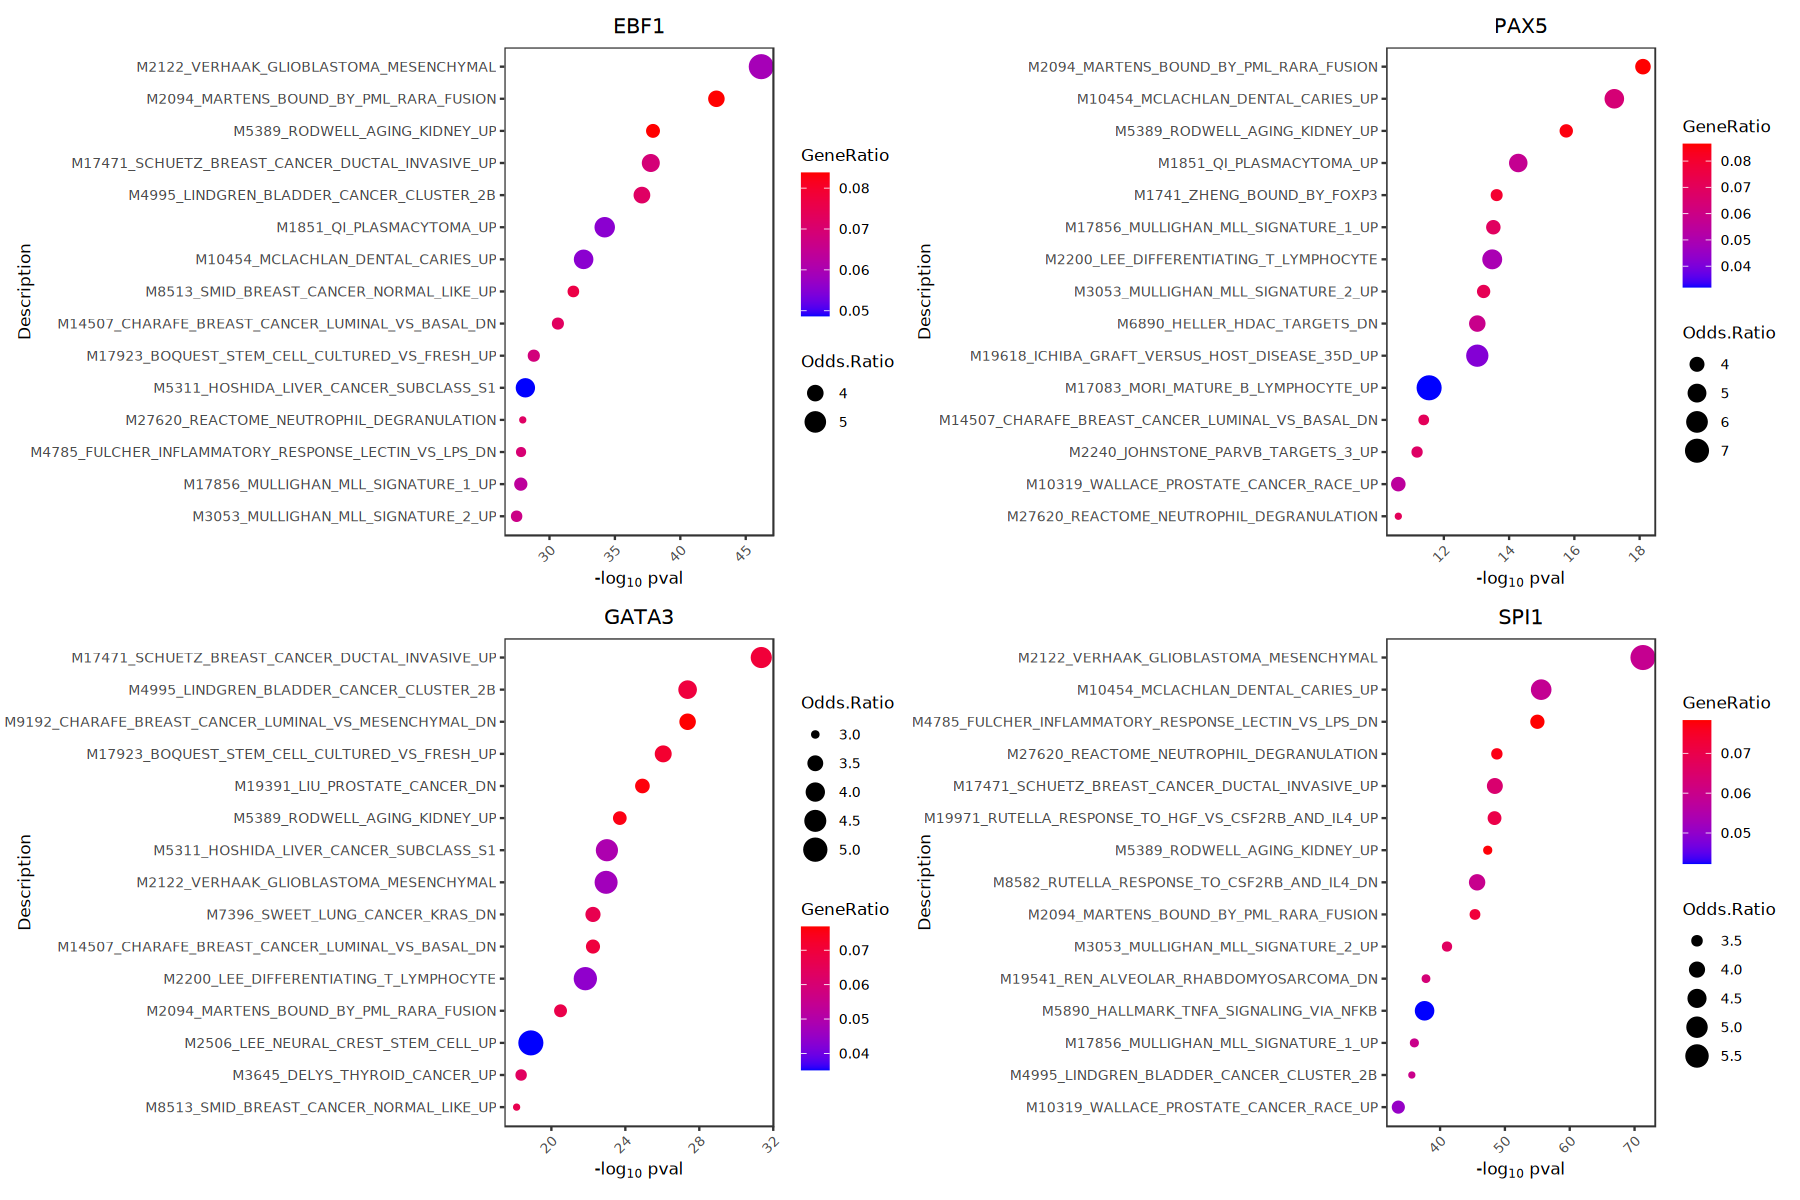

In [138]:
#plot results
enrichPlot(results = enrichresults, ncol=2)

Building graph using weight as edge weights



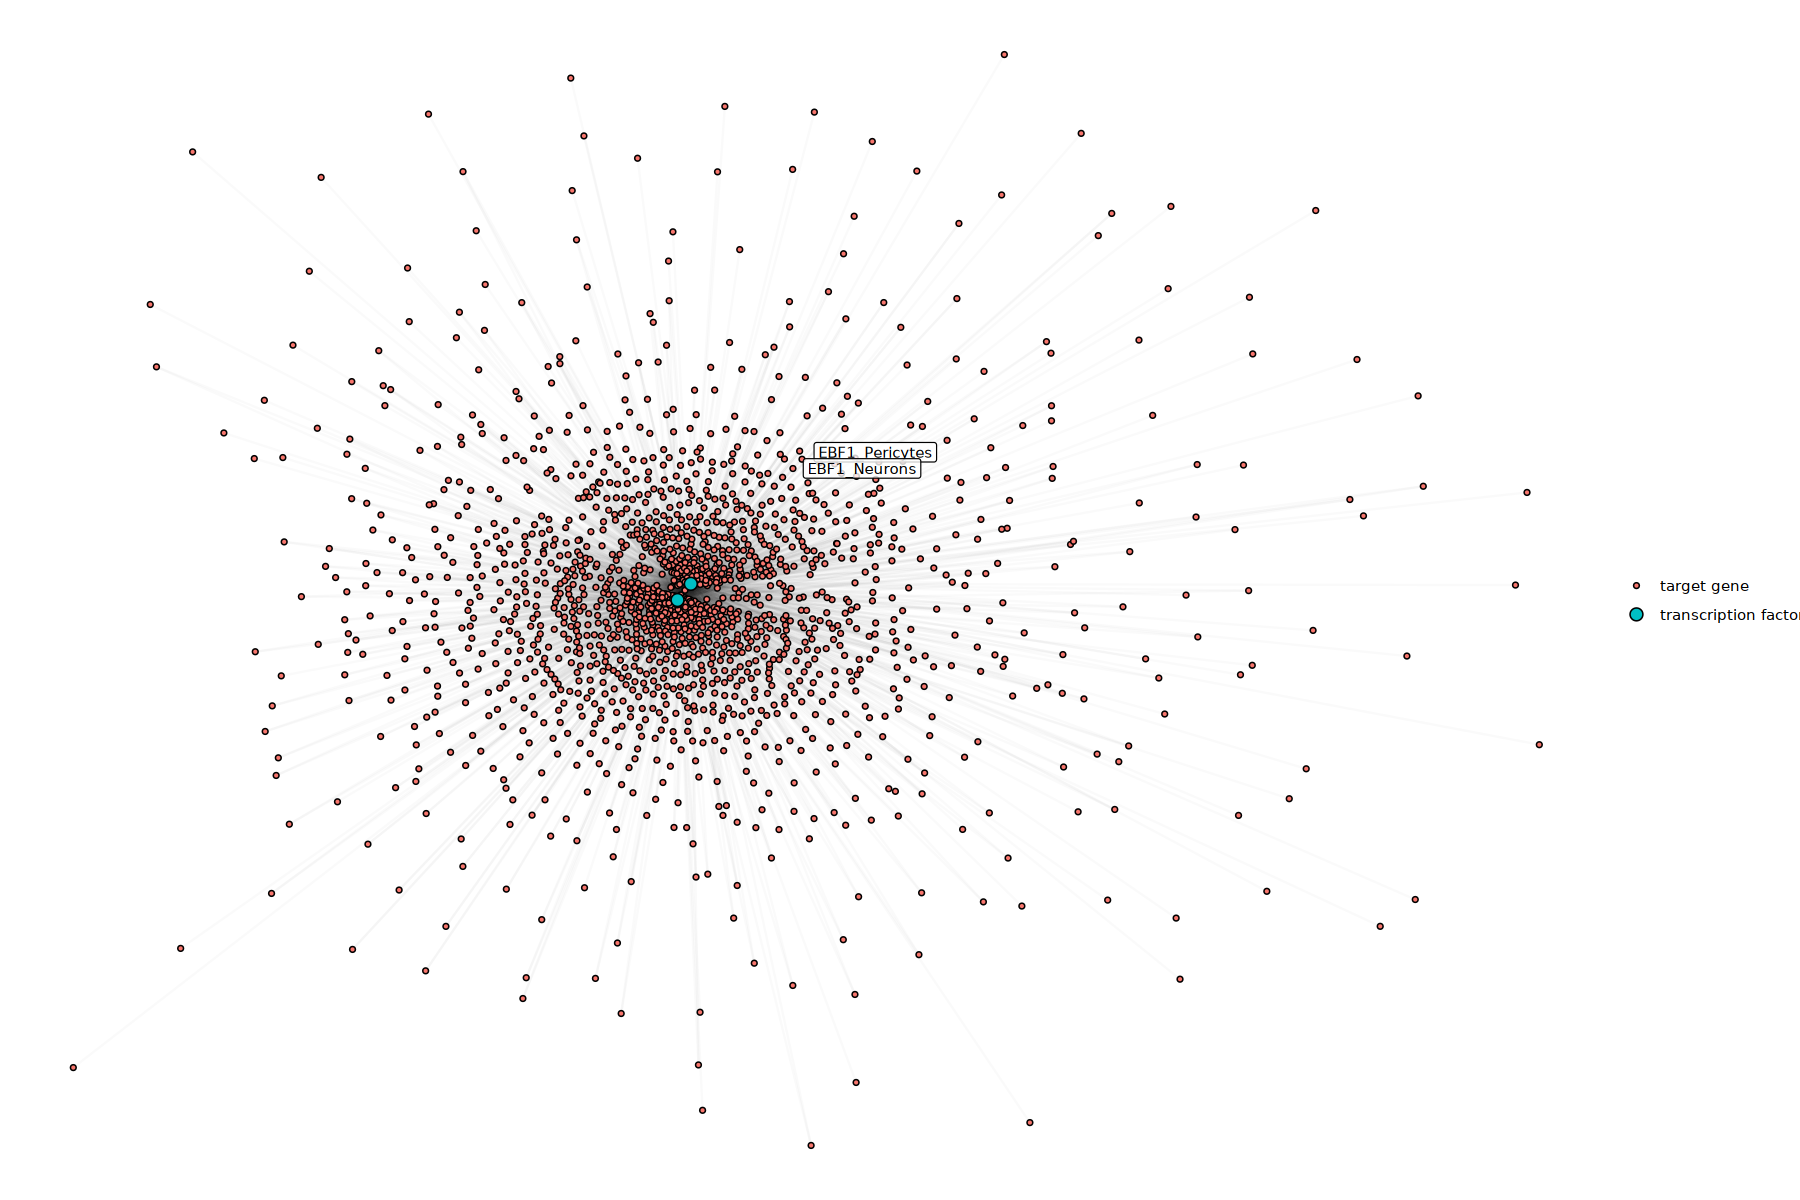

In [139]:
plotDiffNetwork(regulon.w,
                cutoff = 0,
                tf = c("EBF1"),
                weight = "weight",
                clusters = c("Neurons","Pericytes"),
                layout = "stress")

In [140]:
library(ggplot2)
# construct a graph of the preB cells
Neurons_network <- buildGraph(regulon.w, weights = "weight", cluster="Neurons")

Building graph using weight as edge weights



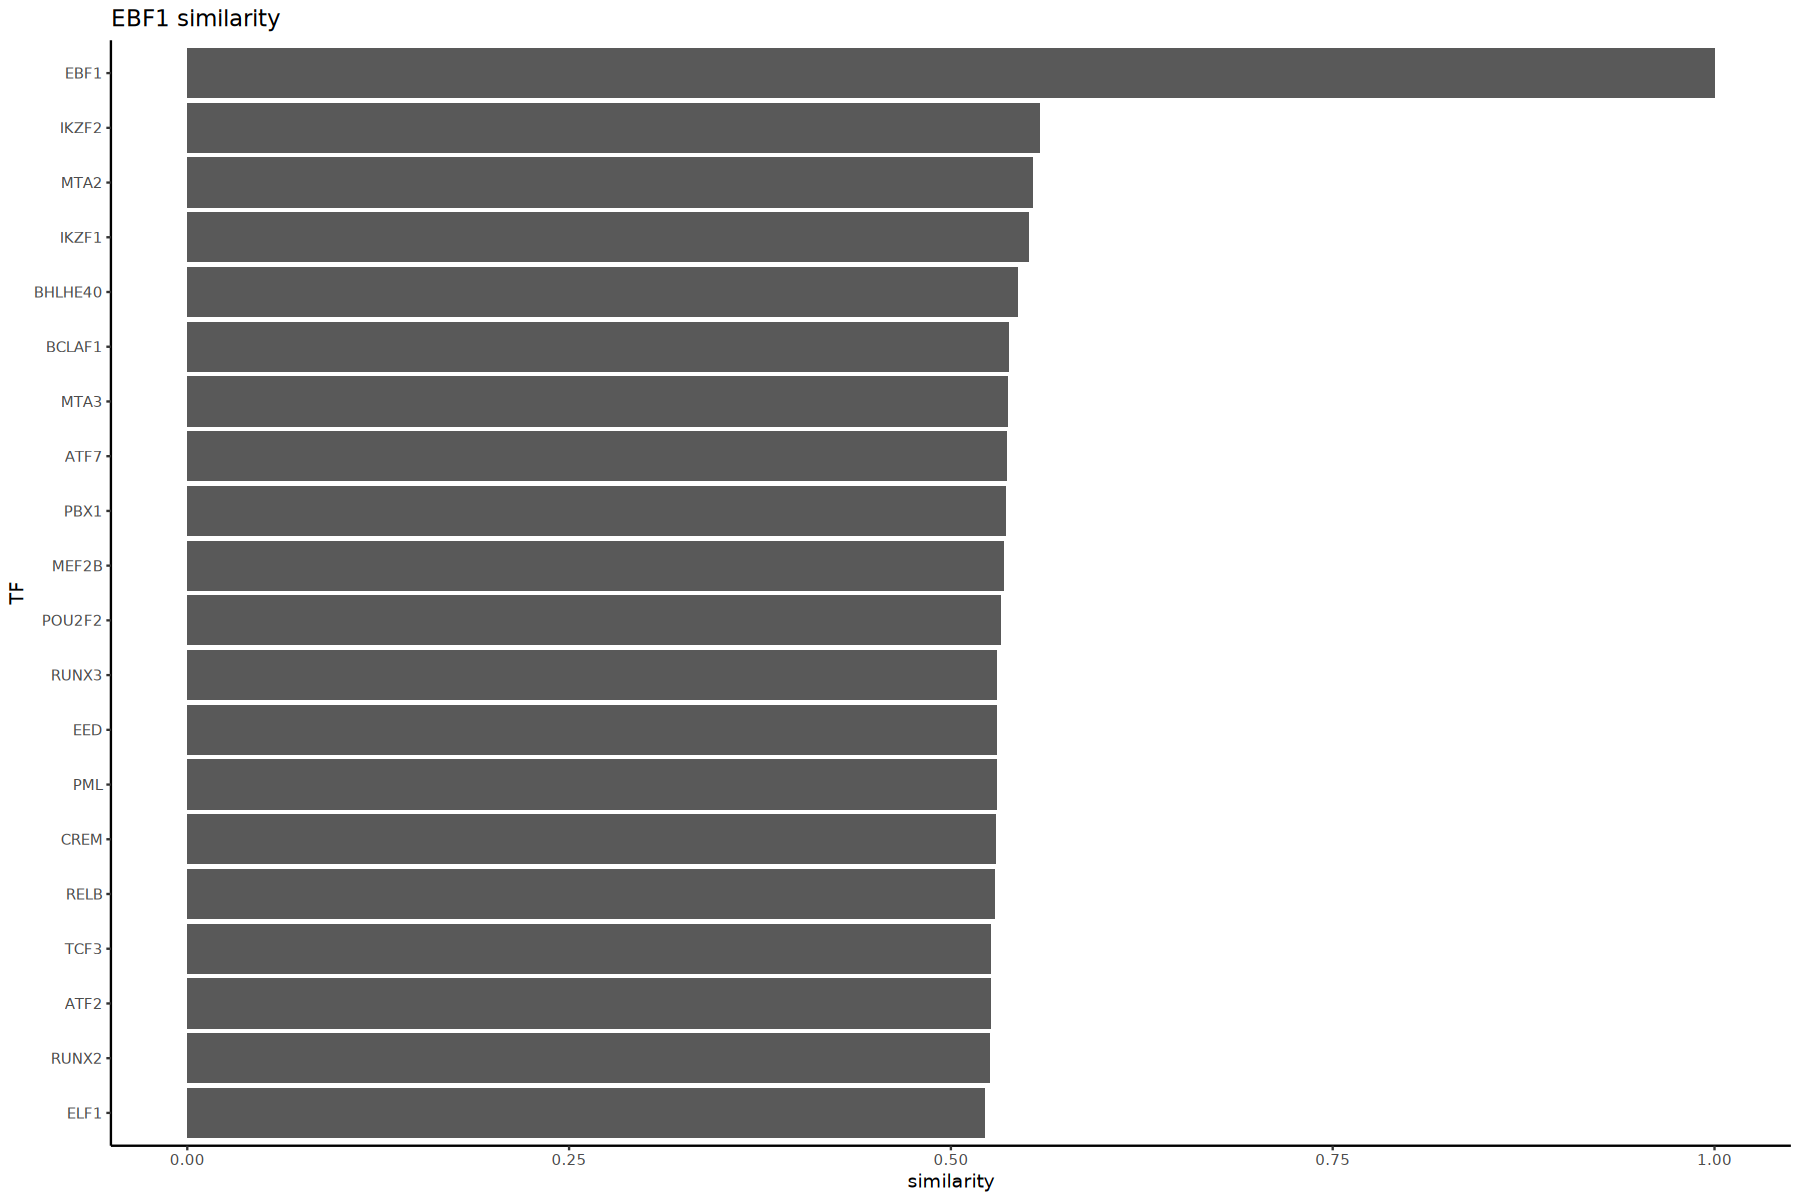

In [141]:
# compute a similarity matrix of all TFs
similarity_score <- calculateJaccardSimilarity(Neurons_network)

# Focus on EBF1
similarity_score_EBF1 <- similarity_score[, "EBF1"]
similarity_df <- data.frame(similarity = head(sort(similarity_score_EBF1, 
                                                   decreasing = TRUE),20),
                            TF = names(head(sort(similarity_score_EBF1,
                                                 decreasing = TRUE),20)))

similarity_df$TF <- factor(similarity_df$TF, levels = rev(unique(similarity_df$TF)))

# plot top TFs most similar to EBF1
topTFplot <- ggplot(similarity_df, aes(x=TF, y=similarity)) +
  geom_bar(stat="identity") +
  coord_flip() +
  ggtitle("EBF1 similarity") +
  theme_classic()

print(topTFplot)

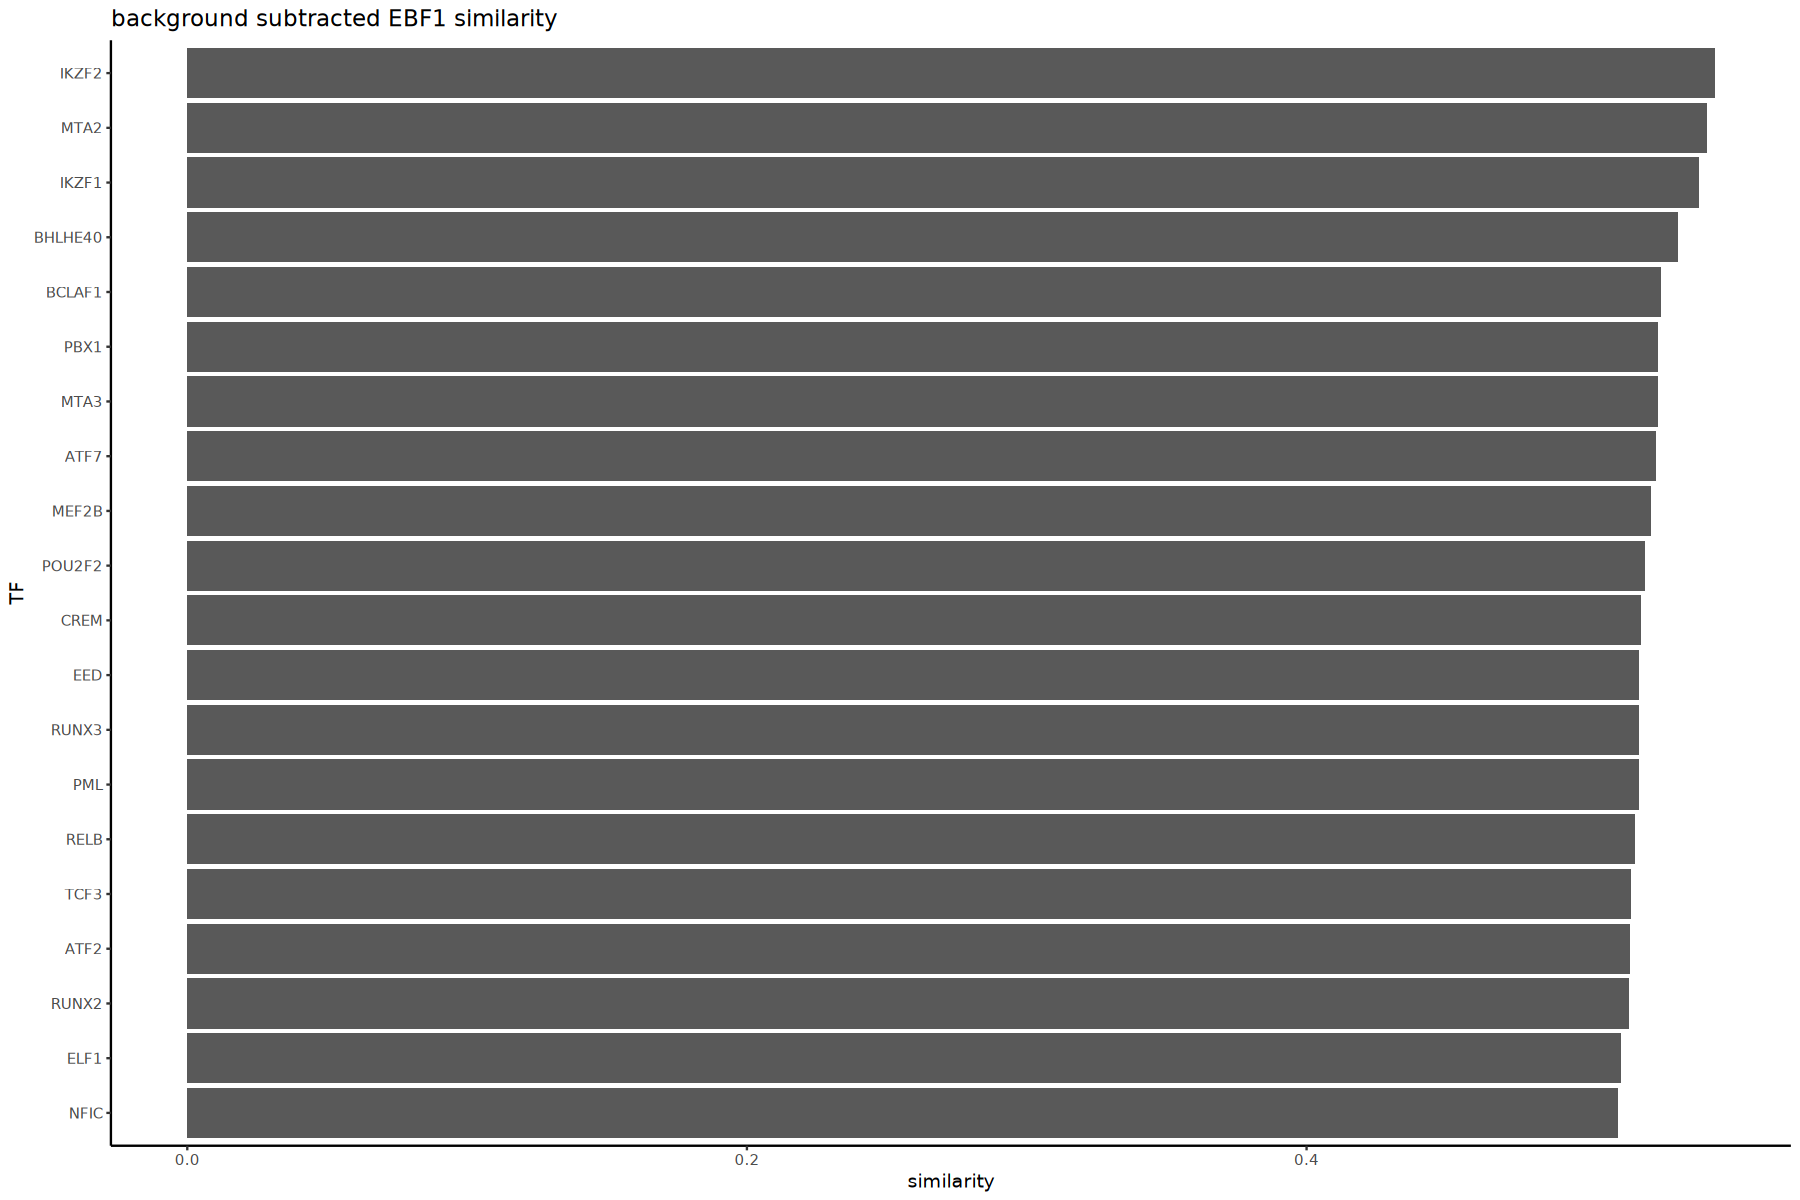

In [143]:
# create a permuted graph by rewiring the edges 100 times
permute_matrix <- permuteGraph(Neurons_network, "EBF1", 100, p=1)
permute_matrix <- permute_matrix[names(similarity_score_EBF1),]
diff_matrix <- similarity_score_EBF1-rowMeans(permute_matrix)

diff_matrix_df <- data.frame(similarity = head(sort(diff_matrix, 
                                                    decreasing = TRUE),20),
                            TF = names(head(sort(diff_matrix,
                                                 decreasing = TRUE),20)))

diff_matrix_df$TF <- factor(diff_matrix_df$TF, levels = rev(unique(diff_matrix_df$TF)))

# plot top TFs most similar to EBF1
topTFplot <- ggplot(diff_matrix_df, aes(x=TF, y=similarity)) +
            geom_bar(stat="identity") +
            coord_flip() +
            ggtitle("background subtracted EBF1 similarity ") +
            theme_classic()
print(topTFplot)

In [144]:
# obtain empirical p-values
p_matrix <- rowMeans(apply(permute_matrix, 2, function(x) {x > similarity_score_EBF1}))
p_matrix[names(head(sort(diff_matrix,decreasing = TRUE),20))]

IKZF2    MTA2   IKZF1 BHLHE40  BCLAF1    PBX1    MTA3    ATF7   MEF2B  POU2F2 
      0       0       0       0       0       0       0       0       0       0 
   CREM     EED   RUNX3     PML    RELB    TCF3    ATF2   RUNX2    ELF1    NFIC 
      0       0       0       0       0       0       0       0       0       0

In [146]:
#regulon.w.2 <- regulon.w
#regulon.w <- readRDS("/gstore/project/lineage/manuscript/epiregulon/OUTPUT/regulon.w.rds")
# construct a graph of the Neurons and Pericytes respectively
Neurons_network <- buildGraph(regulon.w, weights = "weight", cluster="Neurons")

Building graph using weight as edge weights



In [147]:
Pericytes_network <- buildGraph(regulon.w, weights = "weight", cluster="Pericytes")

Building graph using weight as edge weights



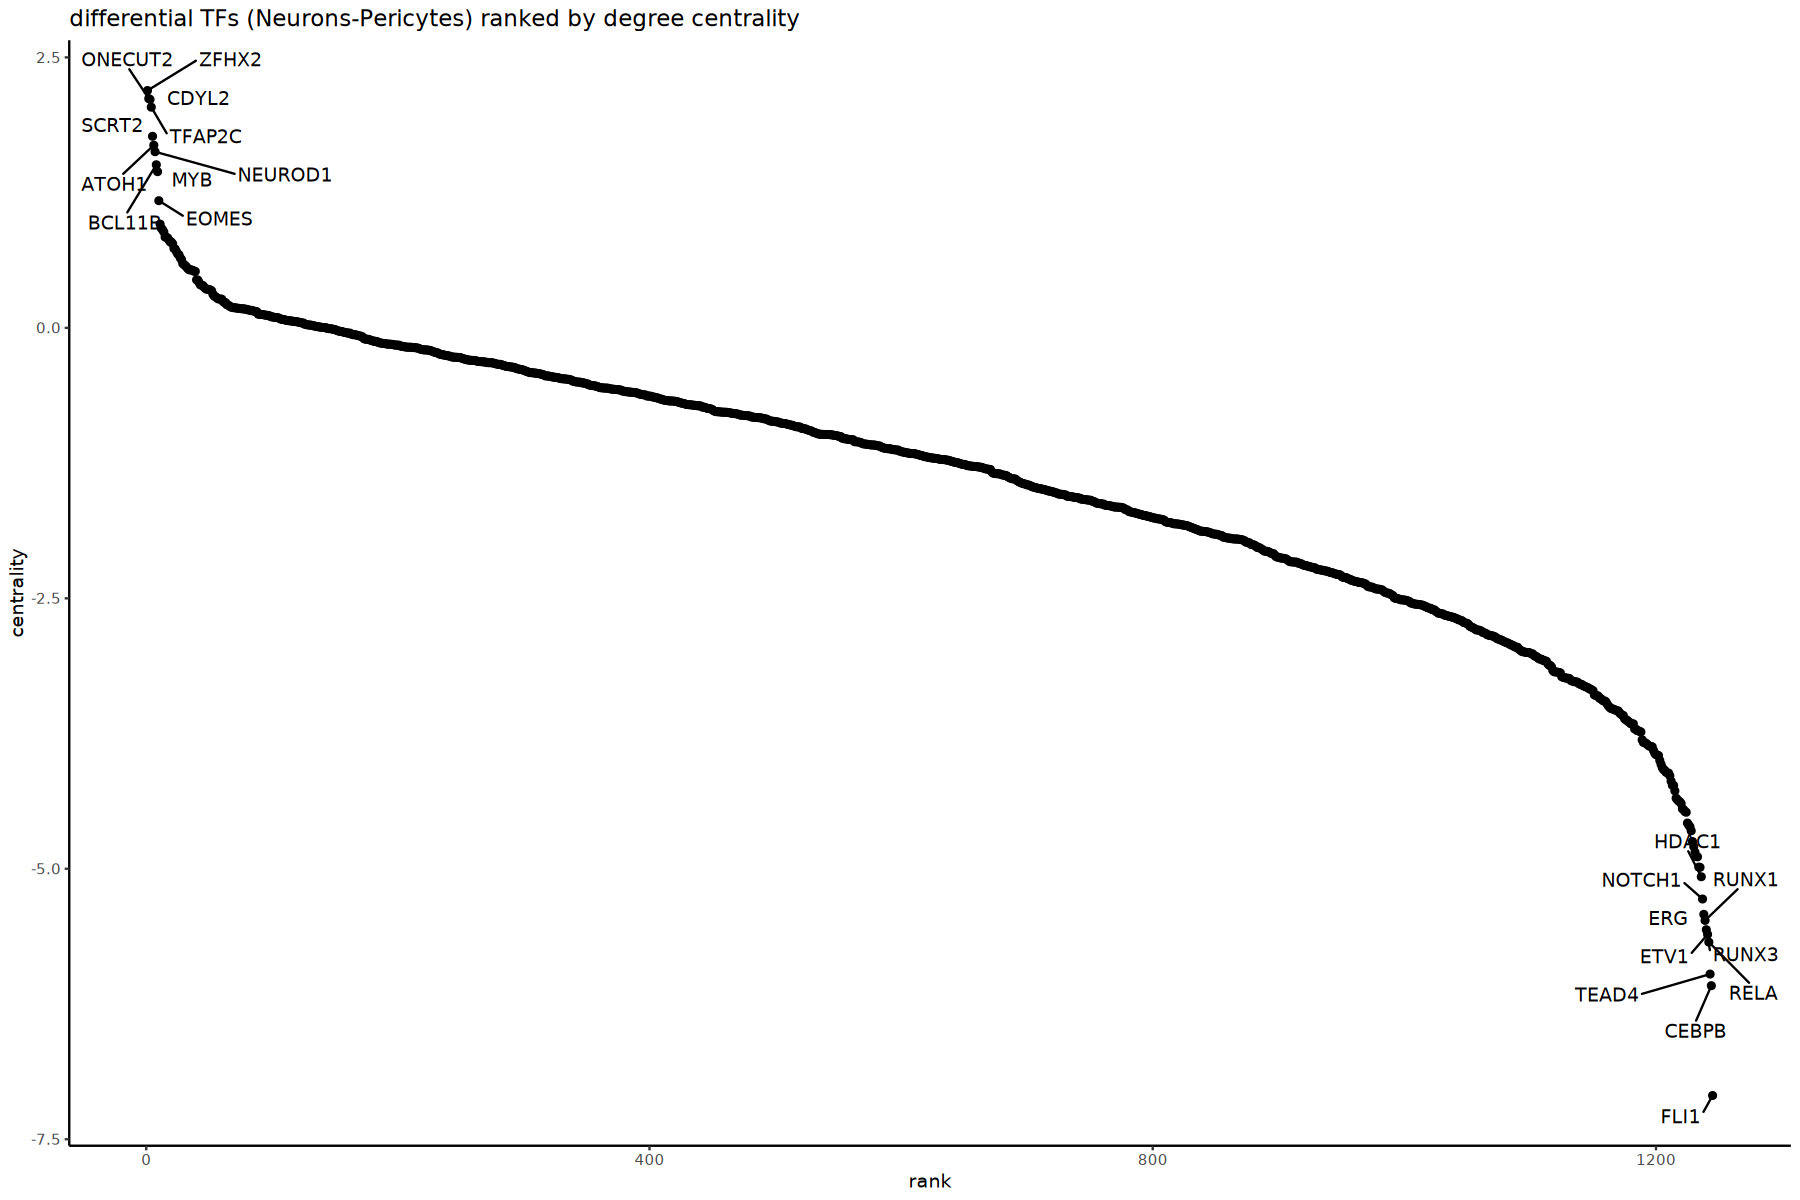

In [149]:
# construct a difference graph
diff_graph <- buildDiffGraph(Neurons_network, Pericytes_network, abs_diff = FALSE)
diff_graph <- addCentrality(diff_graph)
diff_graph <- normalizeCentrality(diff_graph)
rank_table <- rankTfs(diff_graph)

library(ggplot2)
ggplot(rank_table, aes(x = rank, y = centrality)) +
    geom_point() +
    ggrepel::geom_text_repel(data = rbind(head(rank_table, 10), 
                                          tail(rank_table, 10)), 
                             aes(label = tf), 
                             nudge_x = 0, nudge_y = 0, box.padding = 0.5, max.overlaps = Inf) +
    theme_classic() + ggtitle ("differential TFs (Neurons-Pericytes) ranked by degree centrality")

In [150]:
library(igraph)


Attaching package: ‘igraph’


The following object is masked from ‘package:GenomicRanges’:

    union


The following object is masked from ‘package:IRanges’:

    union


The following object is masked from ‘package:S4Vectors’:

    union


The following objects are masked from ‘package:BiocGenerics’:

    normalize, path, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




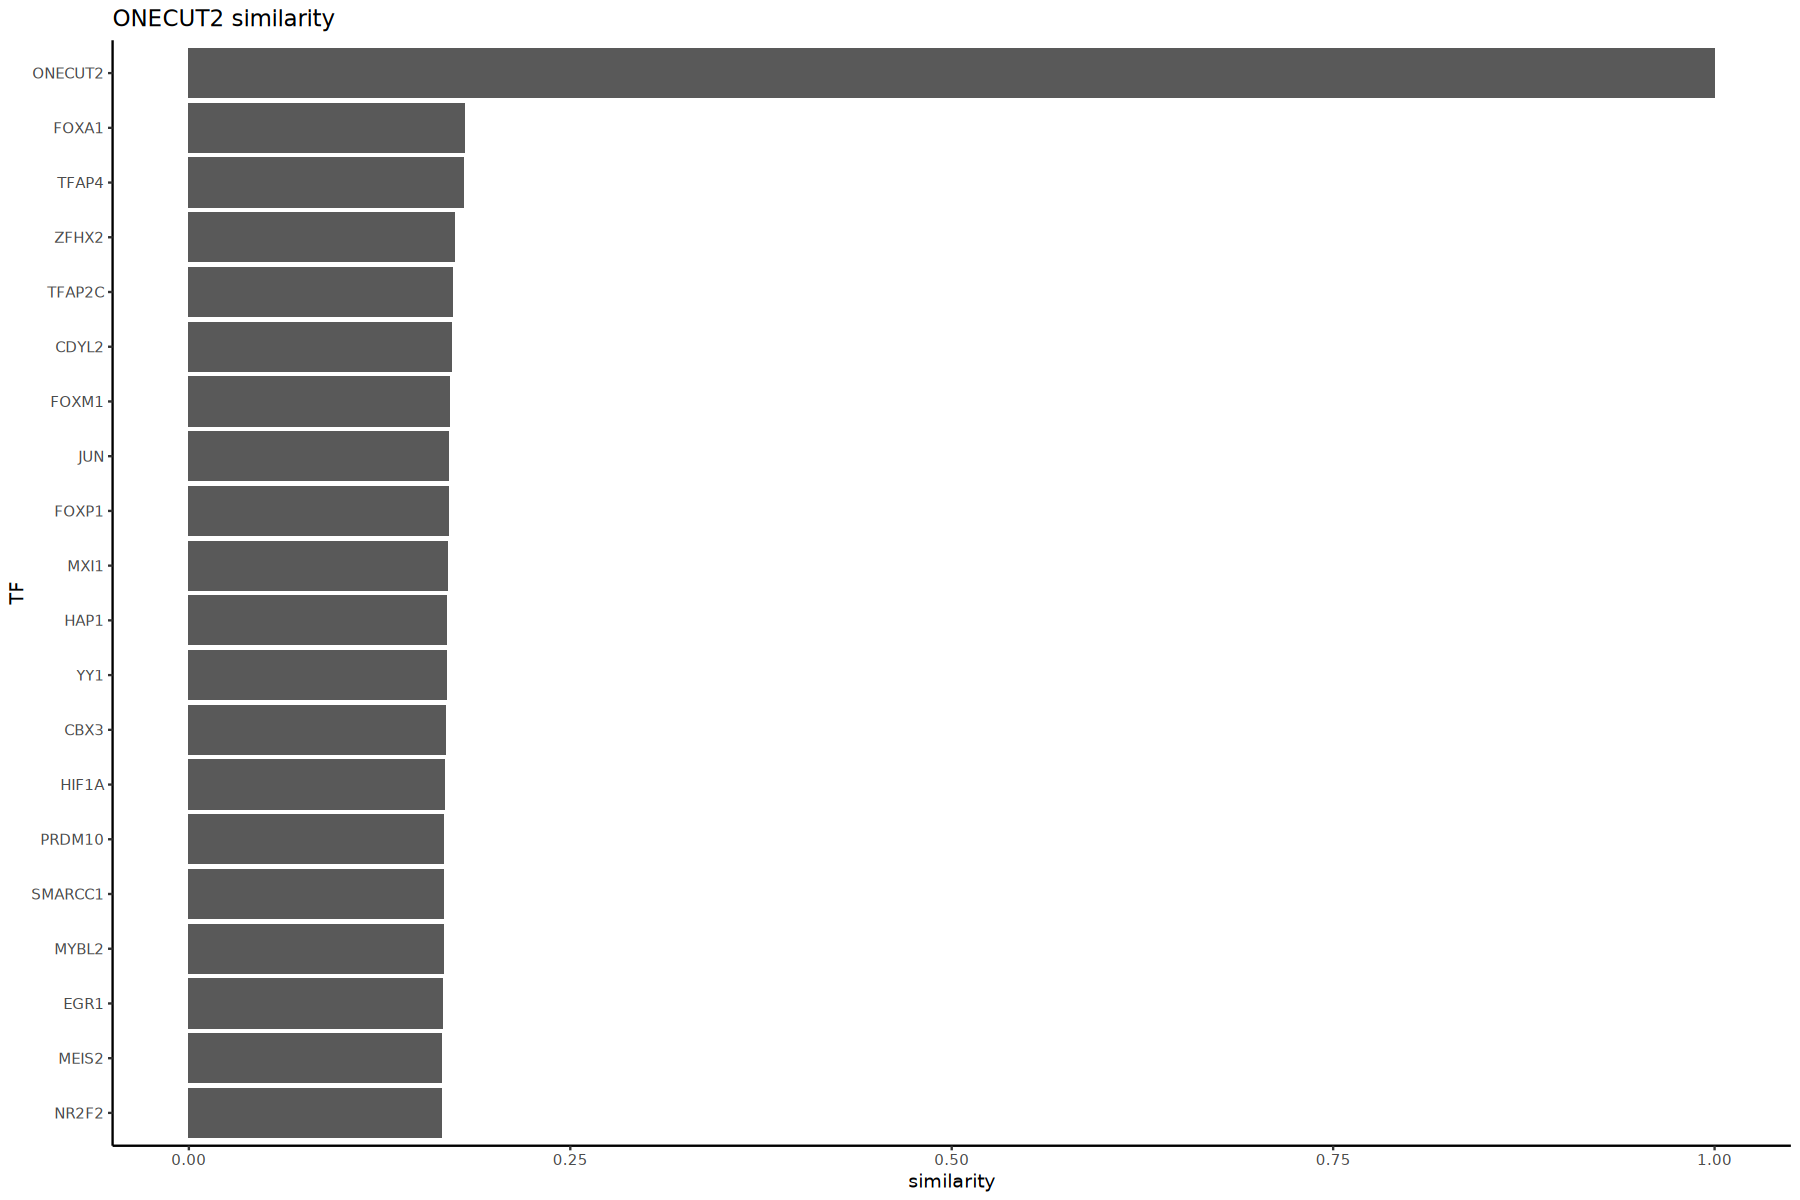

In [152]:
diff_graph_filter <- subgraph.edges(diff_graph, 
                                    E(diff_graph)[E(diff_graph)$weight>0], 
                                    del=TRUE)


# compute a similarity matrix of all TFs
similarity_score <- calculateJaccardSimilarity(diff_graph_filter)

# Focus on SPI1
similarity_score_ONECUT2 <- similarity_score[, "ONECUT2"]
similarity_df <- data.frame(similarity = head(sort(similarity_score_ONECUT2, 
                                                   decreasing = TRUE),20),
                            TF = names(head(sort(similarity_score_ONECUT2,
                                                 decreasing = TRUE),20)))

similarity_df$TF <- factor(similarity_df$TF, 
                           levels = rev(unique(similarity_df$TF)))

# plot top TFs most similar to SPI1
topTFplot <- ggplot(similarity_df, aes(x=TF, y=similarity)) +
  geom_bar(stat="identity") +
  coord_flip() +
  ggtitle("ONECUT2 similarity") +
  theme_classic()

print(topTFplot)

In [153]:
renv::status()


# /fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2024_C_A_Mannens_C_et_al/04_02_25/PART_3B_.ipynb --------
Error: <text>:1:1: unexpected invalid token
1: ‘
    ^

Please see `?renv::dependencies` for more information.

The following package(s) are in an inconsistent state:

 package           installed recorded used
 EnrichmentBrowser y         n        y   
 KEGGgraph         y         n        y   
 Rgraphviz         y         n        y   
 SPIA              y         n        y   
 graphite          y         n        y   
 hwriter           y         n        y   
 org.Hs.eg.db      y         n        y   
 pathview          y         n        y   
 safe              y         n        y   

The following package(s) are out of sync [lockfile != library]:

# Bioconductor 3.19 ----------------------------------------------------------
- GenomicRanges   [1.56.1 != 1.56.2]

# CRAN ------------------------------------------------------------------

In [154]:
renv::snapshot()


# /fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2024_C_A_Mannens_C_et_al/04_02_25/PART_3B_.ipynb --------
Error: <text>:1:1: unexpected invalid token
1: ‘
    ^

Please see `?renv::dependencies` for more information.

The following Bioconductor packages appear to be from a separate Bioconductor release:
- Rgraphviz         [installed 2.50.0 != latest 2.48.0]
- SPIA              [installed 2.58.0 != latest 2.56.0]
- KEGGgraph         [installed 1.66.0 != latest 1.64.0]
- pathview          [installed 1.46.0 != latest 1.44.0]
- EnrichmentBrowser [installed 2.36.0 != latest 2.34.1]
renv may be unable to restore these packages.
Bioconductor version: 3.19



ERROR: Error in renv_snapshot_validate_report(valid, prompt, force): aborting snapshot due to pre-flight validation failure


In [155]:
renv::snapshot()


# /fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2024_C_A_Mannens_C_et_al/04_02_25/PART_3B_.ipynb --------
Error: <text>:1:1: unexpected invalid token
1: ‘
    ^

Please see `?renv::dependencies` for more information.

The following Bioconductor packages appear to be from a separate Bioconductor release:
- Rgraphviz         [installed 2.50.0 != latest 2.48.0]
- SPIA              [installed 2.58.0 != latest 2.56.0]
- KEGGgraph         [installed 1.66.0 != latest 1.64.0]
- pathview          [installed 1.46.0 != latest 1.44.0]
- EnrichmentBrowser [installed 2.36.0 != latest 2.34.1]
renv may be unable to restore these packages.
Bioconductor version: 3.19



ERROR: Error in renv_snapshot_validate_report(valid, prompt, force): aborting snapshot due to pre-flight validation failure


========================================================================================

This error appears because I hydrated enrichr browser package and its dependencies from\
my global R libraries. The reason is that bioconductor packages are generally not possible\
to install without using guix into the cluster environment. Therefore, I needed to use\
this hydration (transfer) as a workaround.

I should note that I could not record my current renv library into the lock file.

Maybe will need to update bioconductor version in this renv.

========================================================================================

I saved a copy of current lock file as "renv_epiregulon.lock".

In [157]:
renv::snapshot(force = TRUE)


# /fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2024_C_A_Mannens_C_et_al/04_02_25/PART_3B_.ipynb --------
Error: <text>:1:1: unexpected invalid token
1: ‘
    ^

Please see `?renv::dependencies` for more information.

The following Bioconductor packages appear to be from a separate Bioconductor release:
- Rgraphviz         [installed 2.50.0 != latest 2.48.0]
- SPIA              [installed 2.58.0 != latest 2.56.0]
- KEGGgraph         [installed 1.66.0 != latest 1.64.0]
- pathview          [installed 1.46.0 != latest 1.44.0]
- EnrichmentBrowser [installed 2.36.0 != latest 2.34.1]
renv may be unable to restore these packages.
Bioconductor version: 3.19

The following package(s) will be updated in the lockfile:

# Bioconductor ---------------------------------------------------------------
- org.Hs.eg.db        [* -> 3.19.1]

# Bioconductor 3.19 ----------------------------------------------------------
- GenomicRanges       [1.56.1 -> 1.56.2]
- grap

In [158]:
sessionInfo()

R version 4.4.2 (2024-10-31)
Platform: x86_64-unknown-linux-gnu
Running under: Red Hat Enterprise Linux 9.4 (Plow)

Matrix products: default
BLAS/LAPACK: /gnu/store/mj1kw87qd3m1q7r4844adkn5hifx8k6a-openblas-0.3.20/lib/libopenblasp-r0.3.20.so;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=C.UTF-8    LC_NUMERIC=C        LC_TIME=C          
 [4] LC_COLLATE=C        LC_MONETARY=C       LC_MESSAGES=C      
 [7] LC_PAPER=C          LC_NAME=C           LC_ADDRESS=C       
[10] LC_TELEPHONE=C      LC_MEASUREMENT=C    LC_IDENTIFICATION=C

time zone: Europe/Berlin
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] igraph_2.1.4                ggplot2_3.5.1              
 [3] org.Hs.eg.db_3.19.1         AnnotationDbi_1.66.0       
 [5] msigdbr_7.5.1               epiregulon.extra_1.0.1     
 [7] scran_1.32.0                scuttle_1.14.0             
 [9] scMultiome_1.4.2      